<a href="https://colab.research.google.com/github/23013093uhi/23013093_DataAnalytics/blob/main/23013093_assignment1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Corinn Sinnott
###23013093
###Assignment1-1

In [1]:
#load packages
#tidyverse contains many useful R packages (Wickham et al., 2019)
library(tidyverse)
#load the broom package to tidy data (Robinson et al., 2024)
library(broom)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Introduction
The New York City Emergency Services Unit has tasked us with investigating the relationship between weather conditions and the number of traffic collisions on a particular day of the week. In order to do this, I will explore publicly available NOAA weather data along with NYPD motor vehicle collision data in order to gain insights into this relationship. This will require collating and analysing the weather and traffic collision data in order to study the relationship between them. I will also examine the traffic collision data in more detail in order to look for trends and identify collision hotspots. The aim of this report is to predict how many collisions are likely to occur on a particular day in order to facilitate planning and optimize staff resources.



# Methodology
##Gather Data
First I gathered the data by querying the publicly available NOAA Global Surface Summary of the Day (noaa_gsod) (NOAA National Centers of Environmental Information, 1999) and NYPD Motor Vehicle Collisions (new_york_mv_collisions) (New York Police Department, 2017) datasets using BigQuery. The queries used are detailed below:

###Weather data from 2012-2024
I selected the following variables from the noaa_gsod data: year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, and fog.
I used the year, month, and day information to create a date variable.
I used Station code 725060 (and wban ID 14756 for 2014) to obtain the results from only the Central Park weather station in New York City (NYC).
The process was repeated for each year from 2012-2024 and the data for all years was combined. This produced 4,633 dates worth of weather data (365 days in 9 years, 366 in 3 years, and 250 days to 6 Sept. 2024).


In [2]:
# -- create a new view of weather data from 2012 to 2024
# CREATE VIEW `uhi-project-434512.assignment.weather_2012_to_2024` AS
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2012; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2012` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2013; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2013` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2014; limit stn to 725060 and wban to 14756 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2014` WHERE stn='725060' AND wban='14756'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2015; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2015` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2016; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2016` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2017; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2017` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2018; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2018` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2019; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2019` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2020; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2020` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2021; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2021` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2022; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2022` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2023; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2023` WHERE stn='725060'
# -- use UNION ALL to join with the next year data
# UNION ALL
# -- take the year, month, and day as integers as use them to create a date variable; select other weather variables for inclusion
# SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
# -- take the data from the NOAA GSOD weather dataset for 2024; limit stn to 725060 to include NYC only
# FROM `bigquery-public-data.noaa_gsod.gsod2024` WHERE stn='725060'
# -- order results by year, then month, then day
# ORDER BY year, mo, da;


##NYC collision data

I used Bigquery to query the nypd_mv_collisions dataset. I counted the number of collisions based on the timestamp to create a dataset containing the collision date and number of collisions on a particular date. I then added a column to reflect day of the week e.g. Monday=1. This produced 4,451 dates worth of collision data (some were missing data).

In [3]:
# -- create a new view of collision data containing the number of collisions on each date
# CREATE VIEW `uhi-project-434512.assignment.collision_data_count`
# -- take the date from the timestamp; use it to create a collsison_date variable; also count the number of times a date appears in the timestamp and use it to create a NUM_COLLISIONS variable for number of collisions on a particular date
# AS SELECT CAST(timestamp as DATE) as collision_date, COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS
# -- take the data from the NYPD Motor Vehicle Collisions dataset
# FROM `bigquery_public_data.new_york_mv_collisions.nypd_mv_collisions`
# -- group the data by the new collision_date variable
# GROUP BY collision_date;



In [4]:
# -- create a new view of collision data containing the number of collisions on each date
# CREATE VIEW `uhi-project-434512.assignment.collision_data_count_final`
# -- create a day variable by formatting collision_date to assign a number representing day of the week where Monday = 1 etc.
# AS SELECT FORMAT_DATE("%u", collision_date) as day, collision_date, NUM_COLLISIONS
# -- take the data from the previously collected collision data
# FROM `uhi-project-434512.assignment.collision_data_count`

###Collate weather and traffic collision data
I gathered the following variables from the previously collected weather and collision data: day, year, mo, da, collision_date, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, NUM_COLLISIONS. I used the date to join the data and created a new table containing 4,451 rows (number of traffic collision results). I exported the .csv data and uploaded it to Github:
https://raw.githubusercontent.com/23013093uhi/23013093_DataAnalytics/main/collated_collision_data.csv

In [5]:
# -- create a new table of collated weather and traffic collision data
# CREATE TABLE `uhi-project-434512.assignment.collated_collision_data`
# -- select the desired variables from collision and weather data
# AS SELECT day, year, mo, da, collision_date, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, NUM_COLLISIONS
# -- take the data from both previously collected weather and collision data; join them on date
# FROM `uhi-project-434512.assignment.weather_2012_to_2024` as weather, `uhi-project-434512.assignment.collision_data_count_final` as complaints WHERE complaints.collision_date = weather.date;


###Gather collision location data
I used BigQuery to select the latitude and longitude variables from the nypd_mv_collisions dataset. I also counted the number of collisions at those coordinates. I excluded data where latitude and longitude were missing or zero. This resulted in 287,956 rows of data. I exported the .csv data and uploaded it to Github: https://raw.githubusercontent.com/23013093uhi/23013093_DataAnalytics/main/collision_data_loc1.csv

In [6]:
# -- create a new view of collision data location information
# CREATE VIEW `uhi-project-434512.assignment.collision_data_loc1`
# -- take the latitude and longitude variables along with a count representing number of collisions at those coordinates
# AS SELECT latitude, longitude, COUNT(*) AS count
# --take data from the NYPD Motor Vehicle Collisions dataset
# FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`
# -- exclude data that is null or zero for latitude or longitude
# WHERE (latitude IS NOT NULL AND longitude IS NOT NULL)
# AND (latitude !=0.0 AND longitude !=0.0)
# -- group the data by latitude then longitude
# GROUP BY latitude, longitude

###Gather collision location data for day of the week
I used BigQuery to collect the coordinates of collisions (latitude and longitude variables) from the nypd_mv_collisions dataset. I used the timestamp to determine the collision date. I excluded data where latitude and longitude were missing or zero. I then added a column to reflect day of the week. e.g. Monday=1. I excluded 2020 data since prior analysis showed it did not fit the usual pattern. I calculated the number of collisions at each set of coordinates per day of the week. This produced 652,578 results. I exported the .csv data and uploaded it to Github: https://raw.githubusercontent.com/23013093uhi/23013093_DataAnalytics/main/collision_data_loc_ex2020_count.csv

In [7]:
# -- create a new view of collision data location information
# CREATE VIEW `uhi-project-434512.assignment.collision_data_loc`
# -- take the date from the timestamp to create a collision_date variable; select latitude and longitude variables
# AS SELECT CAST(timestamp as DATE) as collision_date, latitude, longitude
# --take data from the NYPD Motor Vehicle Collisions dataset
# FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`
# -- exclude data that is null or zero for latitude or longitude
# WHERE (latitude IS NOT NULL AND longitude IS NOT NULL)
# AND (latitude !=0.0 AND longitude !=0.0)


In [8]:
# -- create a new view of collision data location information by day of the week
# CREATE VIEW `uhi-project-434512.assignment.collision_data_loc_day`
# -- create a day variable by formatting collision_date to assign a number representing day of the week where Monday = 1 etc.
# AS SELECT FORMAT_DATE("%u", collision_date) as day, collision_date, latitude, longitude
# --take data from the previously collected collision location data
# FROM `uhi-project-434512.assignment.collision_data_loc`


In [9]:
# -- create a new view of collision data location information by day of the week that excludes 2020
# CREATE VIEW `uhi-project-434512.assignment.collision_data_loc_ex2020`
# -- take the day fo the week, latitude, and longitude information
# AS SELECT day, latitude, longitude,
# --take data from the previously collected collision location data with day of the week
# FROM `uhi-project-434512.assignment.collision_data_loc_day`
# -- exclude data from 2020
# WHERE collision_date NOT BETWEEN '2020-01-01' AND '2020-12-31'


In [10]:
# -- create a new view of collision data location information by day of the week that excludes 2020 and add a count
# CREATE VIEW `uhi-project-434512.assignment.collision_data_loc_ex2020_count`
# -- take the day fo the week, latitude, and longitude information, add a count representing the number of collisions at the coordinates on a particular day of the week
# AS SELECT day, latitude, longitude, COUNT(*) as count
# --take data from the previously collected collision location data with day of the week excluding 2020
# FROM `uhi-project-434512.assignment.collision_data_loc_ex2020`
# -- group data by day of the week, then latitude, then longitude
# GROUP BY day, latitude, longitude

# Results


###Weather and Collision Data
#### Examine Data
I imported the collated weather and collision data and examined the first few lines along with the structure and basic statistics. There are 4,451 rows in the dataset and 18 columns (variables).


In [11]:
# import CSV file of collated weather and collision data into a dataframe using read.csv function
ls <- read.csv("https://raw.githubusercontent.com/23013093uhi/23013093_DataAnalytics/main/collated_collision_data.csv", stringsAsFactors = TRUE )

In [12]:
# use str() to examine the structure
str(ls)

'data.frame':	4451 obs. of  18 variables:
 $ day           : int  7 6 5 4 1 1 3 1 3 1 ...
 $ year          : int  2018 2021 2019 2018 2019 2024 2023 2014 2023 2016 ...
 $ mo            : int  9 11 3 12 7 7 12 11 10 7 ...
 $ da            : int  23 6 1 20 8 8 27 10 18 11 ...
 $ collision_date: Factor w/ 4451 levels "2012-07-01","2012-07-02",..: 2276 3416 2435 2364 2564 4391 4197 863 4127 1472 ...
 $ temp          : num  59.8 43.1 26.7 38.6 64.9 72 45.9 48.2 53.4 63.1 ...
 $ dewp          : num  50.2 29.7 18.2 34.4 56.7 71.5 45.2 42.2 49.6 58.4 ...
 $ slp           : num  1023 1029 1027 1020 1015 ...
 $ visib         : num  10 10 10 9.6 10 4 5.7 9.6 10 9.9 ...
 $ wdsp          : num  3 3.1 4 5 4.2 4.2 4 4 3.3 4.9 ...
 $ mxpsd         : num  5.1 6 7 7 7 7 7 7 7 7 ...
 $ gust          : num  1000 1000 1000 1000 1000 ...
 $ max           : num  78.1 55 35.1 48 75 78.1 55.9 59 62.1 70 ...
 $ min           : num  53.1 32 16 21 54 68 37 39 45 55 ...
 $ prcp          : num  0 0 0 0 0 0 0 0 0.02

In [13]:
# use head() to examine the first few lines of the dataset
head(ls)

day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust  max 
1 7   2018  9 23 2018-09-23     59.8 50.2 1023.4 10.0  3.0  5.1   999.9 78.1
2 6   2021 11  6 2021-11-06     43.1 29.7 1028.9 10.0  3.1  6.0   999.9 55.0
3 5   2019  3  1 2019-03-01     26.7 18.2 1026.9 10.0  4.0  7.0   999.9 35.1
4 4   2018 12 20 2018-12-20     38.6 34.4 1020.2  9.6  5.0  7.0   999.9 48.0
5 1   2019  7  8 2019-07-08     64.9 56.7 1014.7 10.0  4.2  7.0   999.9 75.0
6 1   2024  7  8 2024-07-08     72.0 71.5 1016.6  4.0  4.2  7.0   999.9 78.1
  min  prcp sndp  fog NUM_COLLISIONS
1 53.1 0    999.9 0   475           
2 32.0 0    999.9 0   335           
3 16.0 0    999.9 0   711           
4 21.0 0    999.9 0   806           
5 54.0 0    999.9 0   592           
6 68.0 0    999.9 1   238

In [14]:
#use summary() to obtain basic statistical information about each variable
summary(ls)

      day         year            mo              da           collision_date
 Min.   :1   Min.   :2012   Min.   : 1.00   Min.   : 1.00   2012-07-01:   1  
 1st Qu.:2   1st Qu.:2015   1st Qu.: 4.00   1st Qu.: 8.00   2012-07-02:   1  
 Median :4   Median :2018   Median : 7.00   Median :16.00   2012-07-03:   1  
 Mean   :4   Mean   :2018   Mean   : 6.54   Mean   :15.72   2012-07-04:   1  
 3rd Qu.:6   3rd Qu.:2021   3rd Qu.: 9.00   3rd Qu.:23.00   2012-07-05:   1  
 Max.   :7   Max.   :2024   Max.   :12.00   Max.   :31.00   2012-07-06:   1  
                                                            (Other)   :4445  
      temp            dewp               slp            visib       
 Min.   : 5.80   Min.   :  -10.40   Min.   :  989   Min.   : 0.200  
 1st Qu.:41.70   1st Qu.:   33.15   1st Qu.: 1012   1st Qu.: 7.200  
 Median :52.70   Median :   46.00   Median : 1016   Median : 9.400  
 Mean   :52.72   Mean   :   47.58   Mean   : 1023   Mean   : 8.345  
 3rd Qu.:65.10   3rd Qu.:   59.

####Clean Data
The weather dataset contains various values to represent missing data. They are listed below for each column. These were replaced with NAs so they can be excluded from analysis.

* temp, dewp, slp, max, min: Missing = 9999.9
* visib, wdsp, mxpsd, gust, sndp: Missing = 999.9
* prcp: Missing = 99.99

The resulting clean dataset .csv was downloaded and added to Github: https://raw.githubusercontent.com/23013093uhi/23013093_DataAnalytics/main/collated_collision_data_clean.csv


In [15]:
#create a new dataframe that replaces the missing values with NAs in each column
ls1 <- ls %>%
  #use mutate function to replace the 9999.9s in the temp column with NAs
  mutate(temp = na_if(temp, 9999.9)) %>%
    #similar for the rest of the columns
  mutate(dewp = na_if(dewp, 9999.9)) %>%
  mutate(slp = na_if(slp, 9999.9)) %>%
  mutate(visib = na_if(visib, 999.9)) %>%
  mutate(wdsp = na_if(wdsp, 999.9)) %>%
  mutate(mxpsd = na_if(mxpsd, 999.9)) %>%
  mutate(gust = na_if(gust, 999.9)) %>%
  mutate(max = na_if(max, 9999.9)) %>%
  mutate(min = na_if(min, 9999.9)) %>%
  mutate(prcp = na_if(prcp, 99.99)) %>%
  mutate(sndp = na_if(sndp, 999.9))

#write the dataframe to a new .csv file
write.csv(ls1, file = "collated_collision_data_clean.csv")


The clean dataset was imported and the first few lines were examined along with the structure and basic statistical information. The missing values have been removed. There is only 1 non-NA value for sndp so it is excluded from further analysis.

In [16]:
# import CSV file of clean collated data into a dataframe using read.csv function
ls1 <- read.csv("https://raw.githubusercontent.com/23013093uhi/23013093_DataAnalytics/main/collated_collision_data_clean.csv", stringsAsFactors = TRUE )

# use head() to examine the first few lines
head(ls1)

X day year mo da collision_date temp dewp slp    visib wdsp mxpsd gust max 
1 1 7   2018  9 23 2018-09-23     59.8 50.2 1023.4 10.0  3.0  5.1   NA   78.1
2 2 6   2021 11  6 2021-11-06     43.1 29.7 1028.9 10.0  3.1  6.0   NA   55.0
3 3 5   2019  3  1 2019-03-01     26.7 18.2 1026.9 10.0  4.0  7.0   NA   35.1
4 4 4   2018 12 20 2018-12-20     38.6 34.4 1020.2  9.6  5.0  7.0   NA   48.0
5 5 1   2019  7  8 2019-07-08     64.9 56.7 1014.7 10.0  4.2  7.0   NA   75.0
6 6 1   2024  7  8 2024-07-08     72.0 71.5 1016.6  4.0  4.2  7.0   NA   78.1
  min  prcp sndp fog NUM_COLLISIONS
1 53.1 0    NA   0   475           
2 32.0 0    NA   0   335           
3 16.0 0    NA   0   711           
4 21.0 0    NA   0   806           
5 54.0 0    NA   0   592           
6 68.0 0    NA   1   238

In [17]:
#use str() to view the structure of the dataset
str(ls1)

'data.frame':	4451 obs. of  19 variables:
 $ X             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ day           : int  7 6 5 4 1 1 3 1 3 1 ...
 $ year          : int  2018 2021 2019 2018 2019 2024 2023 2014 2023 2016 ...
 $ mo            : int  9 11 3 12 7 7 12 11 10 7 ...
 $ da            : int  23 6 1 20 8 8 27 10 18 11 ...
 $ collision_date: Factor w/ 4451 levels "2012-07-01","2012-07-02",..: 2276 3416 2435 2364 2564 4391 4197 863 4127 1472 ...
 $ temp          : num  59.8 43.1 26.7 38.6 64.9 72 45.9 48.2 53.4 63.1 ...
 $ dewp          : num  50.2 29.7 18.2 34.4 56.7 71.5 45.2 42.2 49.6 58.4 ...
 $ slp           : num  1023 1029 1027 1020 1015 ...
 $ visib         : num  10 10 10 9.6 10 4 5.7 9.6 10 9.9 ...
 $ wdsp          : num  3 3.1 4 5 4.2 4.2 4 4 3.3 4.9 ...
 $ mxpsd         : num  5.1 6 7 7 7 7 7 7 7 7 ...
 $ gust          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ max           : num  78.1 55 35.1 48 75 78.1 55.9 59 62.1 70 ...
 $ min           : num  53.1 32 16 21 54 68 37 39 

In [18]:
#use summary to get basic statistics
summary(ls1)

       X             day         year            mo              da       
 Min.   :   1   Min.   :1   Min.   :2012   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:1114   1st Qu.:2   1st Qu.:2015   1st Qu.: 4.00   1st Qu.: 8.00  
 Median :2226   Median :4   Median :2018   Median : 7.00   Median :16.00  
 Mean   :2226   Mean   :4   Mean   :2018   Mean   : 6.54   Mean   :15.72  
 3rd Qu.:3338   3rd Qu.:6   3rd Qu.:2021   3rd Qu.: 9.00   3rd Qu.:23.00  
 Max.   :4451   Max.   :7   Max.   :2024   Max.   :12.00   Max.   :31.00  
                                                                          
    collision_date      temp            dewp             slp      
 2012-07-01:   1   Min.   : 5.80   Min.   :-10.40   Min.   : 989  
 2012-07-02:   1   1st Qu.:41.70   1st Qu.: 33.12   1st Qu.:1012  
 2012-07-03:   1   Median :52.70   Median : 46.00   Median :1016  
 2012-07-04:   1   Mean   :52.72   Mean   : 45.35   Mean   :1017  
 2012-07-05:   1   3rd Qu.:65.10   3rd Qu.: 59.60   3rd Qu.:1022 

In [19]:
# use colSums to count the number of Non-NA observations for each variable in the dataframe
colSums(!is.na(ls1))

X            day           year             mo             da 
          4451           4451           4451           4451           4451 
collision_date           temp           dewp            slp          visib 
          4451           4451           4450           4448           4451 
          wdsp          mxpsd           gust            max            min 
          4451           4419           2742           4451           4451 
          prcp           sndp            fog NUM_COLLISIONS 
          4412              1           4451           4451

####Visualise Data
**Histograms**

Histograms were created to visualise the distributions of the non-categorical variables. The distributions are highly skewed for mean visibility, mean wind speed, maximum sustained wind speed, maximum wind gust, and total precipitation. The distributions for the other weather variables are closer to normal.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”


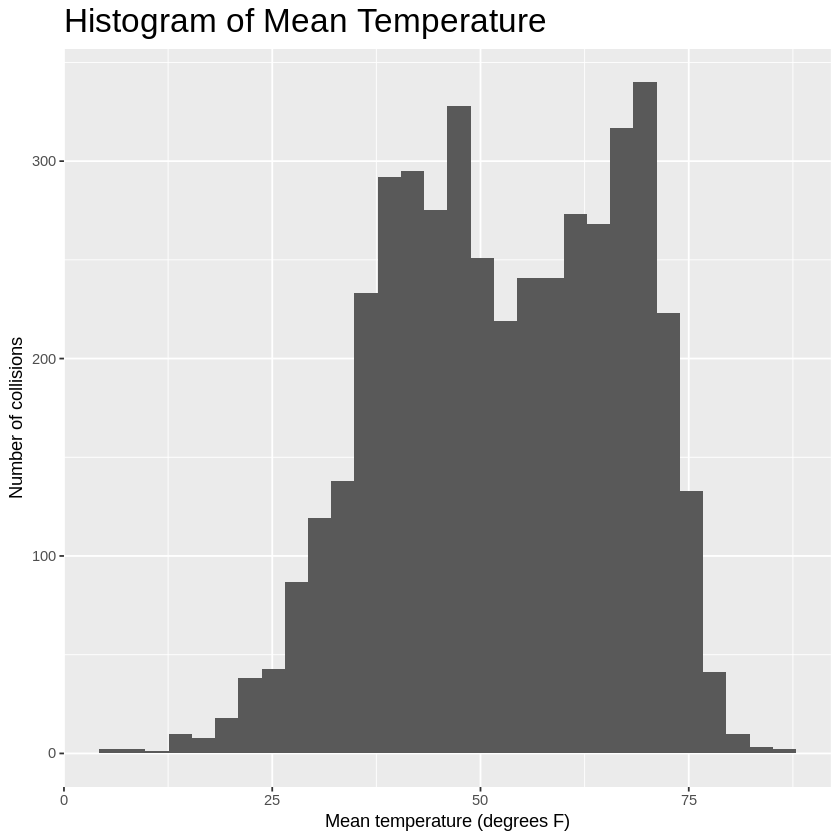

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


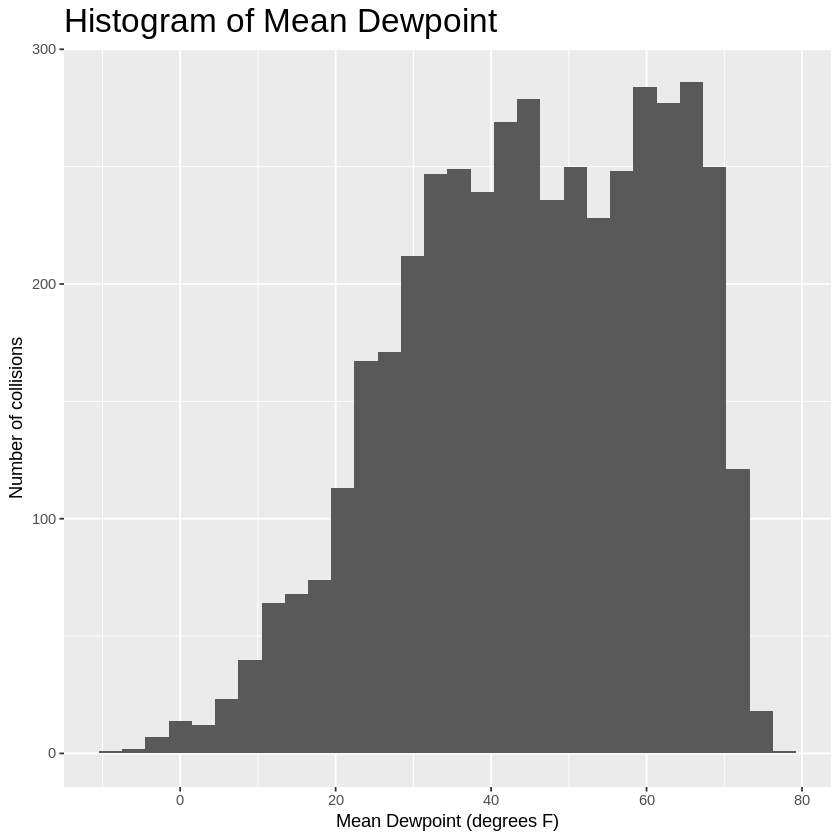

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


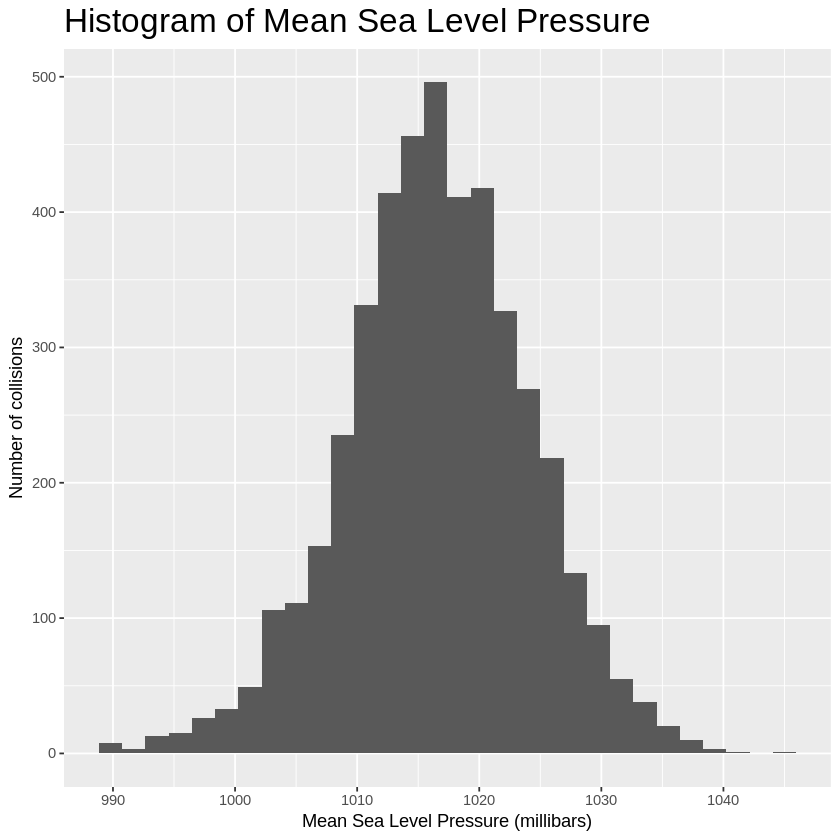

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


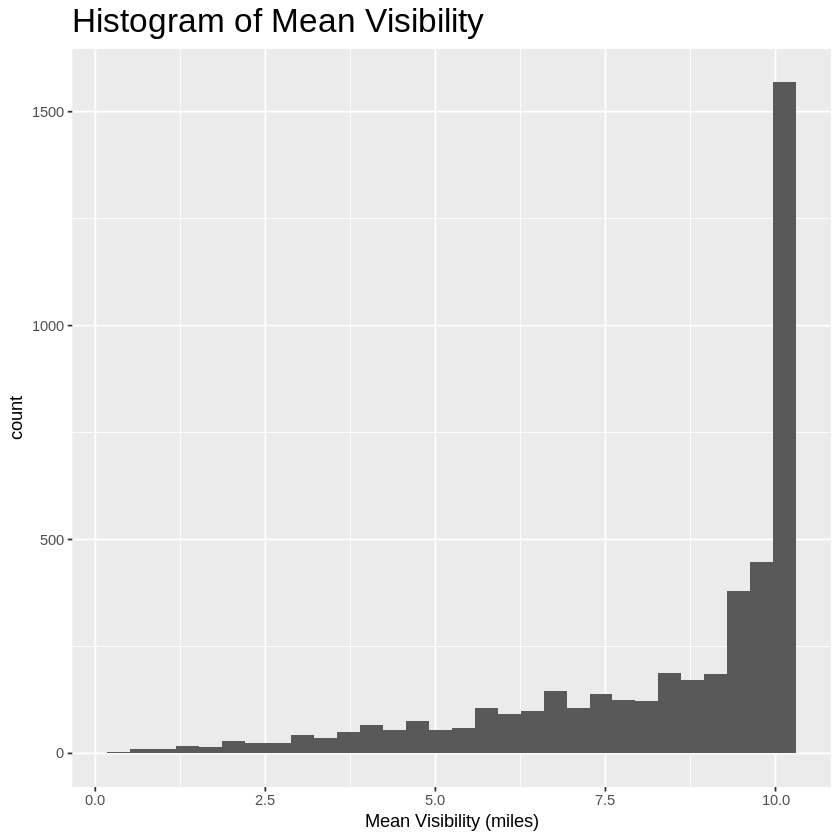

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 32 rows containing non-finite outside the scale range (`stat_bin()`).”


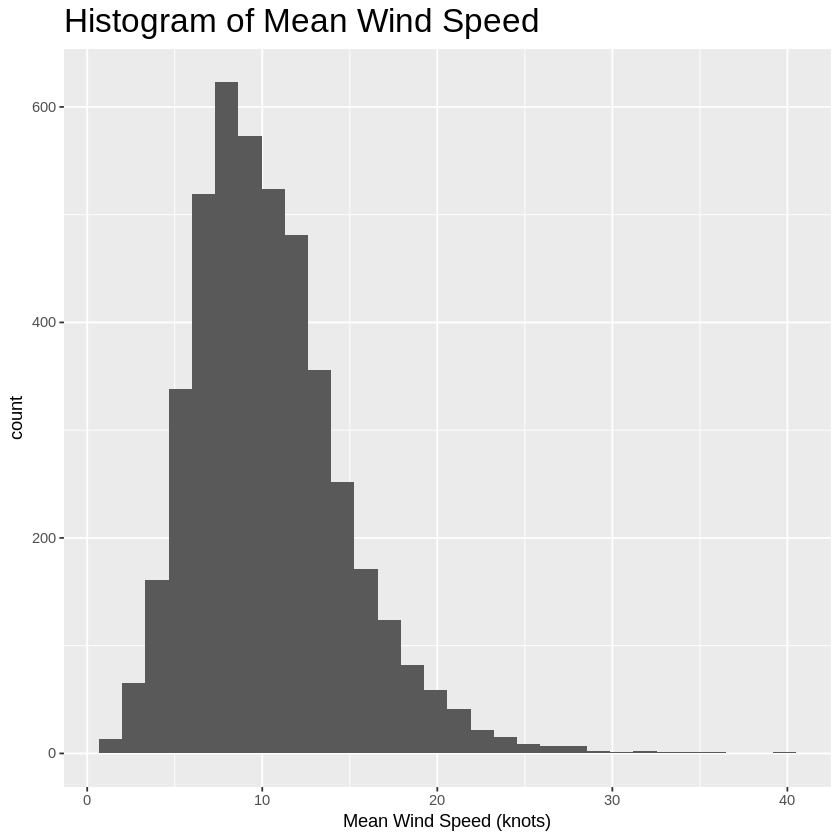

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1709 rows containing non-finite outside the scale range (`stat_bin()`).”


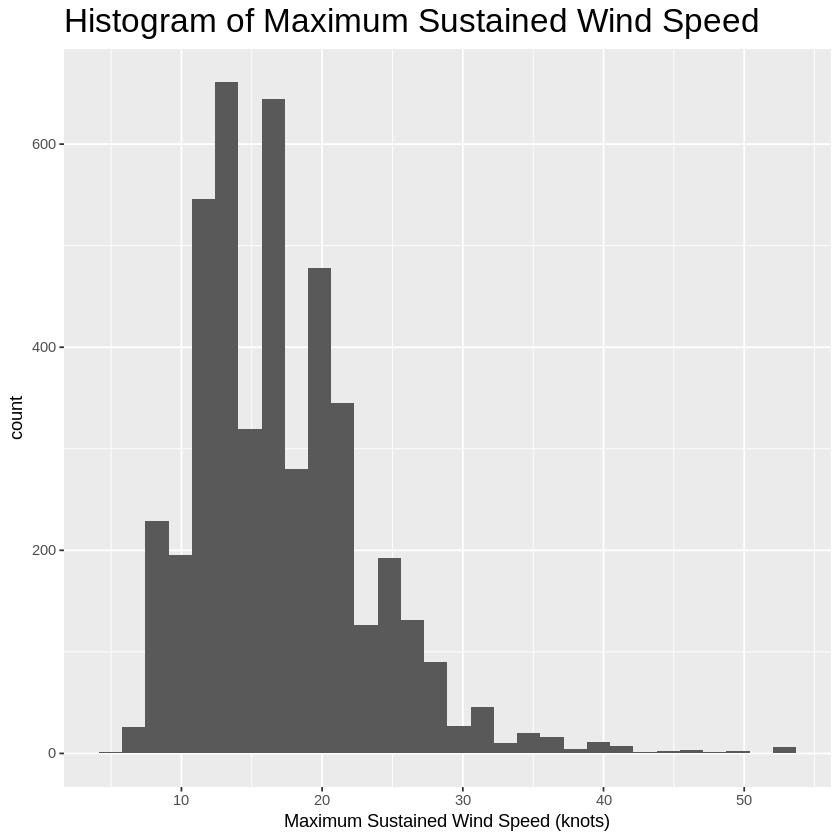

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


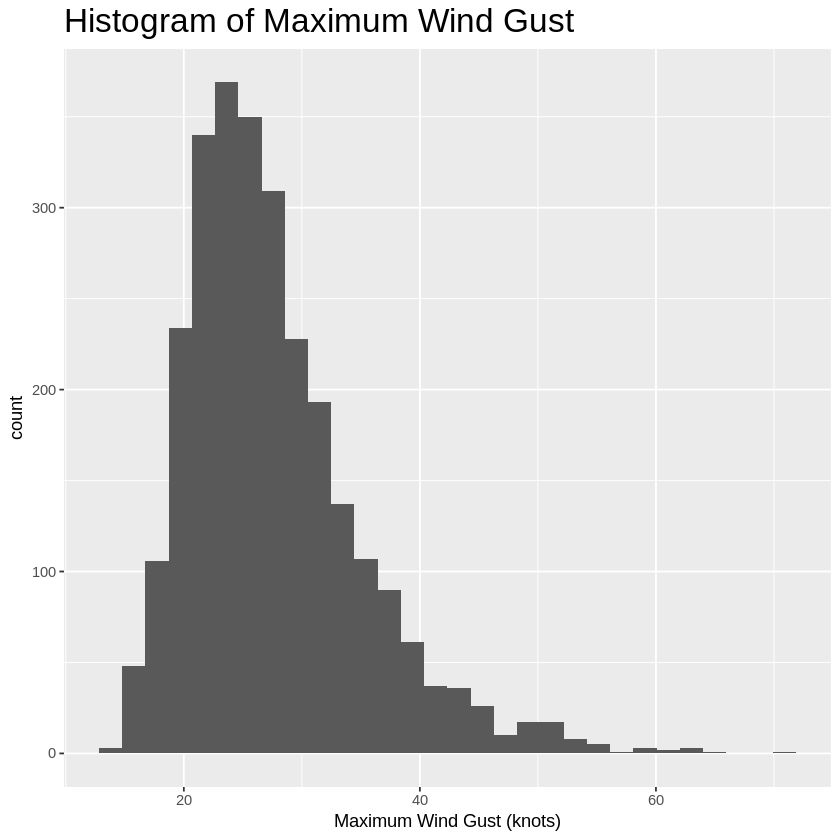

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


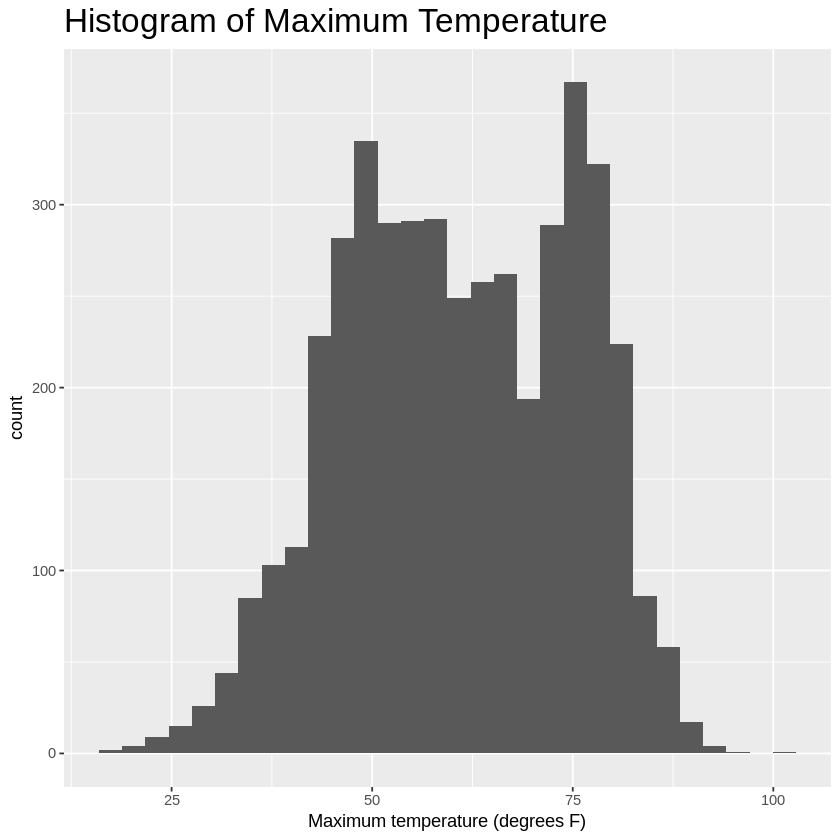

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 39 rows containing non-finite outside the scale range (`stat_bin()`).”


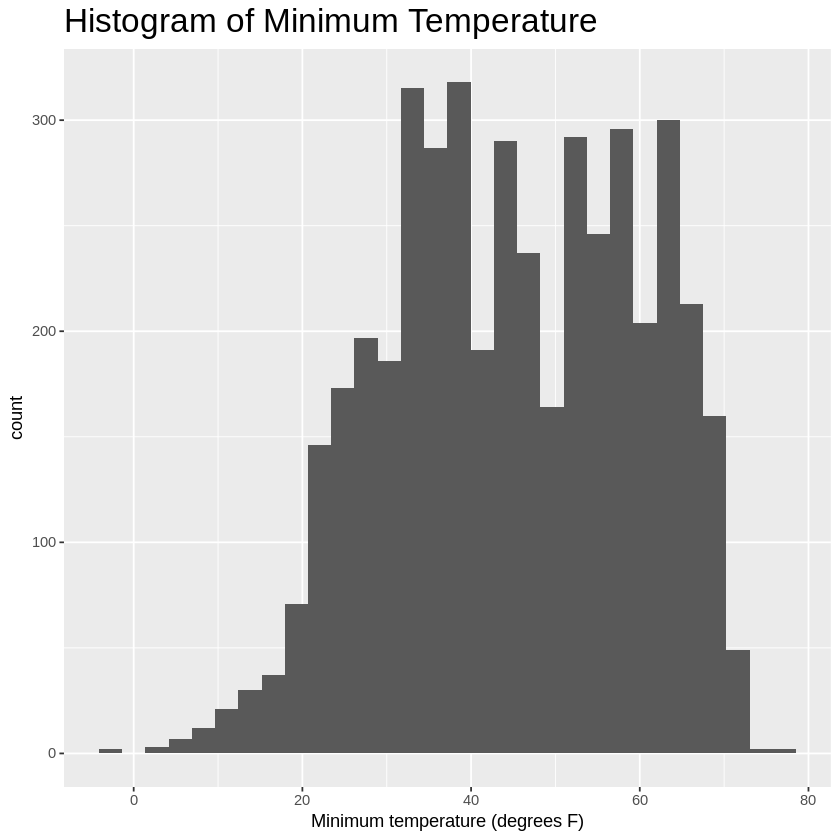

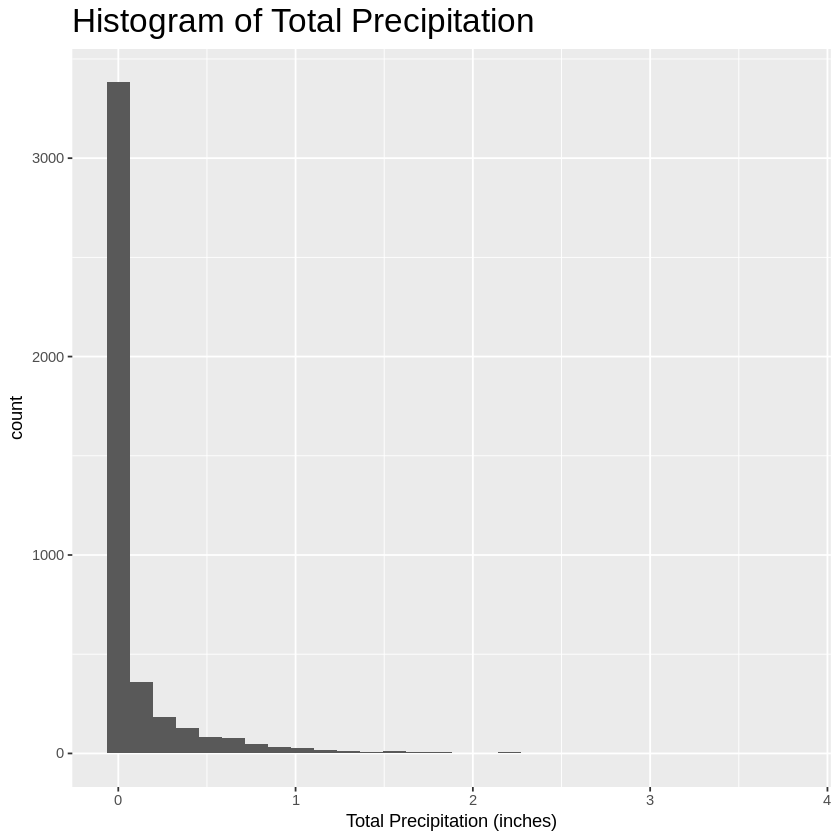

In [20]:
#create a histogram for mean temp
ggplot(ls1, aes(x=temp)) +
  geom_histogram() +
    #add title
  ggtitle("Histogram of Mean Temperature") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Mean temperature (degrees F)", y = "Number of collisions")

#create a histogram for mean dewp
ggplot(ls1, aes(x=dewp)) +
  geom_histogram() +
    #add title
  ggtitle("Histogram of Mean Dewpoint") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Mean Dewpoint (degrees F)", y = "Number of collisions")

#create a histogram for mean sea level pressure
ggplot(ls1, aes(x=slp)) +
  geom_histogram() +
    #add title
  ggtitle("Histogram of Mean Sea Level Pressure") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Mean Sea Level Pressure (millibars)", y = "Number of collisions")

#create a histogram for mean visibility
ggplot(ls1, aes(x=visib)) +
  geom_histogram() +
    #add title
  ggtitle("Histogram of Mean Visibility") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Mean Visibility (miles)")

#create a histogram for mean wind speed
ggplot(ls1, aes(x=wdsp)) +
  geom_histogram() +
    #add title
  ggtitle("Histogram of Mean Wind Speed") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Mean Wind Speed (knots)")

#create a histogram for maximum sustained wind speed
ggplot(ls1, aes(x=mxpsd)) +
  geom_histogram() +
    #add title
  ggtitle("Histogram of Maximum Sustained Wind Speed") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Maximum Sustained Wind Speed (knots)")

#create a histogram for maximum wind gust
ggplot(ls1, aes(x=gust)) +
  geom_histogram() +
    #add title
  ggtitle("Histogram of Maximum Wind Gust") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Maximum Wind Gust (knots)")

#create a histogram for maximum temp
ggplot(ls1, aes(x=max)) +
  geom_histogram() +
    #add title
  ggtitle("Histogram of Maximum Temperature") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Maximum temperature (degrees F)")

#create a histogram for minimum temp
ggplot(ls1, aes(x=min)) +
  geom_histogram() +
    #add title
  ggtitle("Histogram of Minimum Temperature") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Minimum temperature (degrees F)")

#create a histogram for total precipitation
ggplot(ls1, aes(x=prcp)) +
  geom_histogram() +
    #add title
  ggtitle("Histogram of Total Precipitation") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Total Precipitation (inches)")



**Weather Variables vs. Number of Collisions**

Plots were created to explore and visualise the relationships between different weather variables and number of collisions. The correlation, covariance, standard deviation, and variance were calculated where appropriate. None of the variables showed a strong correlation (negative or positive) with number of collisions. In most cases, the best fit line is virtually flat.

**Mean Temperature vs. Number of Collisions**

There is a weak positive correlation between mean temperature and number of collisions. The covariance is also positive, indicating a positive relationship. Variance and standard deviation are fairly high, indicating the data is spread out. The plot shows the number of collisions increasing slightly as the mean temperature increases.


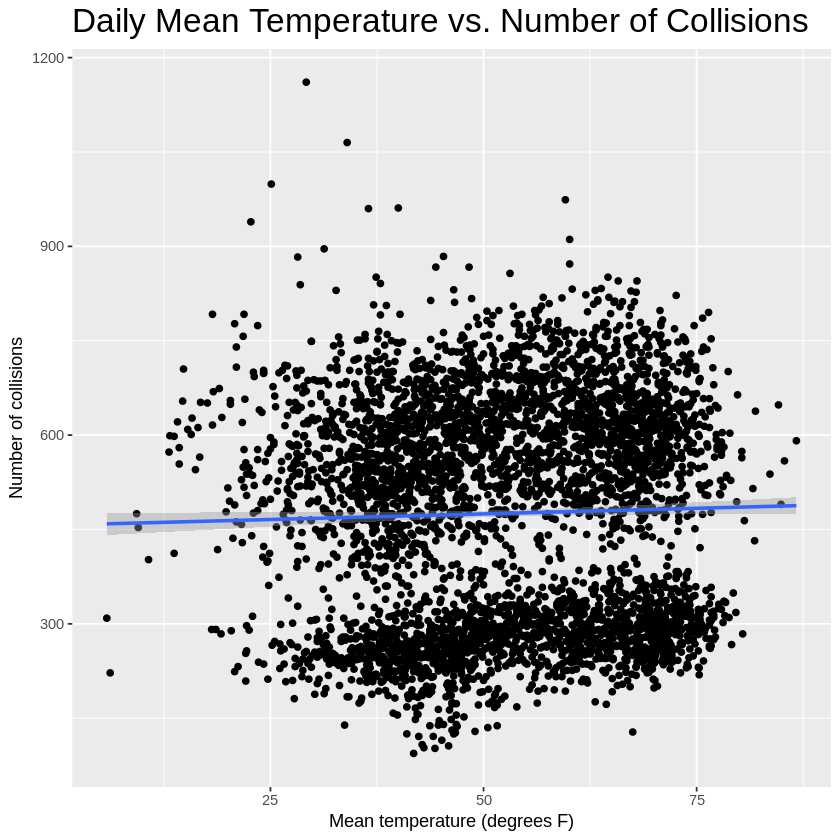

In [21]:
# use ggplot to plot Mean Temperature vs Number of Collisions
# exclude data where temp is NA
ggplot(data=subset(ls1, !is.na(temp)), aes(x = temp, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
    #add title
  ggtitle("Daily Mean Temperature vs. Number of Collisions") +
    #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Mean temperature (degrees F)", y = "Number of collisions")

In [22]:
# use cor() to calculate the correlation between mean temp. and number of collisions
# use complete.obs to exclude NAs in the data
a1 <- cor(ls1$temp, ls1$NUM_COLLISIONS, use='complete.obs')

# use cov() to calculate the covariance between mean temp. and number of collisions
# use complete.obs to exclude NAs in the data
a2 <- cov(ls1$temp, ls1$NUM_COLLISIONS, use='complete.obs')

# use var() to calculate the variance in mean temp.
# use complete.obs to exclude NAs in the data
a3 <- var(ls1$temp, use='complete.obs')

# use sd() to calculate the standard deviation in mean temp.
# use , na.rm = TRUE to exclude NAs in the data
a4 <- sd(ls1$temp, na.rm = TRUE)

paste("Correlation: ", a1)
paste("Covariance: ", a2)
paste("Variance: ", a3)
paste("Standard Deviation: ", a4)

[1] "Correlation:  0.0287513388768744"

[1] "Covariance:  71.3502005003294"

[1] "Variance:  200.013013361472"

[1] "Standard Deviation:  14.1425957080541"

**Mean Visibility vs. Number of Collisions**

There is a weak negative correlation between mean visibility and number of collisions. The covariance is also negative, indicating a negative relationship. As seen in the plot, the number of collisions decreases slightly as mean visibility increases. Variance and standard deviation are a little low, indicating the data is not very spread out. There are a large number of data points where mean visibility is 10.0 miles (~35% of observations). Although not explicitly stated, this may be the maximum that is measured.


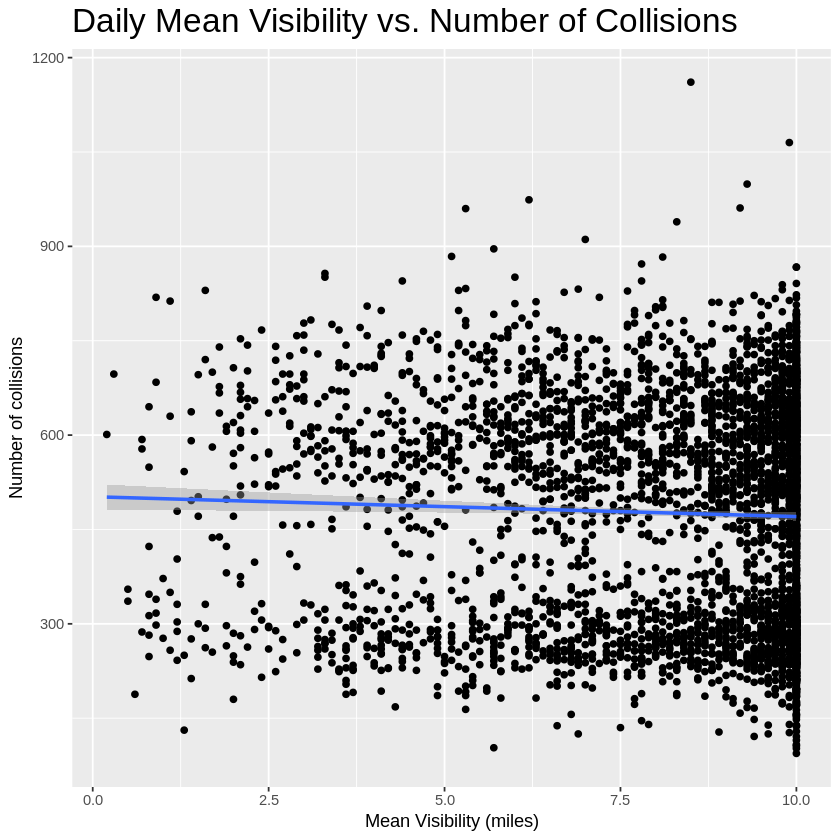

In [23]:
# plot Mean Visibility vs Number of Collisions
# exclude data where visibility is NA
ggplot(data=subset(ls1, !is.na(visib)), aes(x = visib, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Daily Mean Visibility vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Mean Visibility (miles)", y = "Number of collisions")

In [24]:
# use cor() to calculate the correlation between mean visib. and number of collisions
# use complete.obs to exclude NAs in the data
b1 <- cor(ls1$visib, ls1$NUM_COLLISIONS, use='complete.obs')

# use cov() to calculate the covariance between mean visib. and number of collisions
# use complete.obs to exclude NAs in the data
b2 <- cov(ls1$visib, ls1$NUM_COLLISIONS, use='complete.obs')

# use var() to calculate the variance in mean visib.
# use complete.obs to exclude NAs in the data
b3 <- var(ls1$visib, use='complete.obs')

# use sd() to calculate the standard deviation in mean visib.
# use , na.rm = TRUE to exclude NAs in the data
b4 <- sd(ls1$visib, na.rm = TRUE)

paste("Correlation: ", b1)
paste("Covariance: ", b2)
paste("Variance: ", b3)
paste("Standard Deviation: ", b4)

# count the number of observations that are not 10.0
ls1 %>%
  count(visib != 10.0)

[1] "Correlation:  -0.03931787425263"

[1] "Covariance:  -15.0864007987095"

[1] "Variance:  4.78162185899394"

[1] "Standard Deviation:  2.18669198996885"

visib != 10 n   
1 FALSE       1569
2  TRUE       2882

**Reported Fog vs. Number of Collisions**

There is a weak positive correlation between reported fog and number of collisions. The covariance is also positive, indicating a positive relationship. As seen in the plot, the number of collisions tends to increase when fog is reported. Fog was reported ~25% of the time.

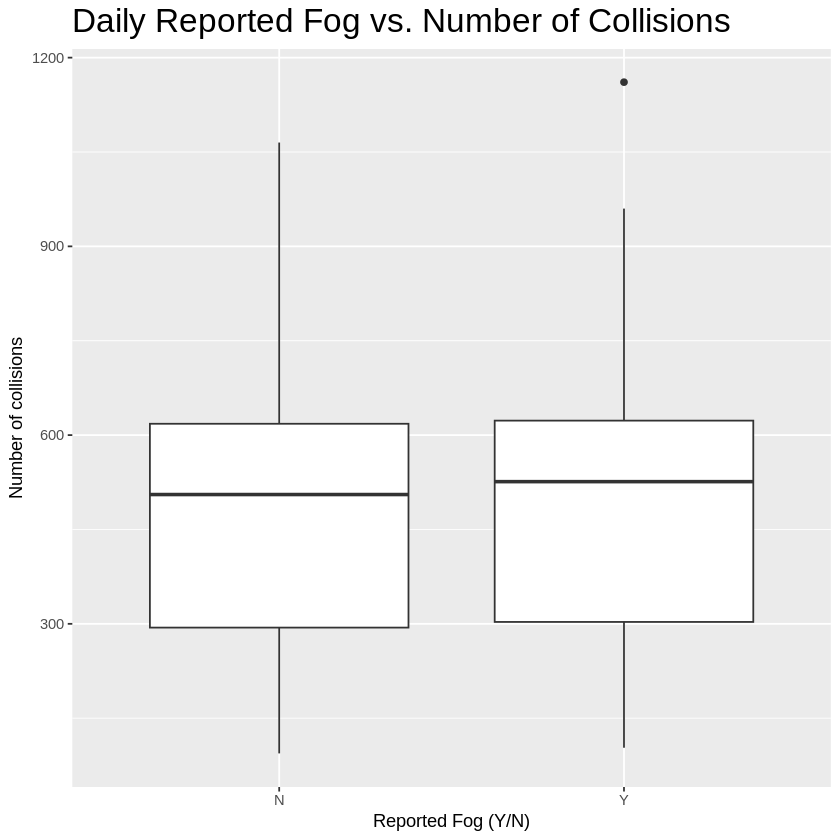

In [25]:
#fog is a ordinal variable; 0 means N/not reported and 1 means Yes
#create a copy of the dataframe
ls2 <- ls1
#change fog from an integer to a character variable
ls2$fog <- as.character(ls2$fog)
#recode the fog variable using fct_recode() from the forcats package so that zero is N and one is Y
ls2$fog <- fct_recode(ls2$fog,
    "N" = "0",
    "Y" = "1")

# plot Recorded Fog vs Number of Collisions
ggplot(ls2, aes(x = fog, y = NUM_COLLISIONS)) +
  #create a boxplot
  geom_boxplot()+
  #add title
  ggtitle("Daily Reported Fog vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Reported Fog (Y/N)", y = "Number of collisions")

In [26]:
#use cor() function to calculate correlation between fog and number of collisions
#use Spearman's method since fog is an ordinal variable
c1 <- cor(ls1$fog, ls1$NUM_COLLISIONS, method = "spearman")

# use cov() to calculate the covariance between fog and number of collisions
#use Spearman's method since fog is an ordinal variable
c2 <- cov(ls1$fog, ls1$NUM_COLLISIONS, method = "spearman")

paste("Correlation: ", c1)
paste("Covariance: ", c2)

#count the number of times fog is reported vs. not reported
ls2 %>%
  count(fog)

[1] "Correlation:  0.0361087145770921"

[1] "Covariance:  44883.0838202247"

fog n   
1 N   3326
2 Y   1125

**Mean Dewpoint vs. Number of Collisions**

There is a weak positive correlation between mean dewpoint and number of collisions. The covariance is also positive, indicating a positive relationship. Variance and standard deviation are fairly high, indicating the data is spread out. The plot shows the number of collisions increases only slightly as the mean dewpoint increases.


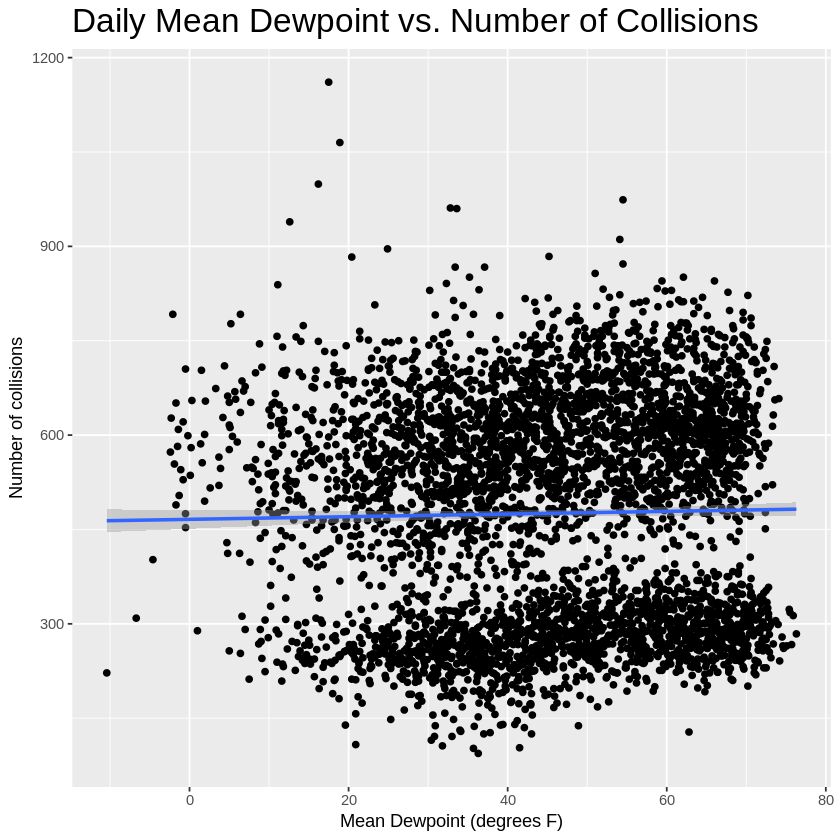

In [27]:
# plot Mean Dewpoint vs Number of Collisions
# exclude data where Dewpoint is NA
ggplot(data=subset(ls1, !is.na(dewp)), aes(x = dewp, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Daily Mean Dewpoint vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Mean Dewpoint (degrees F)", y = "Number of collisions")

In [28]:
# use cor() to calculate the correlation between mean dewpoint and number of collisions
# use complete.obs to exclude NAs in the data
d1 <- cor(ls1$dewp, ls1$NUM_COLLISIONS, use='complete.obs')

# use cov() to calculate the covariance between mean dewpoint and number of collisions
# use complete.obs to exclude NAs in the data
d2 <- cov(ls1$dewp, ls1$NUM_COLLISIONS, use='complete.obs')

# use var() to calculate the variance in mean dewpoint
# use complete.obs to exclude NAs in the data
d3 <- var(ls1$dewp, use='complete.obs')

# use sd() to calculate the standard deviation in mean dewpoint
# use , na.rm = TRUE to exclude NAs in the data
d4 <- sd(ls1$dewp, na.rm = TRUE)

paste("Correlation: ", d1)
paste("Covariance: ", d2)
paste("Variance: ", d3)
paste("Standard Deviation: ", d4)

[1] "Correlation:  0.0200866049655038"

[1] "Covariance:  58.7217809380217"

[1] "Variance:  277.54897047386"

[1] "Standard Deviation:  16.6598010334415"

**Mean Sea Level Pressure vs. Number of Collisions**

There is a weak positive correlation between mean sea level pressure and number of collisions. The covariance is also positive, indicating a positive relationship. Variance and standard deviation are fairly high, indicating the data is spread out. The plot shows the number of collisions increases only slightly as the mean sea level pressure increases.


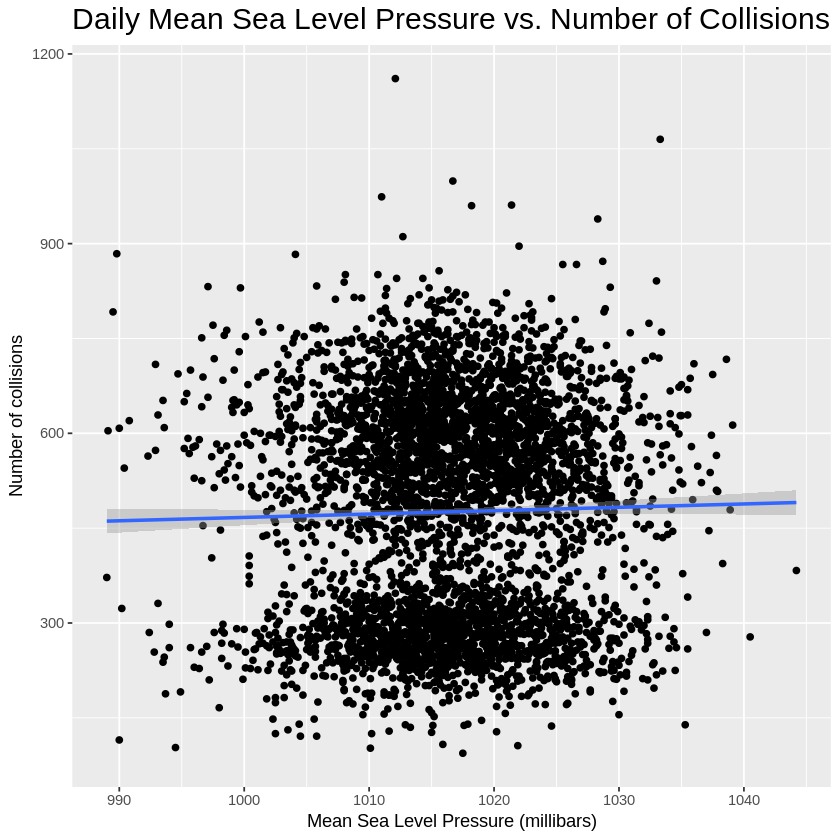

In [29]:
# plot Mean Sea Level Pressure vs Number of Collisions
# exclude data where slp is NA
ggplot(data=subset(ls1, !is.na(slp)), aes(x = slp, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Daily Mean Sea Level Pressure vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 18)) +
      #change axis lables
      labs(x = "Mean Sea Level Pressure (millibars)", y = "Number of collisions")

In [30]:
# use cor() to calculate the correlation between mean Sea Level Pressure and number of collisions
# use complete.obs to exclude NAs in the data
e1 <- cor(ls1$slp, ls1$NUM_COLLISIONS, use='complete.obs')

# use cov() to calculate the covariance between mean Sea Level Pressure and number of collisions
# use complete.obs to exclude NAs in the data
e2 <- cov(ls1$slp, ls1$NUM_COLLISIONS, use='complete.obs')

# use var() to calculate the variance in mean Sea Level Pressure
# use complete.obs to exclude NAs in the data
e3 <- var(ls1$slp, use='complete.obs')

# use sd() to calculate the standard deviation in mean Sea Level Pressure
# use , na.rm = TRUE to exclude NAs in the data
e4 <- sd(ls1$slp, na.rm = TRUE)

paste("Correlation: ", e1)
paste("Covariance: ", e2)
paste("Variance: ", e3)
paste("Standard Deviation: ", e4)

[1] "Correlation:  0.0230614979338322"

[1] "Covariance:  30.7515316384174"

[1] "Variance:  57.7393662994048"

[1] "Standard Deviation:  7.59864239844229"

**Mean Wind Speed vs. Number of Collisions**

There is a weak negative correlation between mean wind speed and number of collisions. The covariance is also negative, indicating a negative relationship. Variance and standard deviation are reasonably high, indicating the data is somewhat spread out. As shown in the plot, the number of collisions tends to decrease as the mean wind speed increases.


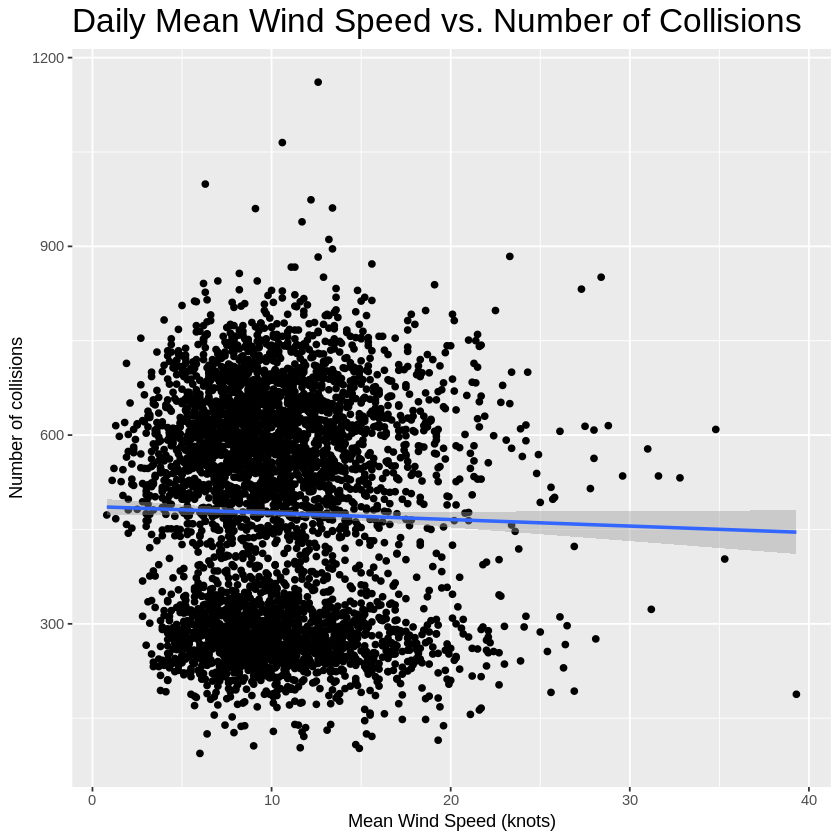

In [31]:
# plot Mean Wind Speed vs Number of Collisions
# exclude data where wdsp is NA
ggplot(data=subset(ls1, !is.na(wdsp)), aes(x = wdsp, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Daily Mean Wind Speed vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Mean Wind Speed (knots)", y = "Number of collisions")

In [32]:
# use cor() to calculate the correlation between mean wind speed and number of collisions
# use complete.obs to exclude NAs in the data
f1 <- cor(ls1$wdsp, ls1$NUM_COLLISIONS, use='complete.obs')

# use cov() to calculate the covariance between mean wind speed and number of collisions
# use complete.obs to exclude NAs in the data
f2 <- cov(ls1$wdsp, ls1$NUM_COLLISIONS, use='complete.obs')

# use var() to calculate the variance in mean wind speed
# use complete.obs to exclude NAs in the data
f3 <- var(ls1$wdsp, use='complete.obs')

# use sd() to calculate the standard deviation in mean wind speed
# use , na.rm = TRUE to exclude NAs in the data
f4 <- sd(ls1$wdsp, na.rm = TRUE)

paste("Correlation: ", f1)
paste("Covariance: ", f2)
paste("Variance: ", f3)
paste("Standard Deviation: ", f4)

[1] "Correlation:  -0.025611355667545"

[1] "Covariance:  -19.4707594808893"

[1] "Variance:  18.770880880701"

[1] "Standard Deviation:  4.33253746443132"

**Maximum Sustained Wind Speed vs. Number of Collisions**

There is a weak negative correlation between maximum sustained wind speed and number of collisions. The covariance is also negative, indicating a negative relationship. Variance and standard deviation are reasonably high, indicating the data is somewhat spread out. As shown in the plot, the number of collisions decreases slightly as the maximum sustained wind speed increases.


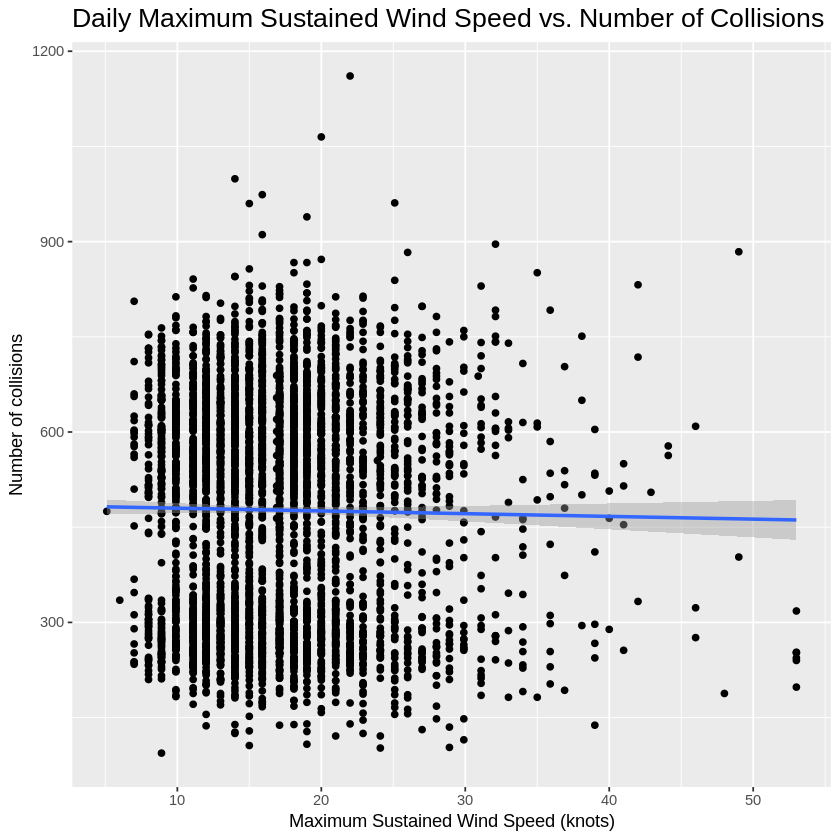

In [33]:
# plot Maximum sustained wind speed vs Number of Collisions
# exclude data where mxpsd is NA
ggplot(data=subset(ls1, !is.na(mxpsd)), aes(x = mxpsd, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Daily Maximum Sustained Wind Speed vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 16)) +
      #change axis lables
      labs(x = "Maximum Sustained Wind Speed (knots)", y = "Number of collisions")

In [34]:
# use cor() to calculate the correlation between max sustained wind speed and number of collisions
# use complete.obs to exclude NAs in the data
g1 <- cor(ls1$mxpsd, ls1$NUM_COLLISIONS, use='complete.obs')

# use cov() to calculate the covariance between max sustained wind speed and number of collisions
# use complete.obs to exclude NAs in the data
g2 <- cov(ls1$mxpsd, ls1$NUM_COLLISIONS, use='complete.obs')

# use var() to calculate the variance in max sustained wind speed
# use complete.obs to exclude NAs in the data
g3 <- var(ls1$mxpsd, use='complete.obs')

# use sd() to calculate the standard deviation in max sustained wind speed
# use , na.rm = TRUE to exclude NAs in the data
g4 <- sd(ls1$mxpsd, na.rm = TRUE)

paste("Correlation: ", g1)
paste("Covariance: ", g2)
paste("Variance: ", g3)
paste("Standard Deviation: ", g4)

[1] "Correlation:  -0.0147733000102077"

[1] "Covariance:  -15.5361993474206"

[1] "Variance:  36.0142959970275"

[1] "Standard Deviation:  6.00119121483623"

**Maximum Wind Gust vs. Number of Collisions**

There is a weak negative correlation between maximum wind gust and number of collisions. The covariance is also negative, indicating a negative relationship. Variance and standard deviation are fairly high, indicating the data is spread out. As shown in the plot, the number of collisions tends to decrease as the maximum wind gust increases.

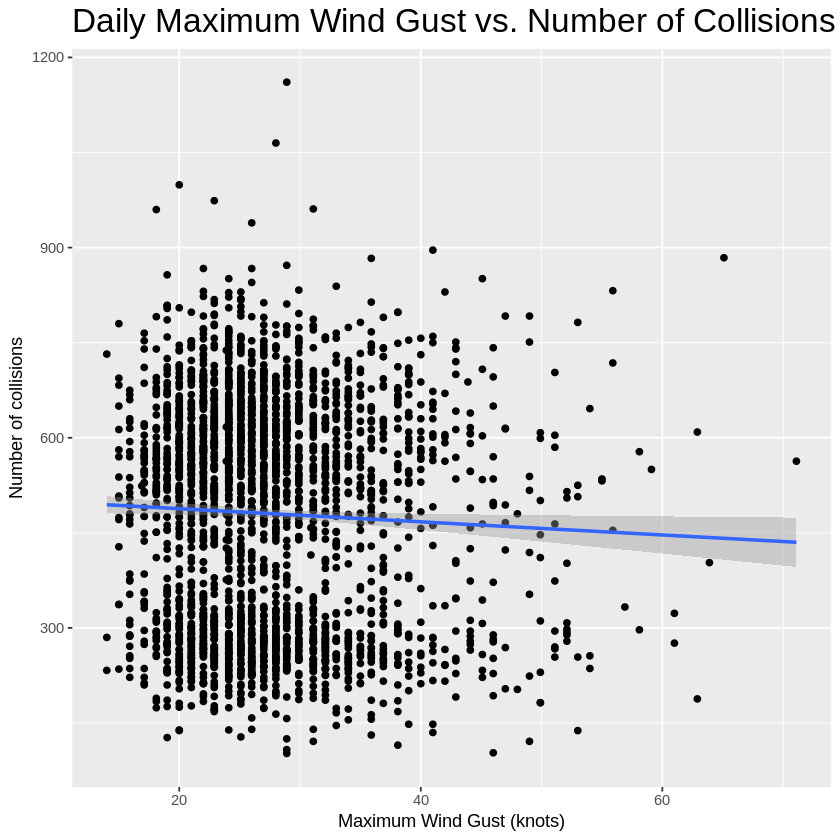

In [35]:
# plot Maximum wind gust vs Number of Collisions
# exclude data where gust is NA
ggplot(data=subset(ls1, !is.na(gust)), aes(x = gust, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Daily Maximum Wind Gust vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Maximum Wind Gust (knots)", y = "Number of collisions")

In [36]:
# use cor() to calculate the correlation between max wind gust and number of collisions
# use complete.obs to exclude NAs in the data
h1 <- cor(ls1$gust, ls1$NUM_COLLISIONS, use='complete.obs')

# use cov() to calculate the covariance between max wind gust and number of collisions
# use complete.obs to exclude NAs in the data
h2 <- cov(ls1$gust, ls1$NUM_COLLISIONS, use='complete.obs')

# use var() to calculate the variance in max wind gust
# use complete.obs to exclude NAs in the data
h3 <- var(ls1$gust, use='complete.obs')

# use sd() to calculate the standard deviation in max wind gust
# use , na.rm = TRUE to exclude NAs in the data
h4 <- sd(ls1$gust, na.rm = TRUE)

paste("Correlation: ", h1)
paste("Covariance: ", h2)
paste("Variance: ", h3)
paste("Standard Deviation: ", h4)

[1] "Correlation:  -0.0440762189975636"

[1] "Covariance:  -58.3737814972201"

[1] "Variance:  56.3561553972406"

[1] "Standard Deviation:  7.50707369067606"

**Maximum Temperature vs. Number of Collisions**

There is a weak positive correlation between maximum temperature and number of collisions. The covariance is also positive, indicating a positive relationship. Variance and standard deviation are fairly high, indicating the data is spread out. The plot shows a slight increase in number of collisions as the maximum temperature increases.


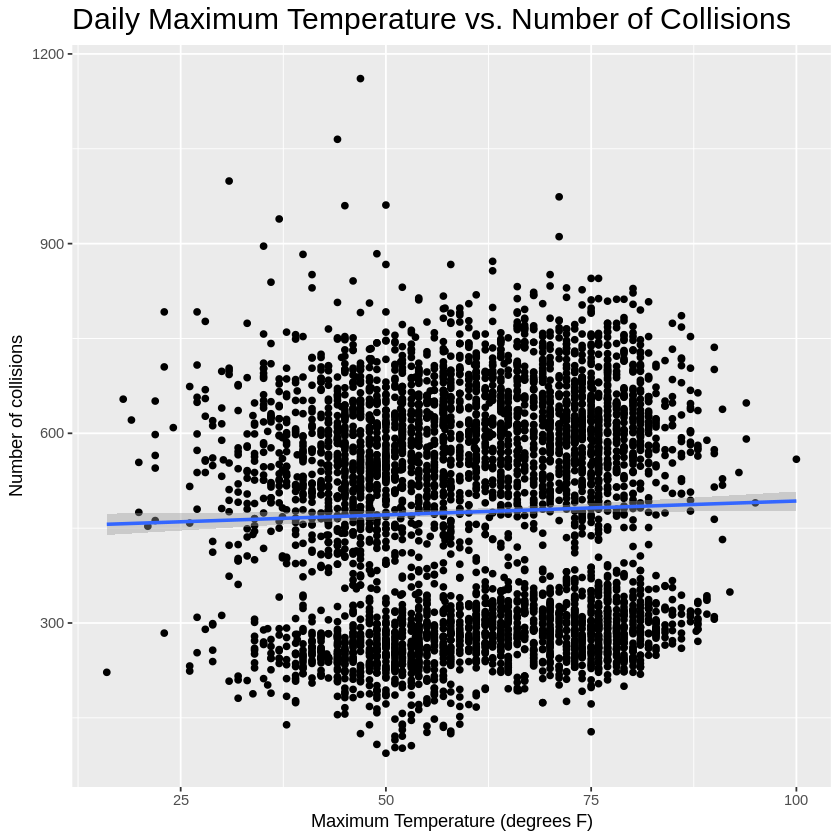

In [37]:
# plot Maximum temperature vs Number of Collisions
# exclude data where max is NA
ggplot(data=subset(ls1, !is.na(max)), aes(x = max, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Daily Maximum Temperature vs. Number of Collisions")+
  #increase title font size
    theme(plot.title = element_text(size = 18)) +
      #change axis lables
      labs(x = "Maximum Temperature (degrees F)", y = "Number of collisions")

In [38]:
# use cor() to calculate the correlation between max temp and number of collisions
# use complete.obs to exclude NAs in the data
i1 <- cor(ls1$max, ls1$NUM_COLLISIONS, use='complete.obs')

# use cov() to calculate the covariance between max temp and number of collisions
# use complete.obs to exclude NAs in the data
i2 <- cov(ls1$max, ls1$NUM_COLLISIONS, use='complete.obs')

# use var() to calculate the variance in max temp
# use complete.obs to exclude NAs in the data
i3 <- var(ls1$max, use='complete.obs')

# use sd() to calculate the standard deviation in max temp
# use , na.rm = TRUE to exclude NAs in the data
i4 <- sd(ls1$max, na.rm = TRUE)

paste("Correlation: ", i1)
paste("Covariance: ", i2)
paste("Variance: ", i3)
paste("Standard Deviation: ", i4)

[1] "Correlation:  0.035640091353597"

[1] "Covariance:  89.2995988680741"

[1] "Variance:  203.894449381656"

[1] "Standard Deviation:  14.2791613682897"

**Minimum Temperature vs. Number of Collisions**

There is a weak positive correlation between minimum temperature and number of collisions. The covariance is also positive, indicating a positive relationship. Variance and standard deviation are fairly high, indicating the data is spread out. The plot shows only a slight increase in number of collisions as the minimum temperature increases.


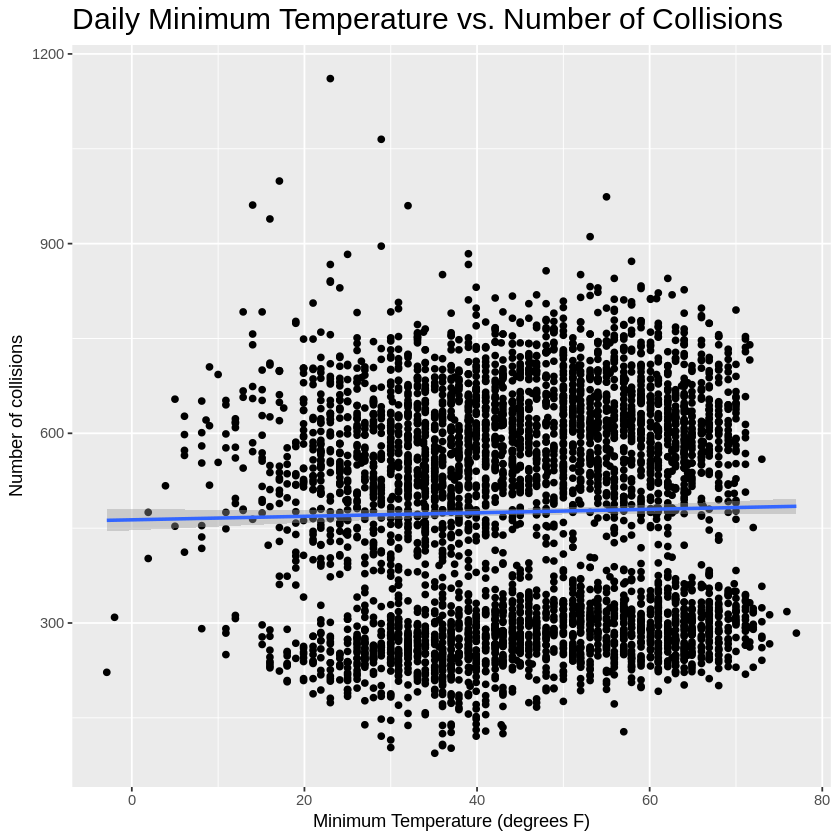

In [39]:
# plot Minimum temperature vs Number of Collisions
# exclude data where min is NA
ggplot(data=subset(ls1, !is.na(min)), aes(x = min, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Daily Minimum Temperature vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 18)) +
      #change axis lables
      labs(x = "Minimum Temperature (degrees F)", y = "Number of collisions")

In [40]:
# use cor() to calculate the correlation between min temp and number of collisions
# use complete.obs to exclude NAs in the data
j1 <- cor(ls1$min, ls1$NUM_COLLISIONS, use='complete.obs')

# use cov() to calculate the covariance between min temp and number of collisions
# use complete.obs to exclude NAs in the data
j2 <- cov(ls1$min, ls1$NUM_COLLISIONS, use='complete.obs')

# use var() to calculate the variance in min temp
# use complete.obs to exclude NAs in the data
j3 <- var(ls1$min, use='complete.obs')

# use sd() to calculate the standard deviation in min temp
# use , na.rm = TRUE to exclude NAs in the data
j4 <- sd(ls1$min, na.rm = TRUE)

paste("Correlation: ", j1)
paste("Covariance: ", j2)
paste("Variance: ", j3)
paste("Standard Deviation: ", j4)

[1] "Correlation:  0.023222508403456"

[1] "Covariance:  59.7592158863429"

[1] "Variance:  215.067866806348"

[1] "Standard Deviation:  14.6651923549045"

**Total Precipitation vs. Number of Collisions**

There is a weak positive correlation between total precipitation and number of collisions. The covariance is also positive, indicating a positive relationship. As shown in the plot, the number of collisions tends to increase as the total precipitation increases. Variance and standard deviation are low, indicating the data is not very spread out. There are a large number of data points where total precipitation was zero. Total precipitation was zero for ~60% of observations.

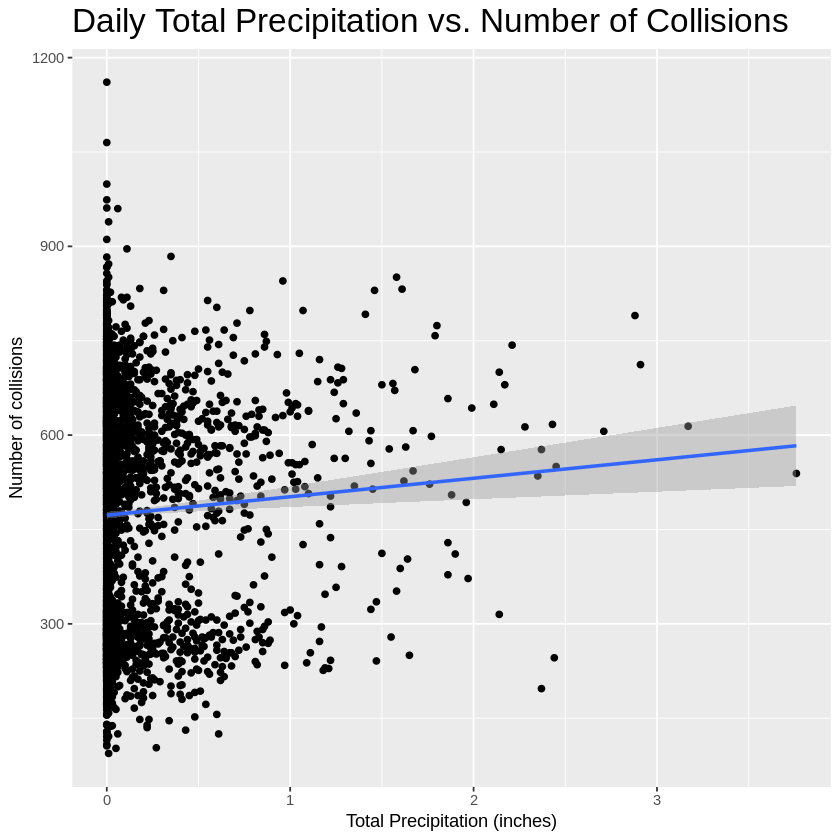

In [41]:
# plot Total precipitation vs Number of Collisions
# exclude data where prcp is NA
ggplot(data=subset(ls1, !is.na(prcp)), aes(x = prcp, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Daily Total Precipitation vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Total Precipitation (inches)", y = "Number of collisions")

In [42]:
# use cor() to calculate the correlation between total precip and number of collisions
# use complete.obs to exclude NAs in the data
k1 <- cor(ls1$prcp, ls1$NUM_COLLISIONS, use='complete.obs')

# use cov() to calculate the covariance between total precip and number of collisions
# use complete.obs to exclude NAs in the data
k2 <- cov(ls1$prcp, ls1$NUM_COLLISIONS, use='complete.obs')

# use var() to calculate the variance in total precip
# use complete.obs to exclude NAs in the data
k3 <- var(ls1$prcp, use='complete.obs')

# use sd() to calculate the standard deviation in total precip
# use , na.rm = TRUE to exclude NAs in the data
k4 <- sd(ls1$prcp, na.rm = TRUE)

paste("Correlation: ", k1)
paste("Covariance: ", k2)
paste("Variance: ", k3)
paste("Standard Deviation: ", k4)

# count the number of observations that are not 0.0
ls1 %>%
  count(prcp != 0.0)

[1] "Correlation:  0.0495709147753543"

[1] "Covariance:  2.58223190272896"

[1] "Variance:  0.0879223750357889"

[1] "Standard Deviation:  0.296517073767749"

prcp != 0 n   
1 FALSE     2665
2  TRUE     1747
3    NA       39

**Log Variables vs. Number of Collisions**

I also tried taking the log of the variables with skewed distributions (visib, wdsp, mxpsd, gust, prcp), but this did little to improve the linear relationships or correlations.

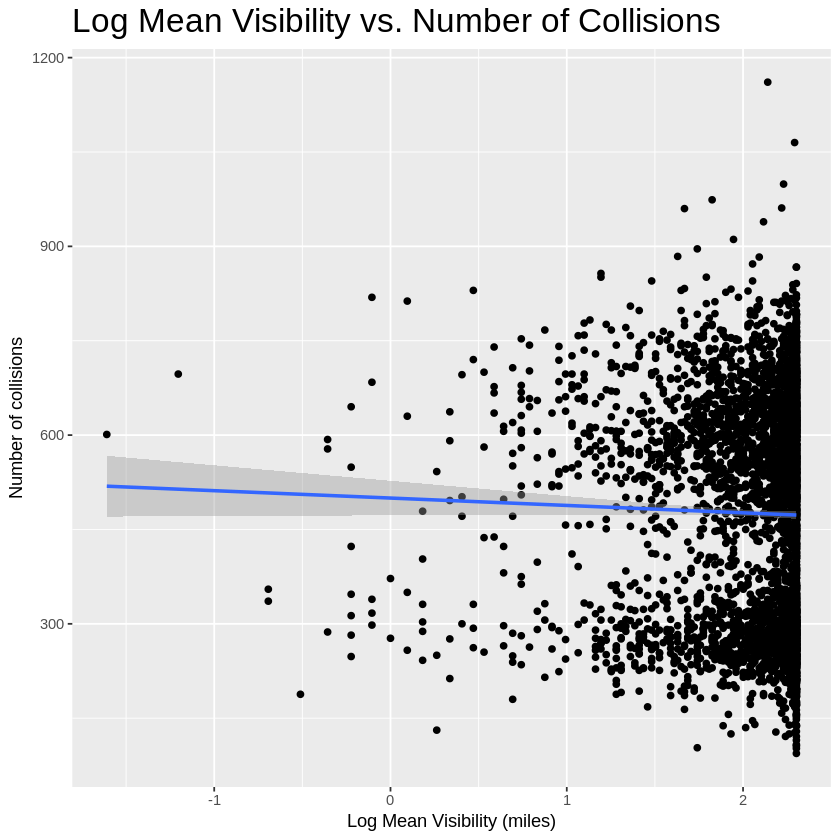

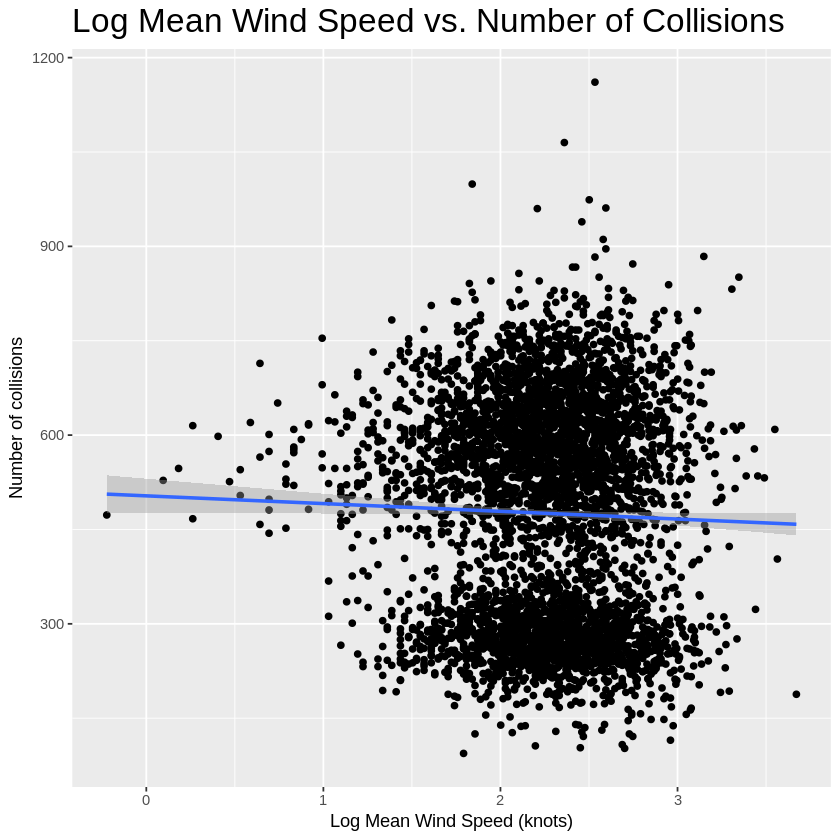

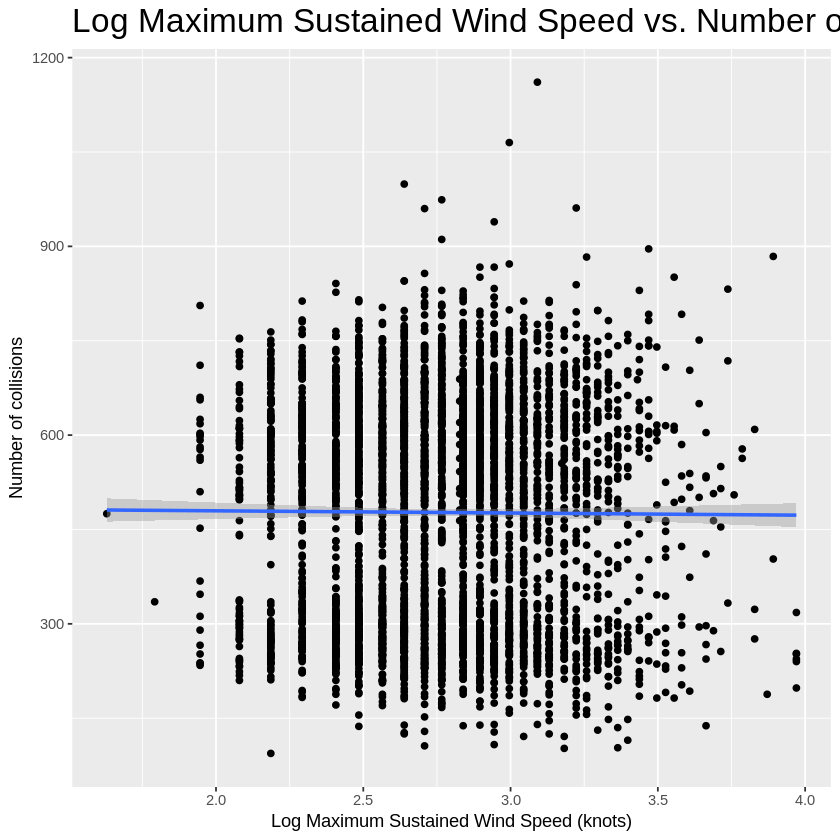

Warning message:
“Removed 2665 rows containing non-finite outside the scale range
(`stat_smooth()`).”


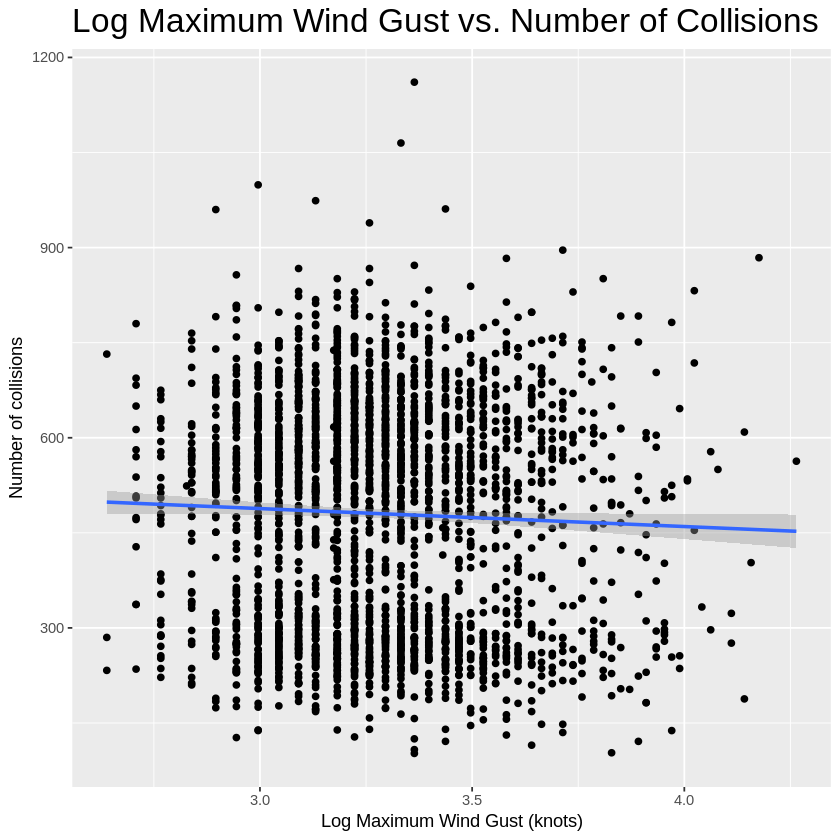

[1] "Correlation of Number of Collisions with Log Mean Visibility:  -0.0263596800800994"

[1] "Correlation of Number of Collisions with Log Mean Wind Speed:  -0.0304073444204565"

[1] "Correlation of Number of Collisions with Log Maximum Sustained Wind Speed:  -0.00668258239441662"

[1] "Correlation of Number of Collisions with Log Maximum Wind Gust:  -0.0407078648191315"

[1] "Correlation of Number of Collisions with Log Total Precipitation:  NaN"

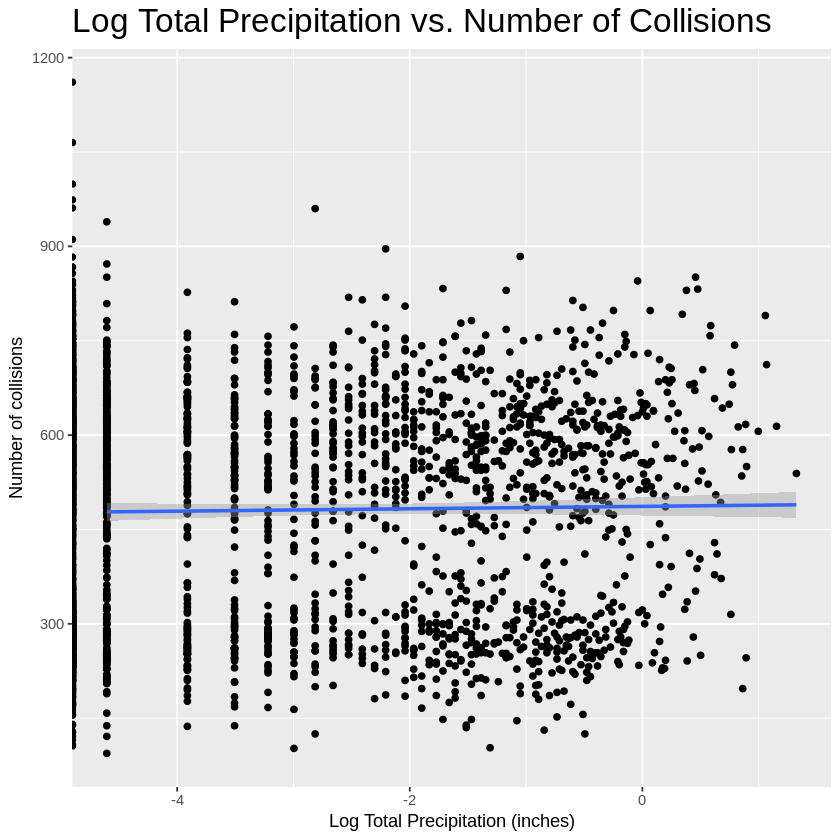

In [43]:
#add a column for log of visib
ls1$visib_log <-log(ls1$visib)

# plot log Mean Visibility vs Number of Collisions
# exclude NA
ggplot(data=subset(ls1, !is.na(visib_log)), aes(x = visib_log, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Log Mean Visibility vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Log Mean Visibility (miles)", y = "Number of collisions")

#calculate correlation
z1 <- cor(ls1$visib_log, ls1$NUM_COLLISIONS, use='complete.obs')

#add a column for log of wdsp
ls1$wdsp_log <-log(ls1$wdsp)

# plot log Mean Wind Speed vs Number of Collisions
# exclude NA
ggplot(data=subset(ls1, !is.na(wdsp_log)), aes(x = wdsp_log, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Log Mean Wind Speed vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Log Mean Wind Speed (knots)", y = "Number of collisions")

#calculate correlation
z2 <- cor(ls1$wdsp_log, ls1$NUM_COLLISIONS, use='complete.obs')

#add a column for log of mxpsd
ls1$mxpsd_log <-log(ls1$mxpsd)

# plot log mxpsd vs Number of Collisions
# exclude NA
ggplot(data=subset(ls1, !is.na(mxpsd_log)), aes(x = mxpsd_log, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Log Maximum Sustained Wind Speed vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Log Maximum Sustained Wind Speed (knots)", y = "Number of collisions")

#calculate correlation
z3 <- cor(ls1$mxpsd_log, ls1$NUM_COLLISIONS, use='complete.obs')

#add a column for log of gust
ls1$gust_log <-log(ls1$gust)

# plot Log Maximum Wind Gust vs Number of Collisions
# exclude NA
ggplot(data=subset(ls1, !is.na(gust_log)), aes(x = gust_log, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Log Maximum Wind Gust vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Log Maximum Wind Gust (knots)", y = "Number of collisions")

#calculate correlation
z4 <- cor(ls1$gust_log, ls1$NUM_COLLISIONS, use='complete.obs')

#add a column for log of prcp
ls1$prcp_log <-log(ls1$prcp)

# plot Log Total Precip vs Number of Collisions
# exclude data that is NA
ggplot(data=subset(ls1, !is.na(prcp_log)), aes(x = prcp_log, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
  #add title
  ggtitle("Log Total Precipitation vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Log Total Precipitation (inches)", y = "Number of collisions")

#calculate correlation
z5 <- cor(ls1$prcp_log, ls1$NUM_COLLISIONS, use='complete.obs')

paste("Correlation of Number of Collisions with Log Mean Visibility: ", z1)
paste("Correlation of Number of Collisions with Log Mean Wind Speed: ", z2)
paste("Correlation of Number of Collisions with Log Maximum Sustained Wind Speed: ", z3)
paste("Correlation of Number of Collisions with Log Maximum Wind Gust: ", z4)
paste("Correlation of Number of Collisions with Log Total Precipitation: ", z5)

**Day of the Week vs. Number of Collisions**

As shown in the plot, there appears to be a trend in the data with the number of collision increasing from Monday before peaking on Friday and then declining over the weekend.

Day of the week is a categorical variable. Further analysis shows that the distributions are approximately normal and the variances are fairly close. Therefore, an ANOVA test is appropriate for determining whether there is a significant difference in number of collisions between the days of the week. The p-value from the ANOVA test is less than 0.05 indicating there is a significant difference between at least two days. The Tukey test is used to show which days of the week have a significant difference. From these results we can see that the p-value is greater than 0.05 for Tuesday-Monday, Wednesday-Monday, Thursday-Monday, Saturday-Monday, Wednesday-Tuesday, Thursday-Tuesday, and Thursday-Wednesday so there is no significant difference between these pairs. The remaining pairs had a p-value less than 0.05 so there is a significant difference between number of collisions on these days of the week. In summary, the ANOVA and Tukey tests show there is a significant difference between number of collisions and day of the week; however, not all of the individual pairs of days show a significant difference to each other. Only Friday and Sunday show a significant difference to all other days.

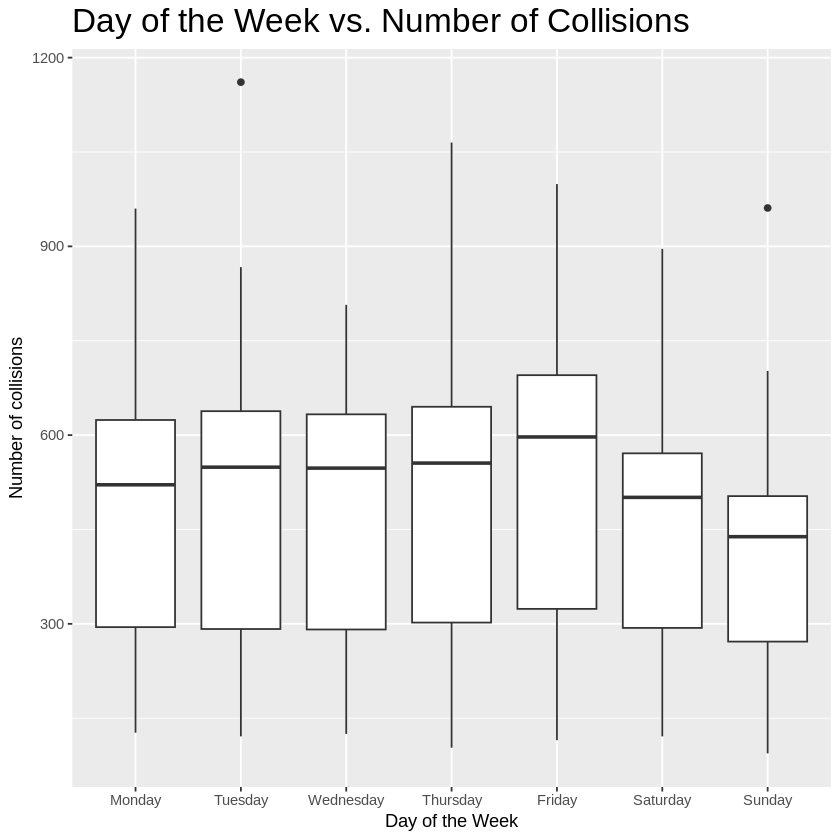

In [44]:
#day is a categorical variable where 1=Monday, etc.
#go back to the df created to recode the fog variable
#change day from an integer to a character variable
ls2$day <- as.character(ls2$day)
#recode the day variable using fct_recode() from the forcats package so that the numbers are days of the week
ls2$day <- fct_recode(ls2$day,
    "Monday" = "1",
    "Tuesday" = "2",
    "Wednesday" = "3",
    "Thursday" = "4",
    "Friday" = "5",
    "Saturday" = "6",
    "Sunday" = "7")

# plot Day of the Week vs Number of Collisions
ggplot(ls2, aes(x = day, y = NUM_COLLISIONS)) +
  #create a boxplot
  geom_boxplot()+
  #add title
  ggtitle("Day of the Week vs. Number of Collisions") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Day of the Week", y = "Number of collisions")


In [45]:
#gather basic statistical information about the data to determine suitability for the ANOVA test
ls2 %>%
#group data by day of the week
group_by(day) %>%
 # find the count, mean, and standard deviation for number of collisions per day of the week
summarise(n = n(), mean = mean(NUM_COLLISIONS), sd = sd(NUM_COLLISIONS))

#perform an ANOVA test on the data to show if there is a significant difference in number of collisions per day of week
aov_test <- aov(NUM_COLLISIONS ~ day, data = ls2)
# use tidy from the broom package to show the p-value. if less than 0.05 there is a significant difference
tidy(aov_test)

#ANOVA test p-value less than 0.05 shows significant difference
#use Tukey test to find out which pairs have a significant difference
TukeyHSD(aov_test)

day       n   mean     sd      
1 Monday    636 475.3459 176.1120
2 Tuesday   636 489.9261 182.3877
3 Wednesday 636 486.5487 176.9069
4 Thursday  636 497.3066 184.6957
5 Friday    636 530.2940 194.6438
6 Saturday  635 449.6236 148.2013
7 Sunday    636 400.8176 127.2847

term      df   sumsq     meansq     statistic p.value     
1 day          6   6394240 1065706.63 36.25695  4.171407e-43
2 Residuals 4444 130623250   29393.17       NA            NA

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = NUM_COLLISIONS ~ day, data = ls2)

$day
                          diff         lwr         upr     p adj
Tuesday-Monday       14.580189  -13.778356   42.938733 0.7349767
Wednesday-Monday     11.202830  -17.155714   39.561375 0.9071201
Thursday-Monday      21.960692   -6.397853   50.319236 0.2517862
Friday-Monday        54.948113   26.589569   83.306658 0.0000003
Saturday-Monday     -25.722290  -54.091997    2.647417 0.1049911
Sunday-Monday       -74.528302 -102.886847  -46.169757 0.0000000
Wednesday-Tuesday    -3.377358  -31.735903   24.981186 0.9998516
Thursday-Tuesday      7.380503  -20.978041   35.739048 0.9879423
Friday-Tuesday       40.367925   12.009380   68.726469 0.0005445
Saturday-Tuesday    -40.302479  -68.672186  -11.932771 0.0005647
Sunday-Tuesday      -89.108491 -117.467035  -60.749946 0.0000000
Thursday-Wednesday   10.757862  -17.600683   39.116406 0.9225036
Friday-Wednesday    

**Total Number of Collisions by Day of Week**

The trend of the number of collisions increasing from Monday to Friday and then declining over the weekend is further illustrated by examining the total number of collisions by day of week. The total number of collisions on each day of the week was calculated for 2012-2024 and plotted on a bar graph. The total number of collisions appear to increase Mon.-Fri. before declining Sat.-Sun.

day       total 
1 Monday    302320
2 Tuesday   311593
3 Wednesday 309445
4 Thursday  316287
5 Friday    337267
6 Saturday  285511
7 Sunday    254920

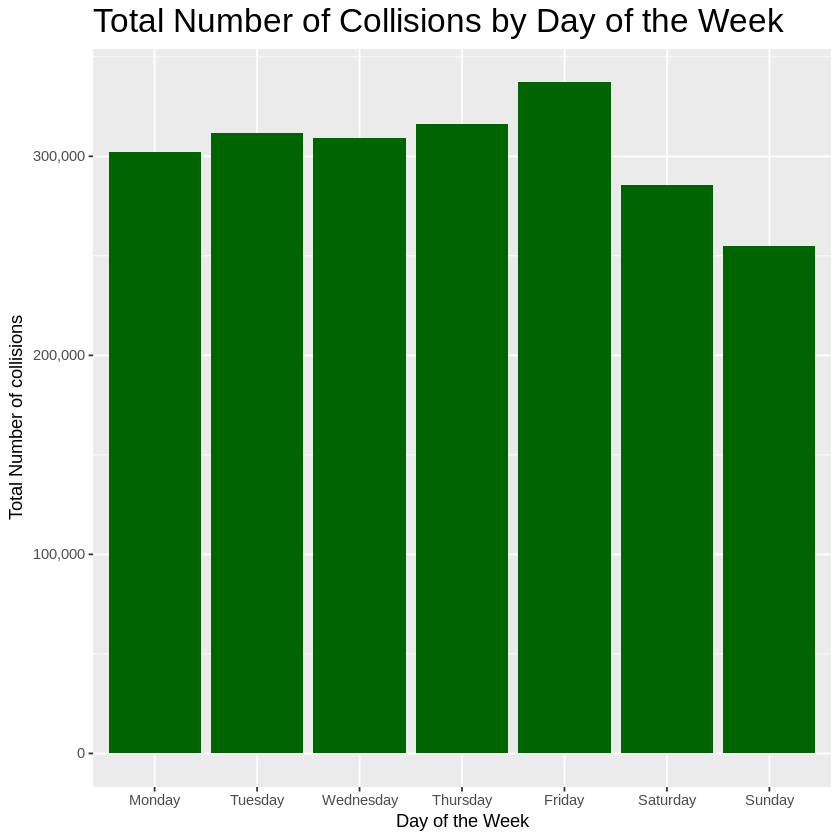

In [46]:
#calculate total number of collisions by day of week
ls3 <- ls2 %>%
  #use select to take the day and number of collisions columns only
  select(day, NUM_COLLISIONS) %>%
    #group the data by day of week
  group_by(day) %>%
    #create a total column that adds up the number of collisions occurring on each day of the week
  summarize(total = sum(NUM_COLLISIONS))

ls3

# create a plot of Total Number of Collisions by Day of the Week
ggplot(ls3, aes(x = day, y = total)) +
  #create a barplot - use geom_col since counts are already defined
  geom_col(fill = "darkgreen") +
  #add title
  ggtitle("Total Number of Collisions by Day of the Week") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Day of the Week", y = "Total Number of collisions") +
        #change the scale so it's not in scientific notation
        scale_y_continuous(labels = scales::comma)

**Number of Collisions by Date**

The plot depicts the number of collisions by date from 2012 to 2024. It exhibits an undulating pattern, with the number of collisions generally around 600 per day from 2012 to 2020. In 2020, there is a huge drop in the number of collisions, roughly coinciding with the COVID-19 pandemic. The number of collisions then increases through 2020 before resuming the undulating pattern. The undulating pattern continues through 2024; however, the number of collisions is now closer to 300 per day.

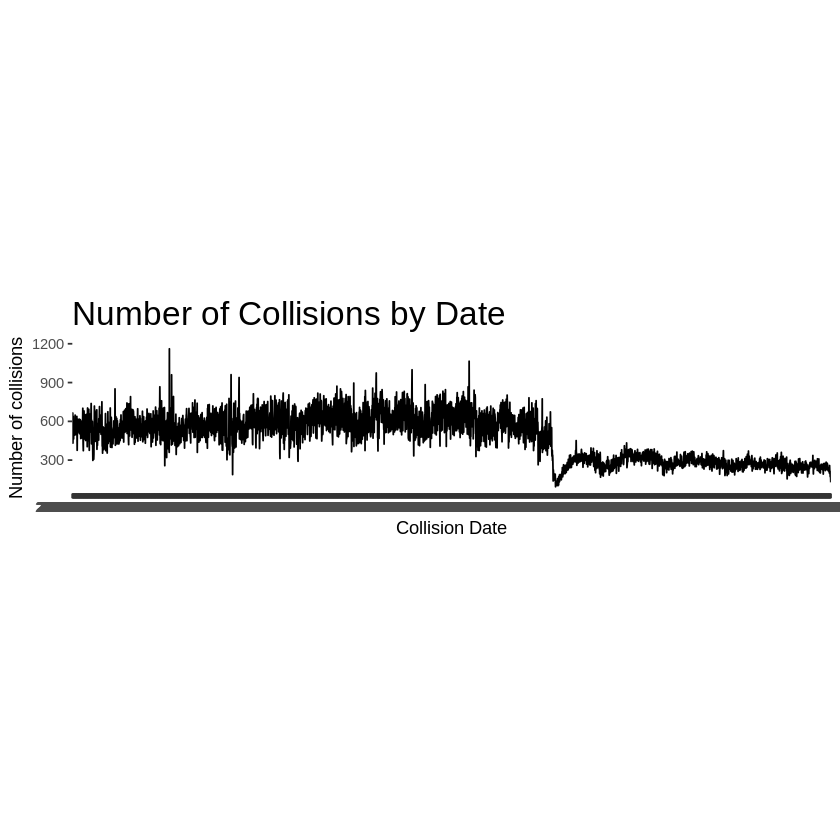

In [47]:
# plot Date vs Number of Collisions
ggplot(ls1, aes(x = collision_date, y = NUM_COLLISIONS, group=1)) +
  #use geom_line() to create a line plot
  geom_line() +
  theme(aspect.ratio = 0.2) +
  #add title
  ggtitle("Number of Collisions by Date") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Collision Date", y = "Number of collisions")

**Number of Collisions, 2020**

Taking a closer look at the 2020 data further illustrates the significant drop in the number of collisions occurring in March 2020. The drop coincides with the implementation of a lockdown in NYC due to the COVID-19 pandemic (Adcroft and Toor, 2021). As the year progresses, the number of collisions gradually increases and resumes the undulating pattern, but never fully recovers.

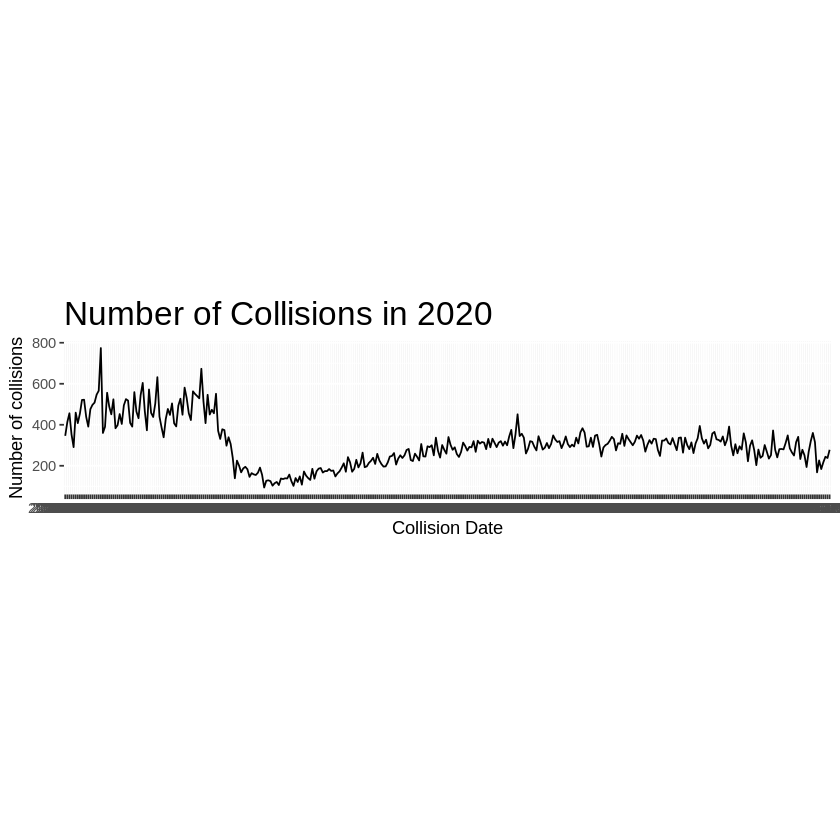

In [48]:
# plot Number of Collisions for 2020 only
ggplot(data=subset(ls1, (year==2020)), aes(x = collision_date, y = NUM_COLLISIONS, group=1)) +
  #use geom_line() to create a line plot
  geom_line() +
  theme(aspect.ratio = 0.2) +
  #add title
  ggtitle("Number of Collisions in 2020") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Collision Date", y = "Number of collisions")

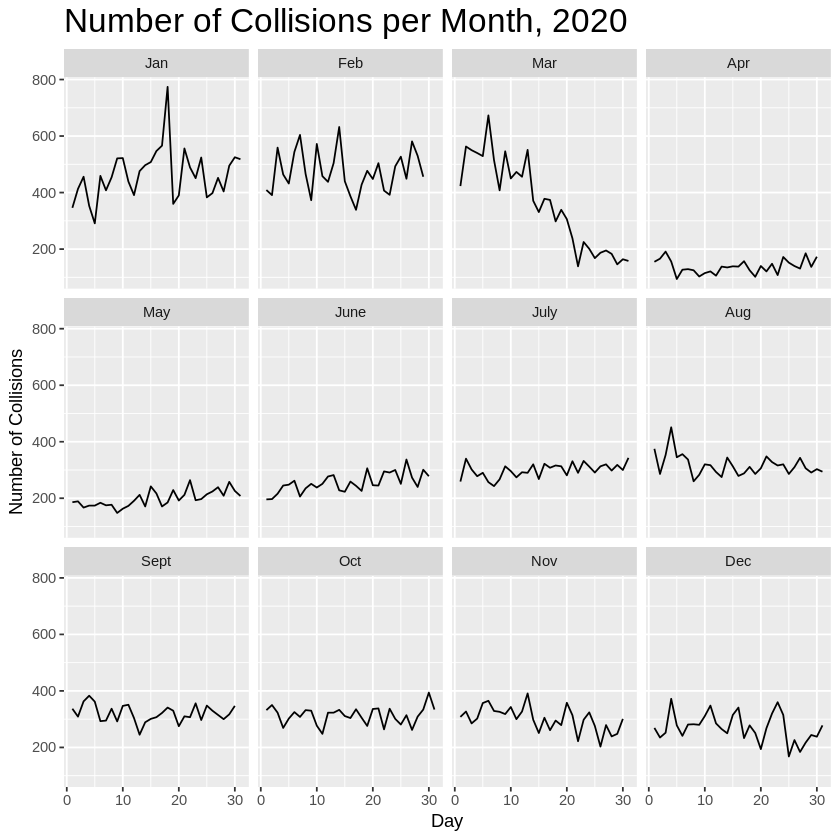

In [49]:
# plot Number of Collisions in 2020 by month

#create a month character variable from the mo integer variable
ls2$month <- as.character(ls2$mo)
#recode the month variable using fct_recode() so that the numbers are month names
ls2$month <- fct_recode(ls2$month,
    "Jan" = "1",
    "Feb" = "2",
    "Mar" = "3",
    "Apr" = "4",
    "May" = "5",
    "June" = "6",
    "July" = "7",
    "Aug" = "8",
    "Sept" = "9",
    "Oct" = "10",
    "Nov" = "11",
    "Dec" = "12")

#filter the data to include 2020 only
ls2 %>%
  filter(year==2020) %>%
  #plot da on the x axis and number of collisions on the y
  ggplot(aes(x = da,
             y = NUM_COLLISIONS)) +
  # plot a line graph
  geom_line() +
    #add axis labels and title
  labs(x = "Day",
       y = "Number of Collisions",
       title = "Number of Collisions per Month, 2020") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
  #use facet_wrap to split the data by the previously created month variable; turn month into a factor so they appear in chronological order
  facet_wrap(~factor(month, c("Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec")))

**Number of Collisions, 2019 vs. 2024**

Comparing the 2019 and 2024 data shows that even though the number of collisions never regains the pre-2020 figures, the undulating pattern has resumed. When we look the data on a monthly level, certain trends emerge. Drops in the number of collisions tend to coincide with weekends and public holidays. For example, drops can be seen around Labor Day (1st Monday in Sept.), Memorial Day (last Monday of May), and 4th of July. Even though the number of collisions never recovers, the pattern remains very similar.

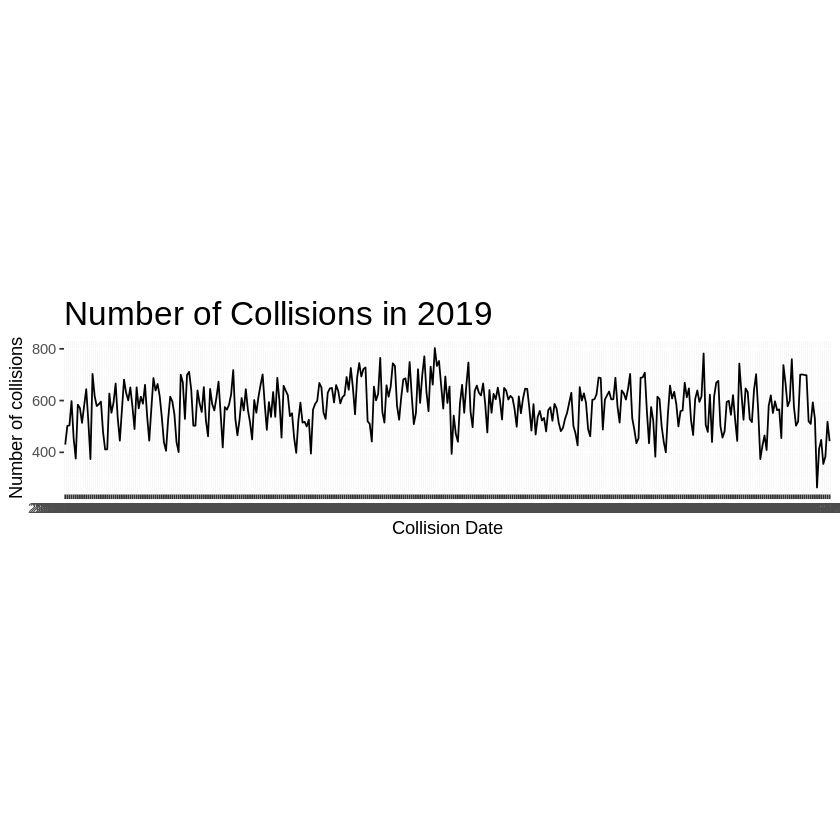

In [50]:
# plot Number of Collisions in 2019 only
ggplot(data=subset(ls1, (year==2019)), aes(x = collision_date, y = NUM_COLLISIONS, group=1)) +
  #use geom_line() to create a line plot
  geom_line() +
  theme(aspect.ratio = 0.2) +
  #add title
  ggtitle("Number of Collisions in 2019") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Collision Date", y = "Number of collisions")

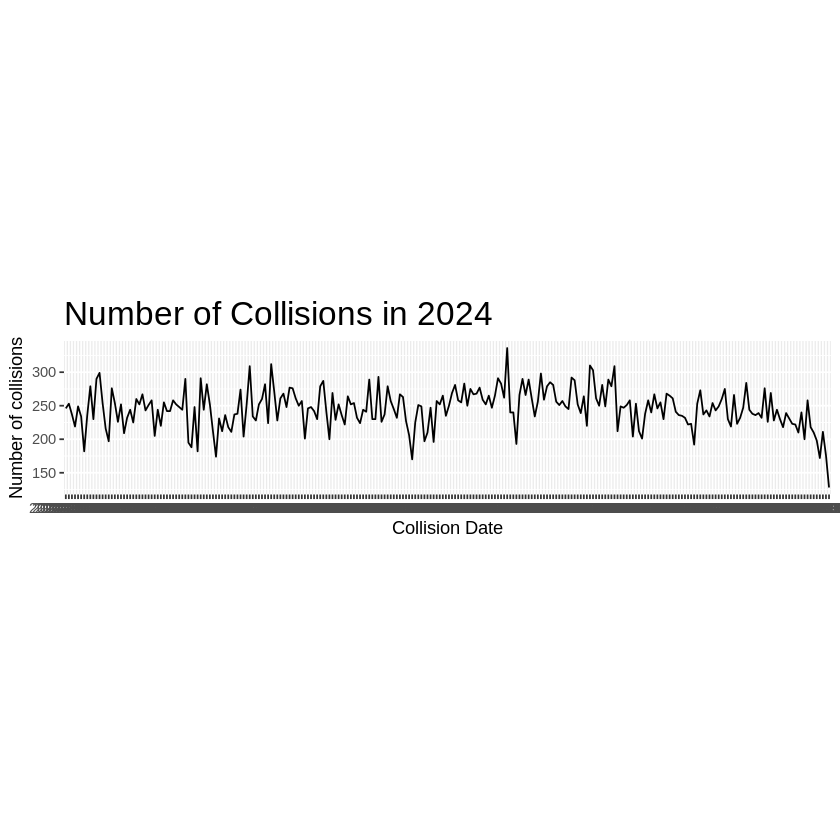

In [51]:
# plot Number of Collisions in 2024 only
ggplot(data=subset(ls1, (year==2024)), aes(x = collision_date, y = NUM_COLLISIONS, group=1)) +
  #use geom_line() to create a line plot
  geom_line() +
  theme(aspect.ratio = 0.2) +
  #add title
  ggtitle("Number of Collisions in 2024") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Collision Date", y = "Number of collisions")

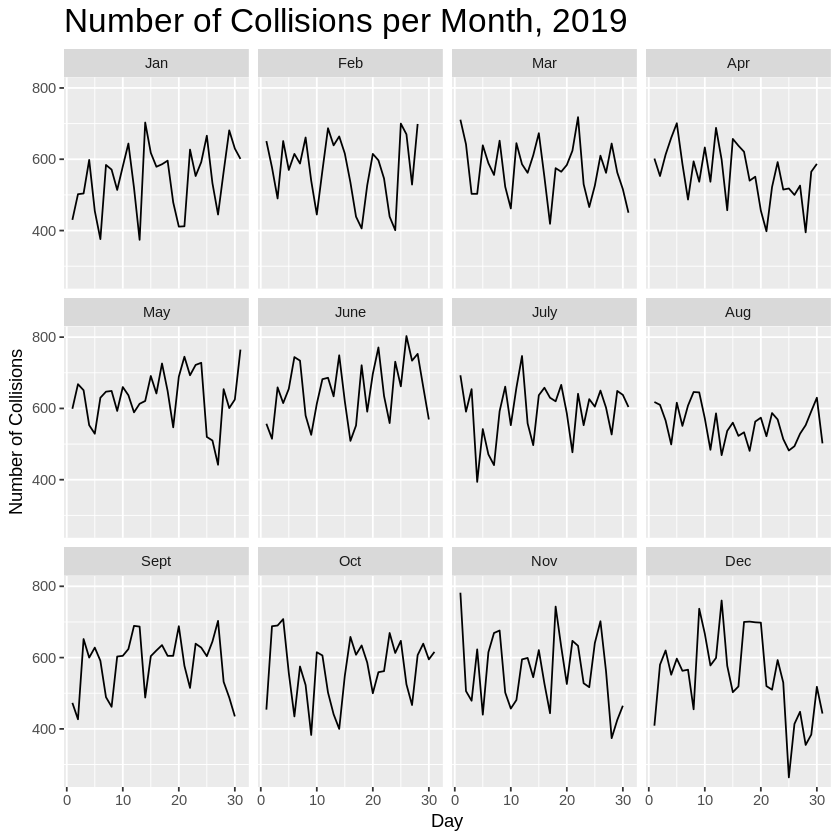

In [52]:
# plot Number of Collisions in 2019 by month

#filter the data to include 2019 only
ls2 %>%
  filter(year==2019) %>%
  #plot da on the x axis and number of collisions on the y
  ggplot(aes(x = da,
             y = NUM_COLLISIONS)) +
  # plot a line graph
  geom_line() +
    #add axis labels and title
  labs(x = "Day",
       y = "Number of Collisions",
       title = "Number of Collisions per Month, 2019") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
  #use facet_wrap to split the data by month; turn month into a factor so they appear in chronological order
  facet_wrap(~factor(month, c("Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec")))

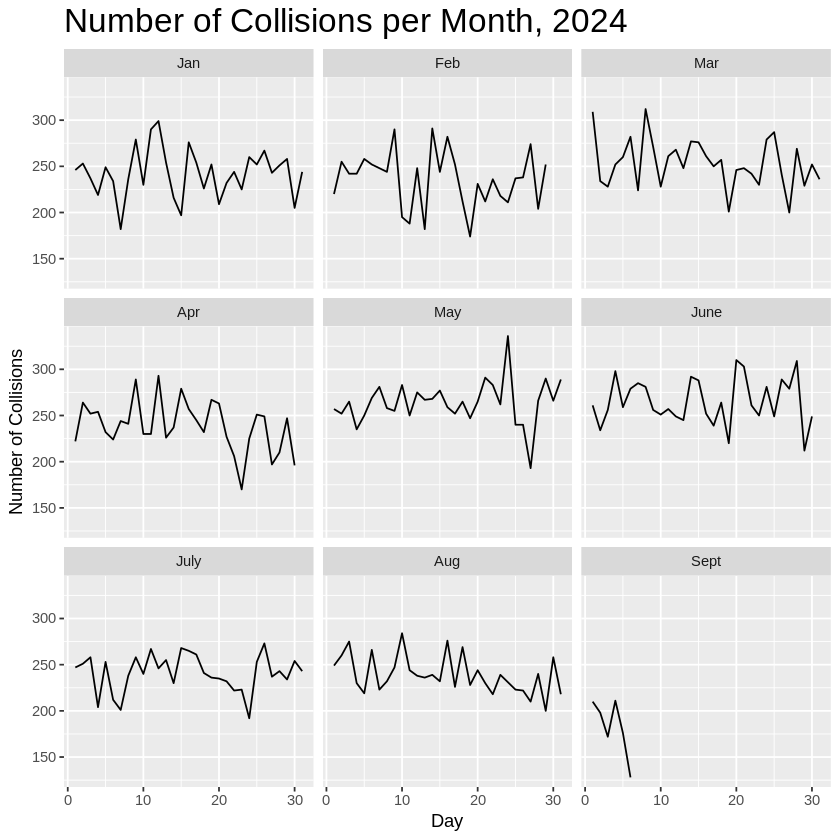

In [53]:
# plot Number of Collisions in 2024 by month

#filter the data to include 2024 only
ls2 %>%
  filter(year==2024) %>%
  #plot da on the x axis and number of collisions on the y
  ggplot(aes(x = da,
             y = NUM_COLLISIONS)) +
  # plot a line graph
  geom_line() +
    #add axis labels and title
  labs(x = "Day",
       y = "Number of Collisions",
       title = "Number of Collisions per Month, 2024") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
  #use facet_wrap to split the data by the previously created month variable; turn month into a factor so they appear in chronological order
  facet_wrap(~factor(month, c("Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec")))

**Weather and Number of Collisions, 2022**

Now that we know more about the variability in number of collisions by date, it may be useful to revisit the relationship between weather and number of collisions by looking at a subset of data that is relatively stable. The 2022 data was selected as it does not show too many extremes in number of collisions nor weather variables. Recalculating the correlations between the weather variables and number of collisions on 2022 data reveals stronger positive correlations for dewpoint, fog, and mean, maximum, and minimum temperature. It also shows stronger negative correlations for mean wind speed, maximum sustained wind speed, and maximum wind gust. I also tried plotting and calculating correlations for the logs of variables with skewed distributions (visib, wdsp, mxpsd, gust, prcp), but this did not greatly improve the results.

       X             day             year            mo               da       
 Min.   :  25   Min.   :1.000   Min.   :2022   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:1134   1st Qu.:2.000   1st Qu.:2022   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :2374   Median :4.000   Median :2022   Median : 7.000   Median :16.00  
 Mean   :2267   Mean   :4.005   Mean   :2022   Mean   : 6.526   Mean   :15.72  
 3rd Qu.:3366   3rd Qu.:6.000   3rd Qu.:2022   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :4410   Max.   :7.000   Max.   :2022   Max.   :12.000   Max.   :31.00  
                                                                               
    collision_date      temp            dewp            slp        
 2022-01-01:  1    Min.   :20.40   Min.   : 1.00   Min.   : 998.2  
 2022-01-02:  1    1st Qu.:45.20   1st Qu.:34.50   1st Qu.:1012.8  
 2022-01-03:  1    Median :54.70   Median :47.80   Median :1016.7  
 2022-01-04:  1    Mean   :54.88   Mean   :47.04   Mean   :1017.1  
 2022-01-05:  1    3

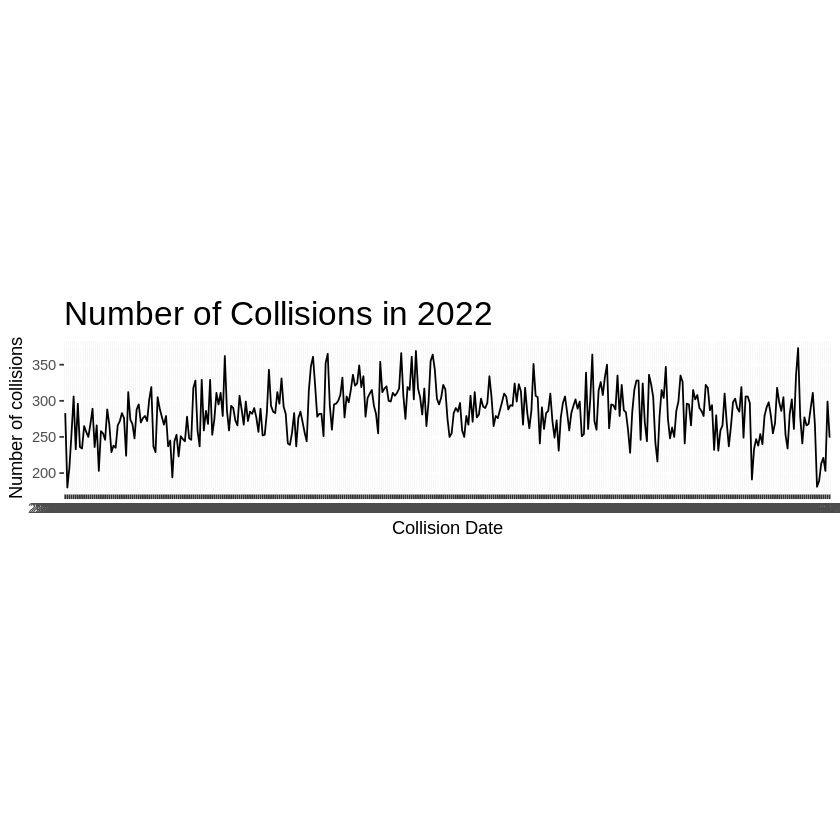

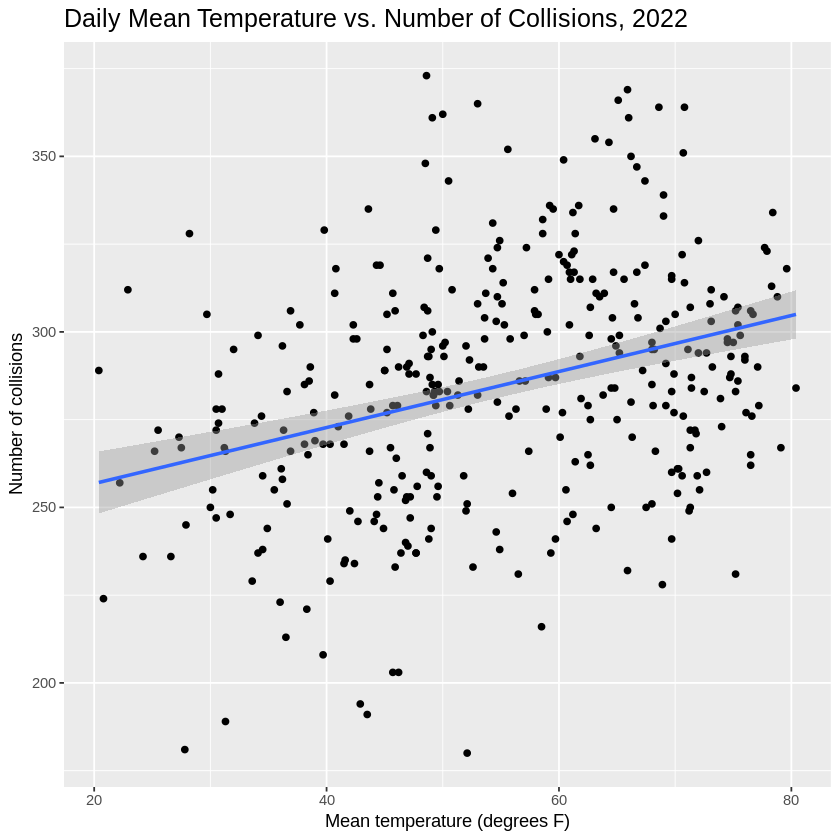

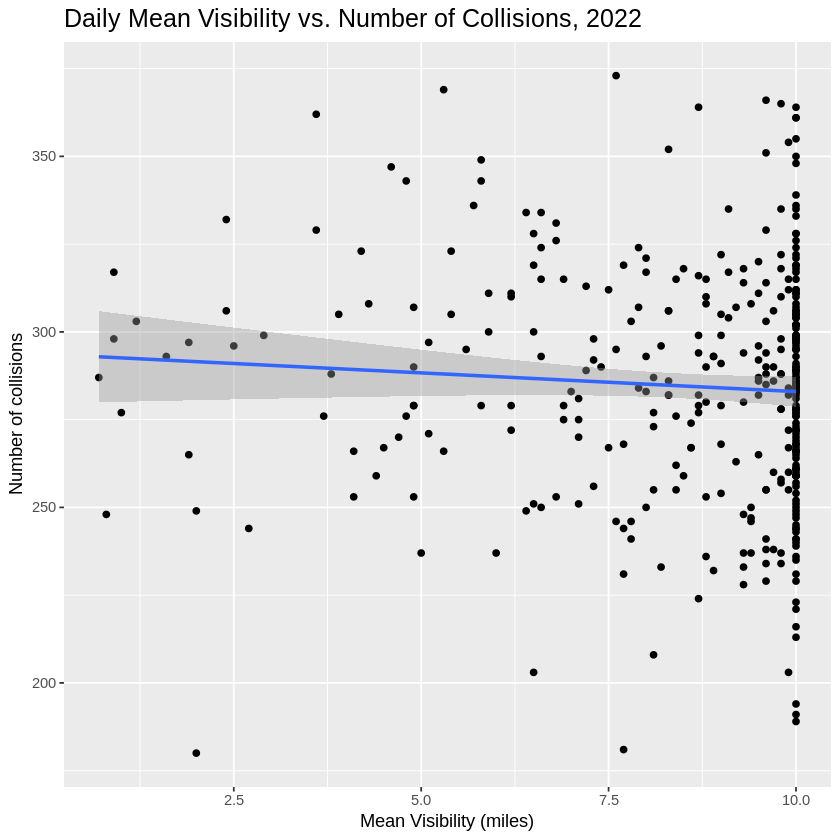

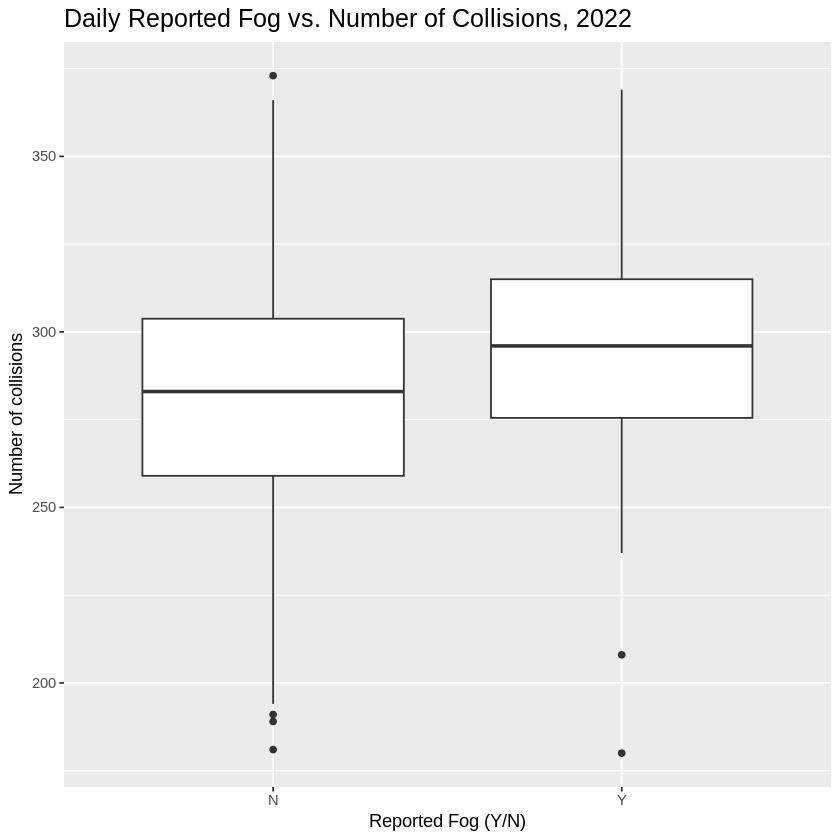

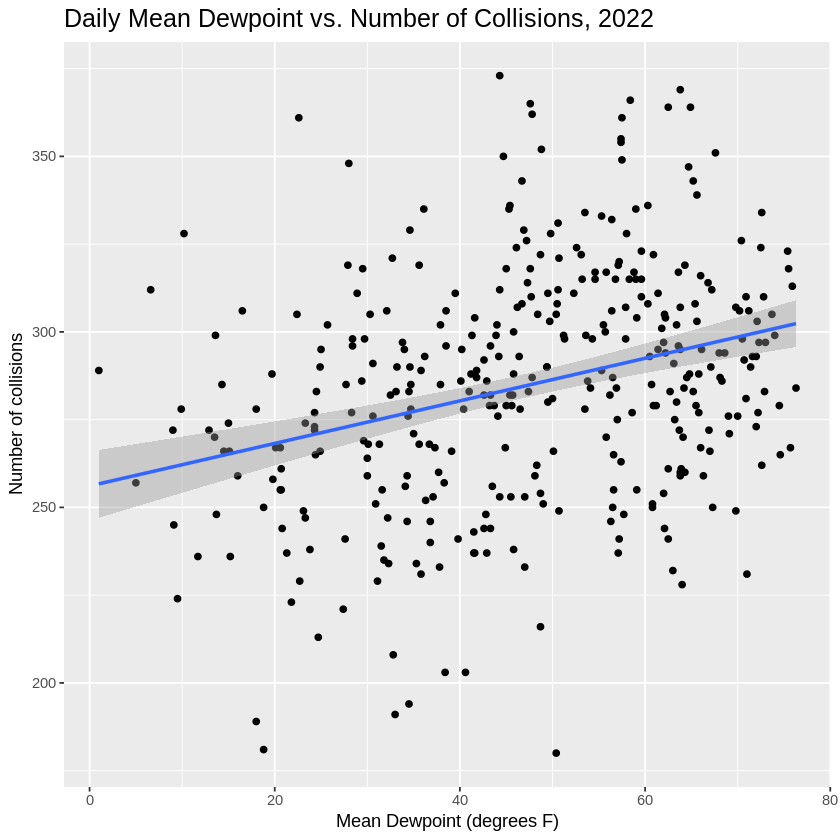

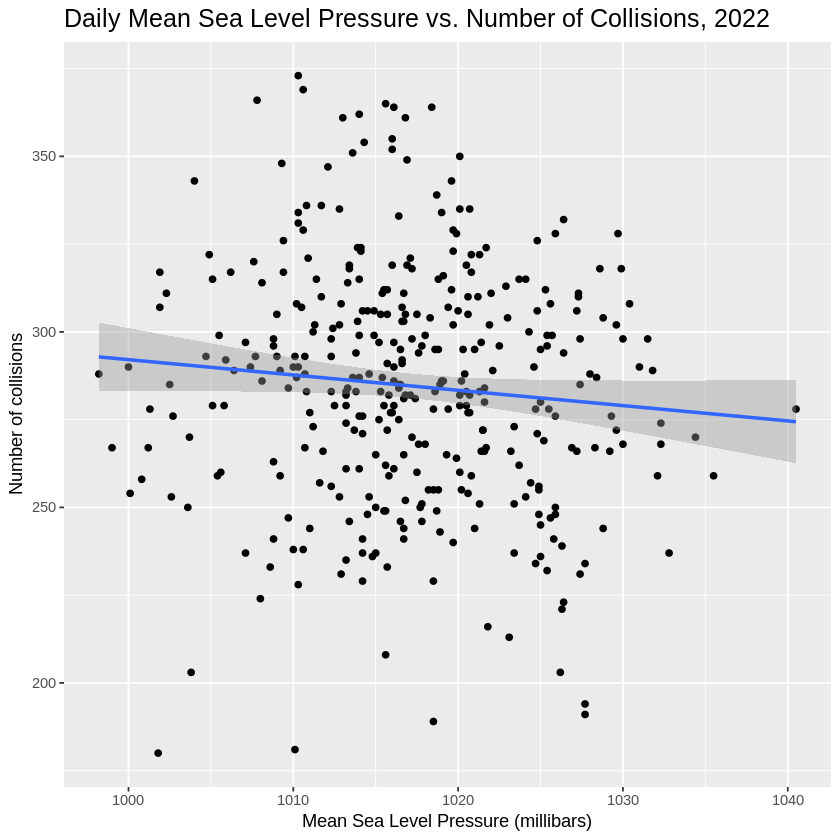

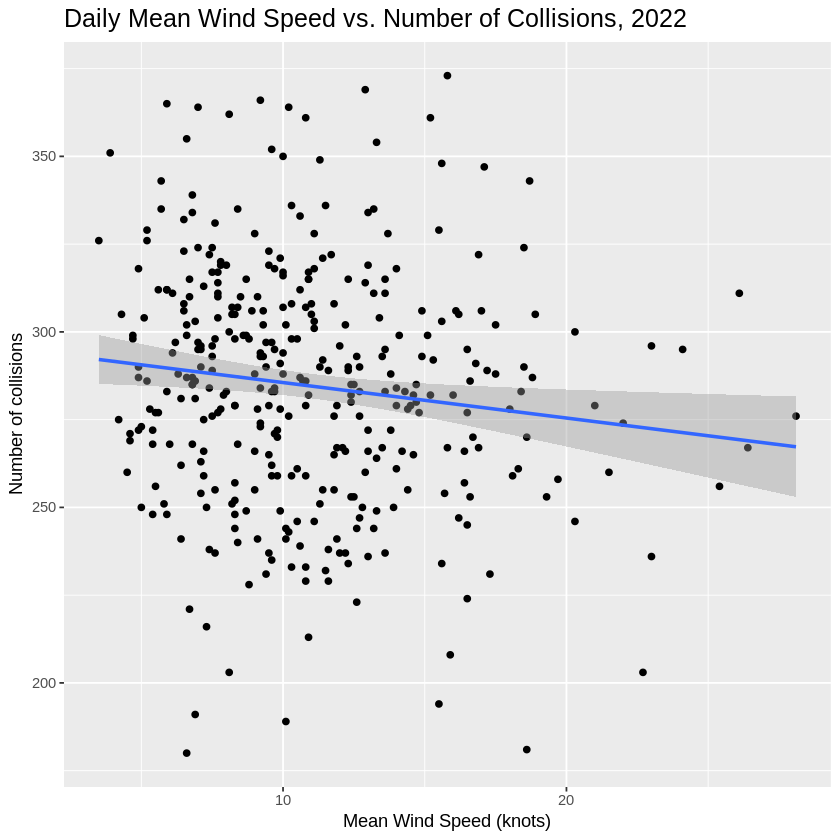

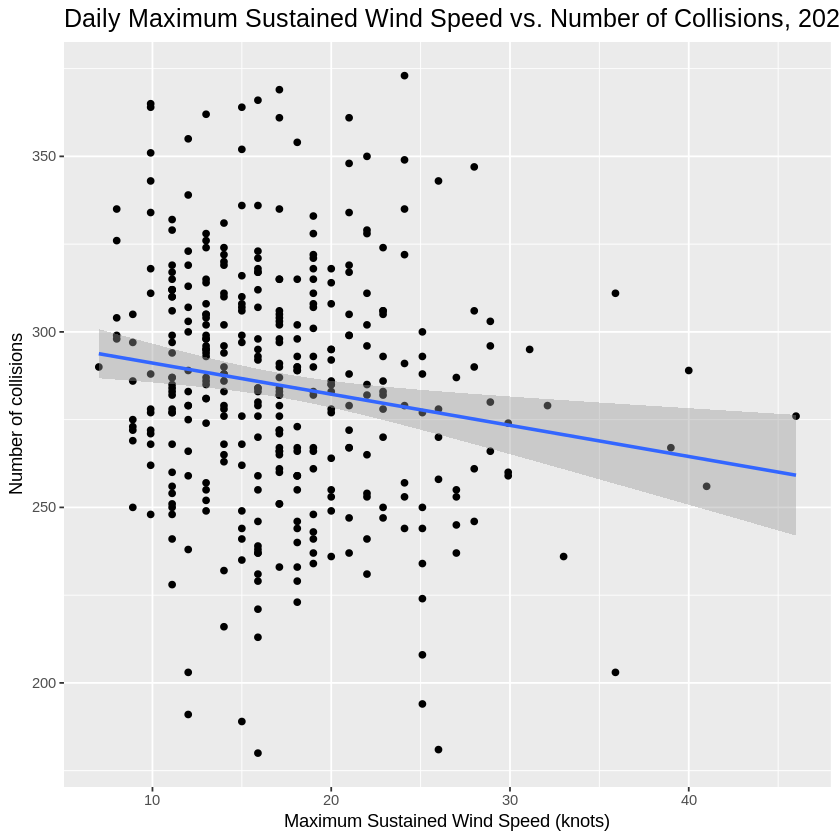

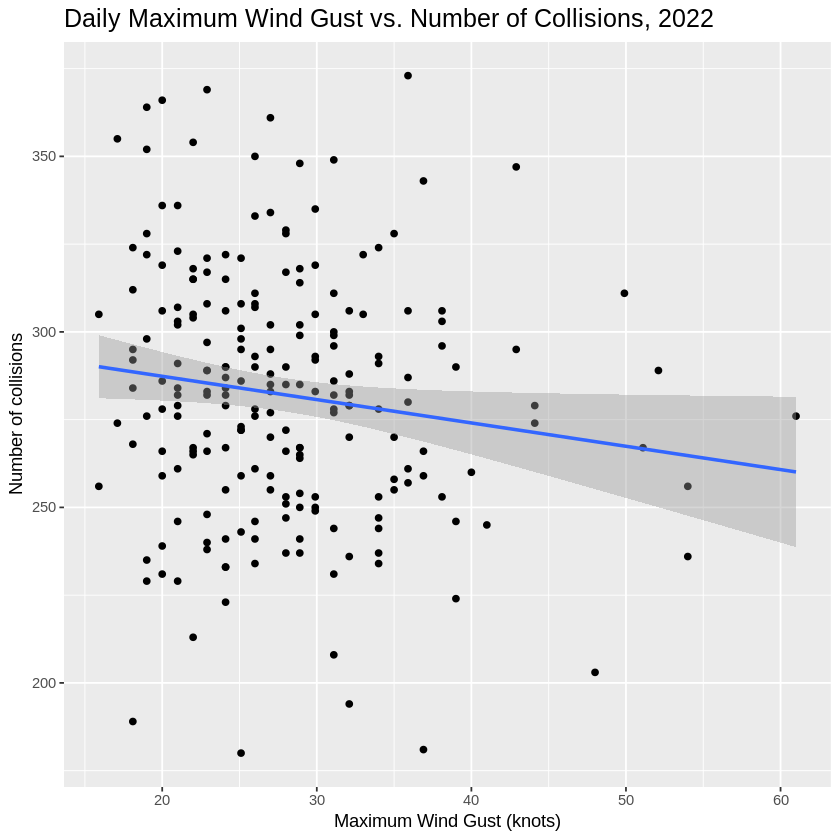

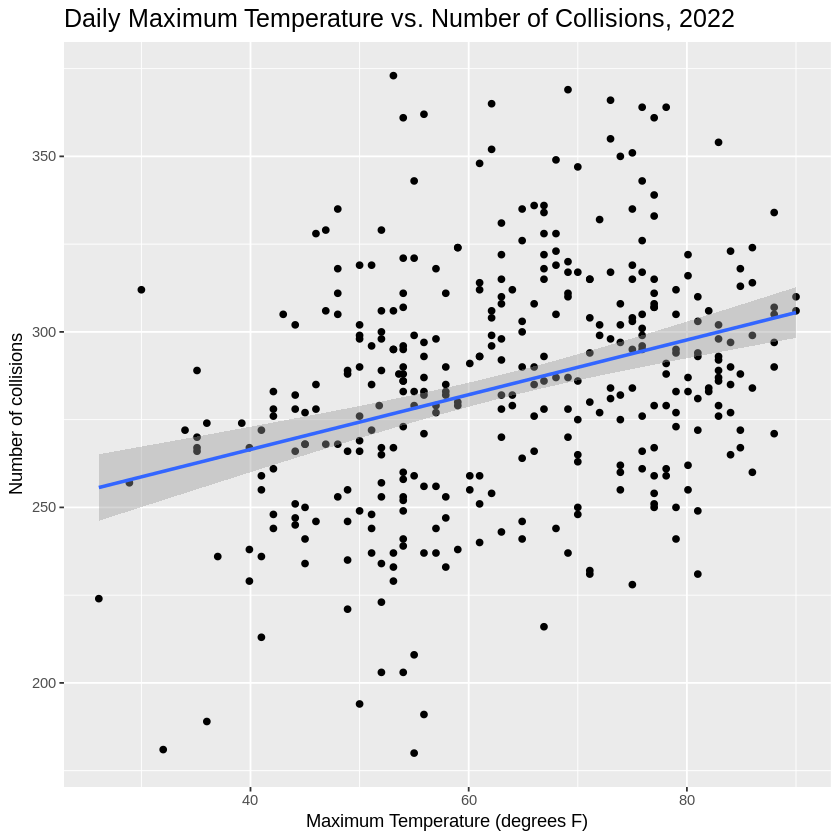

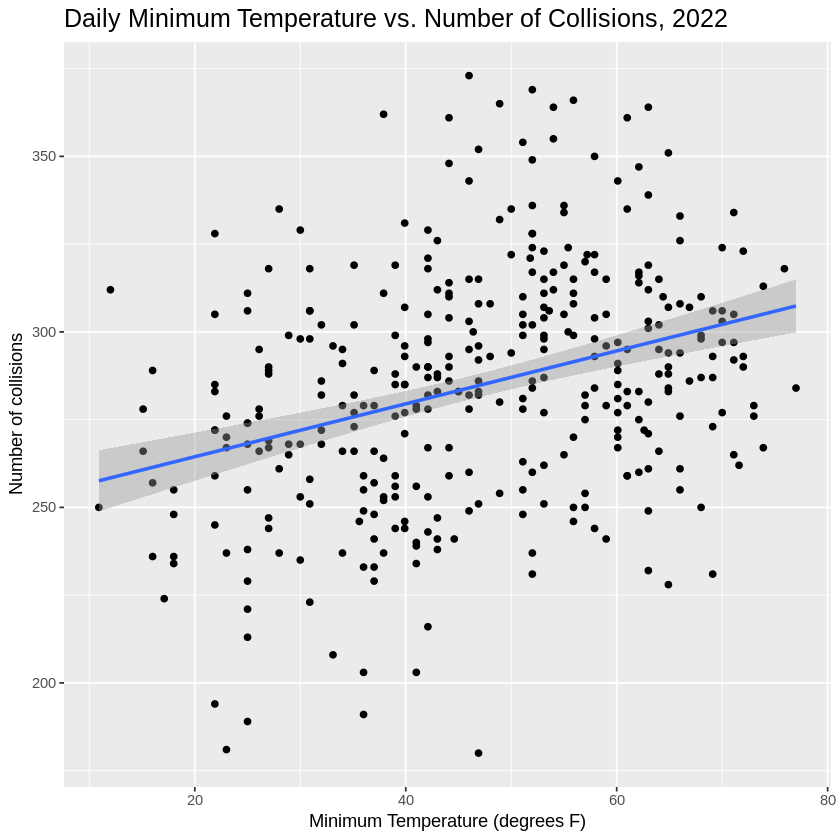

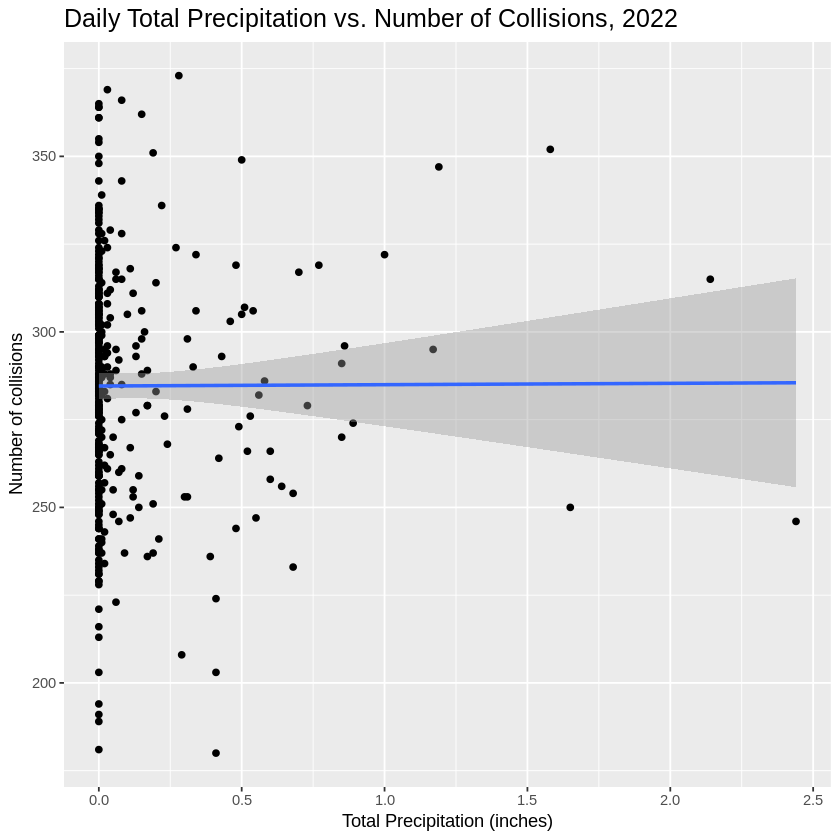

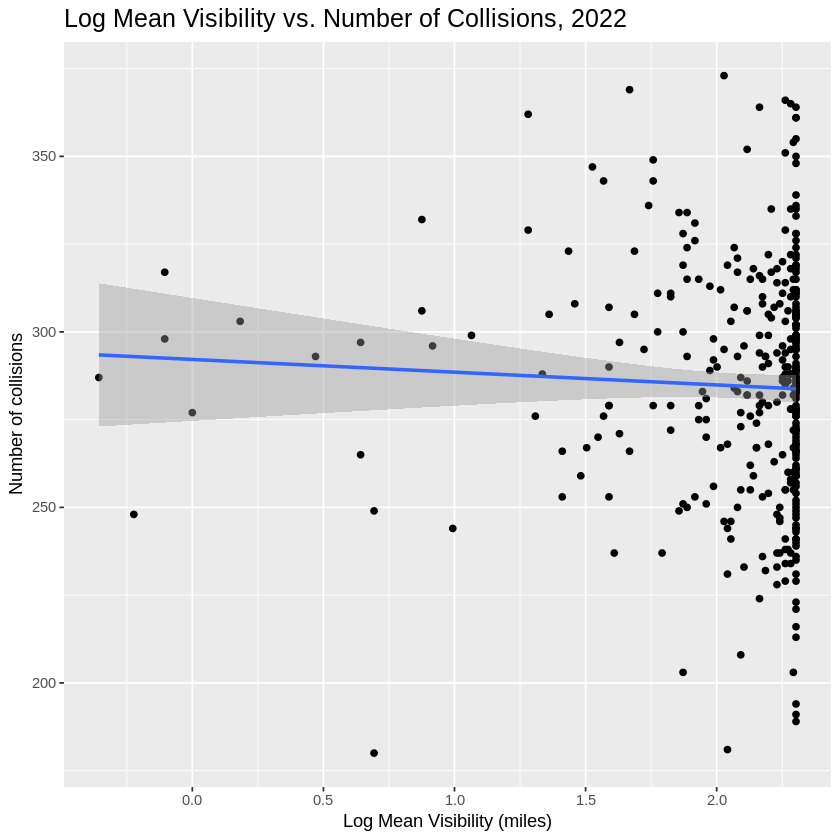

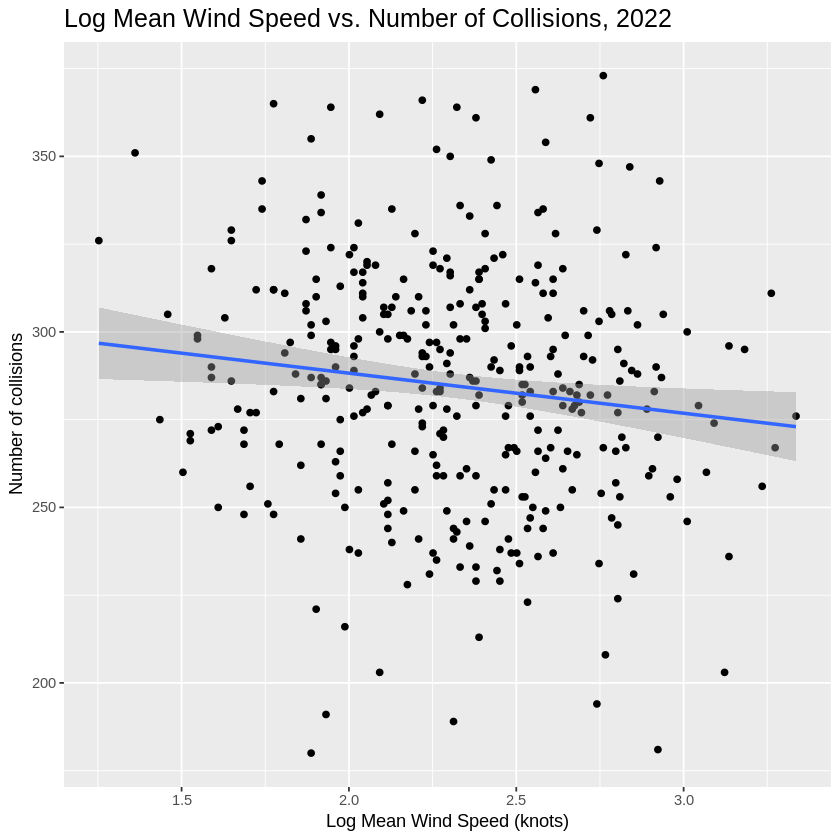

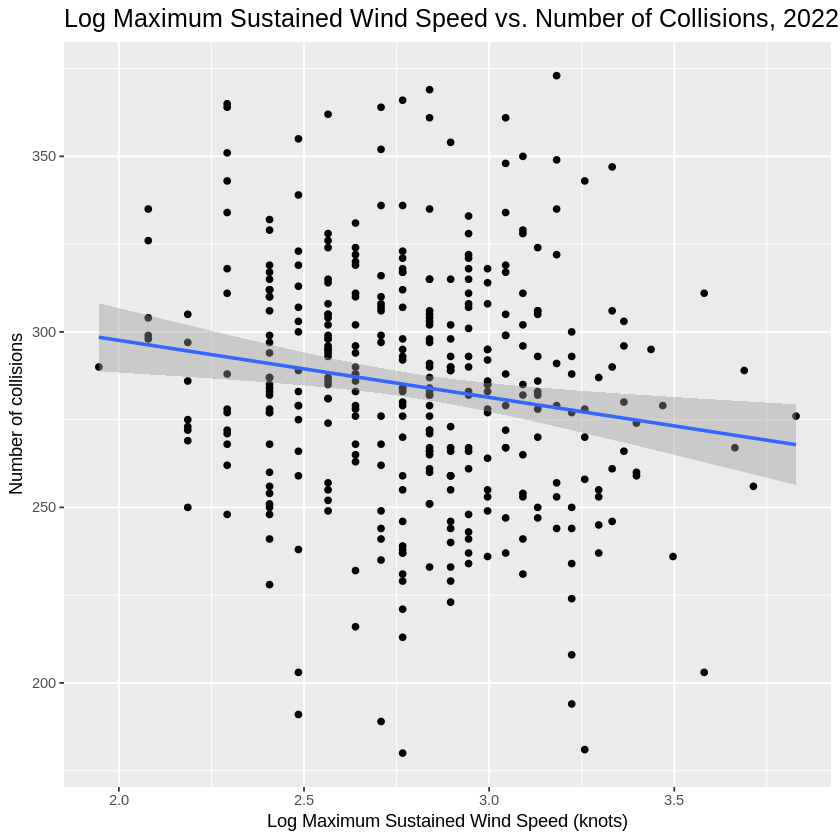

Warning message:
“Removed 220 rows containing non-finite outside the scale range
(`stat_smooth()`).”


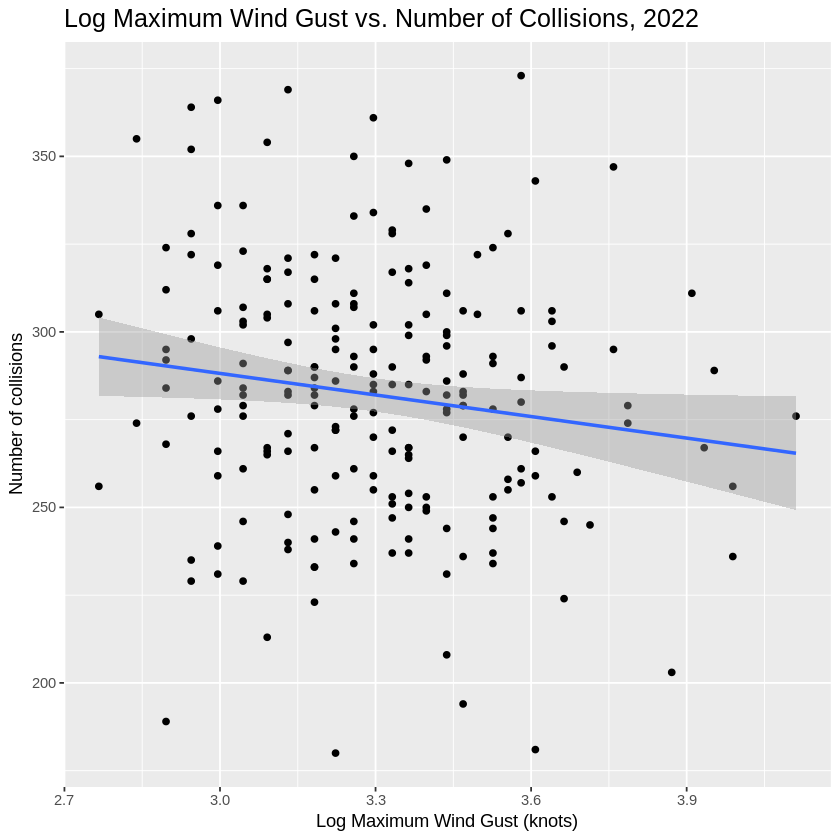

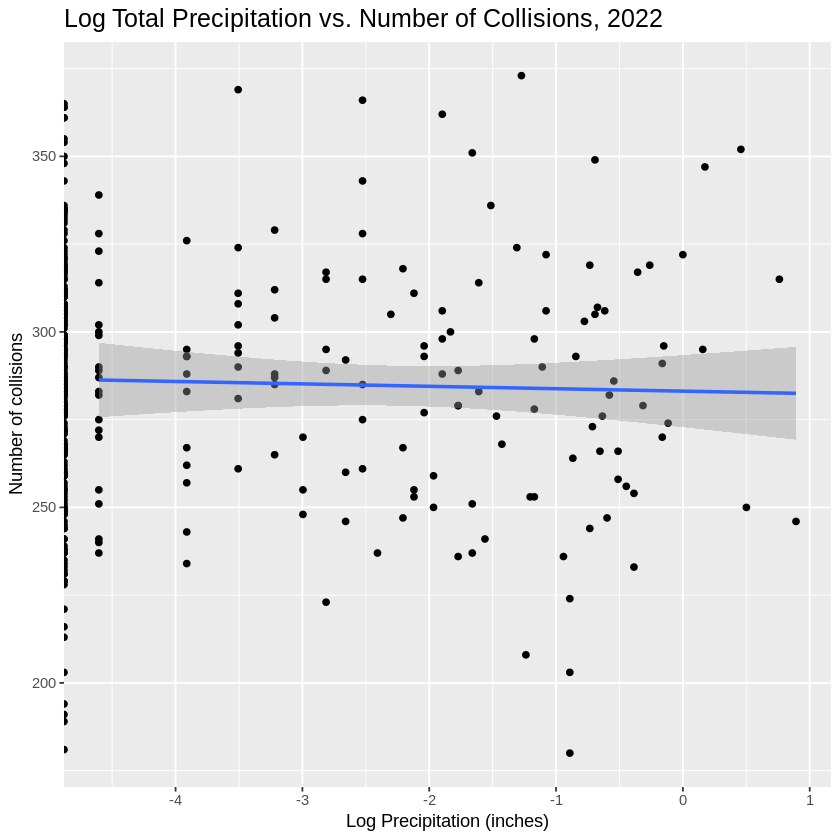

In [54]:
#create a subset of the weather and collision data to include data from year 2022 only
s2 <- subset(ls1, (year==2022))

#use summary to get basic stats
summary(s2)

# plot Number of Collisions in 2022 only
ggplot(s2, aes(x = collision_date, y = NUM_COLLISIONS, group=1)) +
  #use geom_line() to create a line plot
  geom_line() +
  theme(aspect.ratio = 0.2) +
  #add title
  ggtitle("Number of Collisions in 2022") +
  #increase title font size
    theme(plot.title = element_text(size = 20)) +
      #change axis lables
      labs(x = "Collision Date", y = "Number of collisions")

# use ggplot to plot Mean Temperature vs Number of Collisions
# exclude data where temp is NA
ggplot(data=subset(s2, !is.na(temp)), aes(x = temp, y = NUM_COLLISIONS)) +
  #use geom_point() to create a scatterplot
  geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
    #add title
  ggtitle("Daily Mean Temperature vs. Number of Collisions, 2022") +
    #increase title font size
    theme(plot.title = element_text(size = 15)) +
      #change axis lables
      labs(x = "Mean temperature (degrees F)", y = "Number of collisions")

# plot Mean Visibility vs Number of Collisions
# exclude data where visibility is NA
ggplot(data=subset(s2, !is.na(visib)), aes(x = visib, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
  ggtitle("Daily Mean Visibility vs. Number of Collisions, 2022") +
 #increase title font size
theme(plot.title = element_text(size = 15)) +
#change axis lables
 labs(x = "Mean Visibility (miles)", y = "Number of collisions")

#fog is a ordinal variable; 0 means N/not reported and 1 means Yes
#create a copy of the dataframe
s3 <- s2
#change fog from an integer to a character variable
s3$fog <- as.character(s3$fog)
#recode the fog variable using fct_recode() from the forcats package so that zero is N and one is Y
s3$fog <- fct_recode(s3$fog,
    "N" = "0",
    "Y" = "1")
# plot Recorded Fog vs Number of Collisions
ggplot(s3, aes(x = fog, y = NUM_COLLISIONS)) +
 #create a boxplot
 geom_boxplot()+
 #add title
 ggtitle("Daily Reported Fog vs. Number of Collisions, 2022") +
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
#change axis lables
labs(x = "Reported Fog (Y/N)", y = "Number of collisions")

# plot Mean Dewpoint vs Number of Collisions
# exclude data where Dewpoint is NA
ggplot(data=subset(s2, !is.na(dewp)), aes(x = dewp, y = NUM_COLLISIONS)) +
 #use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Daily Mean Dewpoint vs. Number of Collisions, 2022") +
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
#change axis lables
 labs(x = "Mean Dewpoint (degrees F)", y = "Number of collisions")

# plot Mean Sea Level Pressure vs Number of Collisions
# exclude data where slp is NA
ggplot(data=subset(s2, !is.na(slp)), aes(x = slp, y = NUM_COLLISIONS)) +
 #use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Daily Mean Sea Level Pressure vs. Number of Collisions, 2022") +
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
 #change axis lables
labs(x = "Mean Sea Level Pressure (millibars)", y = "Number of collisions")

# plot Mean Wind Speed vs Number of Collisions
# exclude data where wdsp is NA
ggplot(data=subset(s2, !is.na(wdsp)), aes(x = wdsp, y = NUM_COLLISIONS)) +
 #use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Daily Mean Wind Speed vs. Number of Collisions, 2022") +
#increase title font size
 theme(plot.title = element_text(size = 15)) +
 #change axis lables
 labs(x = "Mean Wind Speed (knots)", y = "Number of collisions")

# plot Maximum sustained wind speed vs Number of Collisions
# exclude data where mxpsd is NA
ggplot(data=subset(s2, !is.na(mxpsd)), aes(x = mxpsd, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Daily Maximum Sustained Wind Speed vs. Number of Collisions, 2022") +
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
 #change axis lables
 labs(x = "Maximum Sustained Wind Speed (knots)", y = "Number of collisions")

# plot Maximum wind gust vs Number of Collisions
# exclude data where gust is NA
ggplot(data=subset(s2, !is.na(gust)), aes(x = gust, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Daily Maximum Wind Gust vs. Number of Collisions, 2022") +
 #increase title font size
theme(plot.title = element_text(size = 15)) +
 #change axis lables
labs(x = "Maximum Wind Gust (knots)", y = "Number of collisions")

# plot Maximum temperature vs Number of Collisions
# exclude data where max is NA
ggplot(data=subset(s2, !is.na(max)), aes(x = max, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Daily Maximum Temperature vs. Number of Collisions, 2022")+
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
 #change axis lables
 labs(x = "Maximum Temperature (degrees F)", y = "Number of collisions")

# plot Minimum temperature vs Number of Collisions
# exclude data where min is NA
ggplot(data=subset(s2, !is.na(min)), aes(x = min, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Daily Minimum Temperature vs. Number of Collisions, 2022") +
 #increase title font size
theme(plot.title = element_text(size = 15)) +
 #change axis lables
 labs(x = "Minimum Temperature (degrees F)", y = "Number of collisions")

# plot Total precipitation vs Number of Collisions
# exclude data where prcp is NA
ggplot(data=subset(s2, !is.na(prcp)), aes(x = prcp, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Daily Total Precipitation vs. Number of Collisions, 2022") +
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
 labs(x = "Total Precipitation (inches)", y = "Number of collisions")



# plot Log Mean Visibility vs Number of Collisions
# exclude NA
ggplot(data=subset(s2, !is.na(visib_log)), aes(x = visib_log, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Log Mean Visibility vs. Number of Collisions, 2022") +
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
 labs(x = "Log Mean Visibility (miles)", y = "Number of collisions")

# plot Log Mean Wind Speed vs Number of Collisions
# excludes NA
ggplot(data=subset(s2, !is.na(wdsp_log)), aes(x = wdsp_log, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Log Mean Wind Speed vs. Number of Collisions, 2022") +
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
 labs(x = "Log Mean Wind Speed (knots)", y = "Number of collisions")

# plot Log Max sustained wind speed vs Number of Collisions
# exclude NA
ggplot(data=subset(s2, !is.na(mxpsd_log)), aes(x = mxpsd_log, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Log Maximum Sustained Wind Speed vs. Number of Collisions, 2022") +
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
 labs(x = "Log Maximum Sustained Wind Speed (knots)", y = "Number of collisions")

# plot Log Max Wind gust vs Number of Collisions
# exclude  NA
ggplot(data=subset(s2, !is.na(gust_log)), aes(x = gust_log, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Log Maximum Wind Gust vs. Number of Collisions, 2022") +
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
 labs(x = "Log Maximum Wind Gust (knots)", y = "Number of collisions")

# plot Log Total precipitation vs Number of Collisions
# exclude data where prcp is NA
ggplot(data=subset(s2, !is.na(prcp_log)), aes(x = prcp_log, y = NUM_COLLISIONS)) +
#use geom_point() to create a scatterplot
 geom_point() +
    #add best fit line
  stat_smooth(method = "lm",
              formula = y ~ x,
              geom = "smooth") +
 #add title
 ggtitle("Log Total Precipitation vs. Number of Collisions, 2022") +
 #increase title font size
 theme(plot.title = element_text(size = 15)) +
 labs(x = "Log Precipitation (inches)", y = "Number of collisions")

In [55]:
#calculate the correlation between each weather variable and number of collisions
m1 <- cor(s2$temp, s2$NUM_COLLISIONS, use='complete.obs')
m2 <- cor(s2$slp, s2$NUM_COLLISIONS, use='complete.obs')
m3 <- cor(s2$dewp, s2$NUM_COLLISIONS, use='complete.obs')
m4 <- cor(s2$prcp, s2$NUM_COLLISIONS, use='complete.obs')
m5 <- cor(s2$wdsp, s2$NUM_COLLISIONS, use='complete.obs')
m6 <- cor(s2$gust, s2$NUM_COLLISIONS, use='complete.obs')
m7 <- cor(s2$visib, s2$NUM_COLLISIONS, use='complete.obs')
m8 <- cor(s2$mxpsd, s2$NUM_COLLISIONS, use='complete.obs')
m9 <- cor(s2$max, s2$NUM_COLLISIONS, use='complete.obs')
m10 <- cor(s2$min, s2$NUM_COLLISIONS, use='complete.obs')
m11 <- cor(s2$fog, s2$NUM_COLLISIONS, method = "spearman")

m12 <- cor(s2$visib_log, s2$NUM_COLLISIONS, use='complete.obs')
m13 <- cor(s2$wdsp_log, s2$NUM_COLLISIONS, use='complete.obs')
m14 <- cor(s2$mxpsd_log, s2$NUM_COLLISIONS, use='complete.obs')
m15 <- cor(s2$gust_log, s2$NUM_COLLISIONS, use='complete.obs')
m16 <- cor(s2$prcp_log, s2$NUM_COLLISIONS, use='complete.obs')

#print the correlations
paste("Correlation between Mean Temperature and Number of Collisions: ", m1)
paste("Correlation between Mean Sea Level Pressure and Number of Collisions: ", m2)
paste("Correlation between Mean Dewpoint and Number of Collisions: ", m3)
paste("Correlation between Total Precipitation and Number of Collisions: ", m4)
paste("Correlation between Mean Wind Speed and Number of Collisions: ", m5)
paste("Correlation between Maximum Wind Gust and Number of Collisions: ", m6)
paste("Correlation between Mean Visibility and Number of Collisions: ", m7)
paste("Correlation between Maximum Sustained Wind Speed and Number of Collisions: ", m8)
paste("Correlation between Maximum Temperature and Number of Collisions: ", m9)
paste("Correlation between Minimum Temperature and Number of Collisions: ", m10)
paste("Correlation between Reported Fog and Number of Collisions: ", m11)

paste("Correlation between Log Mean Visibility and Number of Collisions: ", m12)
paste("Correlation between Log Mean Wind Speed and Number of Collisions: ", m13)
paste("Correlation between Log Maximum Sustained Wind Speed and Number of Collisions: ", m14)
paste("Correlation between Log Maximum Wind Gust and Number of Collisions: ", m15)
paste("Correlation between Log Total Precipitation and Number of Collisions: ", m16)

[1] "Correlation between Mean Temperature and Number of Collisions:  0.328362589479669"

[1] "Correlation between Mean Sea Level Pressure and Number of Collisions:  -0.0927237395770909"

[1] "Correlation between Mean Dewpoint and Number of Collisions:  0.303612576994128"

[1] "Correlation between Total Precipitation and Number of Collisions:  0.00309373536885183"

[1] "Correlation between Mean Wind Speed and Number of Collisions:  -0.127856298966728"

[1] "Correlation between Maximum Wind Gust and Number of Collisions:  -0.139925243047422"

[1] "Correlation between Mean Visibility and Number of Collisions:  -0.0683078612150886"

[1] "Correlation between Maximum Sustained Wind Speed and Number of Collisions:  -0.154124237742237"

[1] "Correlation between Maximum Temperature and Number of Collisions:  0.319167637551992"

[1] "Correlation between Minimum Temperature and Number of Collisions:  0.327682672305068"

[1] "Correlation between Reported Fog and Number of Collisions:  0.162983221056091"

[1] "Correlation between Log Mean Visibility and Number of Collisions:  -0.0452724059036318"

[1] "Correlation between Log Mean Wind Speed and Number of Collisions:  -0.129703812232899"

[1] "Correlation between Log Maximum Sustained Wind Speed and Number of Collisions:  -0.155756424369827"

[1] "Correlation between Log Maximum Wind Gust and Number of Collisions:  -0.143038352939947"

[1] "Correlation between Log Total Precipitation and Number of Collisions:  NaN"

####Linear Regression
I attempted to fit a linear model to the collated weather-collision data. Only the temp, dewp, visib, wdsp, mxpsd, gust, prcp, and day variables were significant as all others had a p-value > 0.05. Removing any of these variables failed to increase the adjusted R2 value, therefore this remains the best fitting model. Note that at -499.13 and 650.85, the residuals are not perfectly normally distributed and at 35.22, the mean is not that close to zero. Therefore, a linear model may not be the best fit for the data and other models should be considered. I tried using the log of variables with skewed distributions (visib, wdsp, mxpsd, gust - prcp excluded due to NaN value), but this did not improve adjusted R2. I also tried excluding the 2020 data, since it does not fit the usual pattern, but arrived at the same model.


In [56]:
#fit a linear model to the data with number of collisions as the dependent variable and independent variables temp + dewp + slp + visib + wdsp + mxpsd + gust + max + min + prcp + fog+ day
results <- lm(NUM_COLLISIONS~temp + dewp + slp + visib + wdsp + mxpsd + gust + max + min + prcp + fog+ day, ls1)

#print the result
summary(results)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + slp + visib + wdsp + 
    mxpsd + gust + max + min + prcp + fog + day, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-492.10 -169.94   33.31  134.53  650.71 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -212.07456  479.91846  -0.442 0.658599    
temp           3.53851    1.77955   1.988 0.046864 *  
dewp          -3.48055    0.91145  -3.819 0.000137 ***
slp            0.83110    0.46617   1.783 0.074730 .  
visib        -13.11383    2.75029  -4.768 1.96e-06 ***
wdsp          -3.87554    1.38601  -2.796 0.005208 ** 
mxpsd          5.62161    1.98357   2.834 0.004630 ** 
gust          -4.01731    1.31114  -3.064 0.002206 ** 
max            0.21077    0.96560   0.218 0.827232    
min           -0.07054    0.88762  -0.079 0.936663    
prcp          32.79541   10.53492   3.113 0.001871 ** 
fog            4.11017   11.58457   0.355 0.722770    
day          -10.42603    1.66291  -6.270 

In [57]:
#fit a linear model to the data with number of collisions as the dependent variable and independent variables temp + dewp + slp + visib_log + wdsp_log + mxpsd_log + gust_log + max + min + prcp + fog+ day
results0 <- lm(NUM_COLLISIONS~temp + dewp + slp + visib_log + wdsp_log + mxpsd_log + gust_log + max + min + prcp + fog+ day, ls1)

#print the result
summary(results0)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + slp + visib_log + 
    wdsp_log + mxpsd_log + gust_log + max + min + prcp + fog + 
    day, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-476.32 -171.86   34.94  135.26  647.61 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.006e+02  4.937e+02  -0.406  0.68460    
temp         2.218e+00  1.766e+00   1.256  0.20931    
dewp        -2.074e+00  8.535e-01  -2.430  0.01515 *  
slp          8.666e-01  4.657e-01   1.861  0.06289 .  
visib_log   -3.903e+01  1.342e+01  -2.908  0.00366 ** 
wdsp_log    -4.352e+01  1.463e+01  -2.974  0.00297 ** 
mxpsd_log    1.086e+02  3.852e+01   2.819  0.00486 ** 
gust_log    -9.942e+01  3.591e+01  -2.769  0.00567 ** 
max          5.571e-02  9.659e-01   0.058  0.95401    
min         -9.223e-03  8.872e-01  -0.010  0.99171    
prcp         3.399e+01  1.047e+01   3.246  0.00119 ** 
fog          1.993e+01  1.100e+01   1.811  0.07023 .  
day         -1.067e+0

In [58]:
#fit a linear model with insignificant variables removed
results1 <- lm(NUM_COLLISIONS~temp + dewp + visib + wdsp + mxpsd + gust + prcp + day, ls1)

#print the result
summary(results1)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + wdsp + mxpsd + 
    gust + prcp + day, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-499.13 -167.47   35.22  133.37  650.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 647.9325    30.7688  21.058  < 2e-16 ***
temp          3.7844     1.0067   3.759 0.000174 ***
dewp         -3.6754     0.8911  -4.125 3.82e-05 ***
visib       -13.3412     2.1808  -6.118 1.09e-09 ***
wdsp         -4.0611     1.3507  -3.007 0.002666 ** 
mxpsd         5.6853     1.9713   2.884 0.003957 ** 
gust         -4.2833     1.3007  -3.293 0.001004 ** 
prcp         30.4509    10.3656   2.938 0.003335 ** 
day         -10.3453     1.6598  -6.233 5.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 173.4 on 2709 degrees of freedom
  (1733 observations deleted due to missingness)
Multiple R-squared:  0.03882,	Adjusted R-squared:  0.03598 
F-statistic: 13.

In [59]:
#try removing remaining variables one by one to see if adjusted R2 increases
#remove day - gets worse
re1 <- lm(NUM_COLLISIONS~temp + dewp + visib + wdsp + mxpsd + gust + prcp, ls1)

#print the result
summary(re1)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + wdsp + mxpsd + 
    gust + prcp, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-466.60 -170.76   30.06  138.37  672.13 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 609.2142    30.3450  20.076  < 2e-16 ***
temp          3.8083     1.0137   3.757 0.000176 ***
dewp         -3.6963     0.8973  -4.120 3.91e-05 ***
visib       -13.4791     2.1958  -6.139 9.55e-10 ***
wdsp         -3.6605     1.3585  -2.694 0.007095 ** 
mxpsd         5.5338     1.9849   2.788 0.005340 ** 
gust         -4.4258     1.3095  -3.380 0.000736 ***
prcp         29.5017    10.4366   2.827 0.004737 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 174.7 on 2710 degrees of freedom
  (1733 observations deleted due to missingness)
Multiple R-squared:  0.02504,	Adjusted R-squared:  0.02252 
F-statistic: 9.942 on 7 and 2710 DF,  p-value: 2.607e-12


In [60]:
#remove prcp - gets worse
re2 <- lm(NUM_COLLISIONS~temp + dewp + visib + wdsp + mxpsd + gust + day, ls1)

#print the result
summary(re2)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + wdsp + mxpsd + 
    gust + day, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-496.12 -170.35   35.35  135.66  646.78 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 640.8512    30.5920  20.948  < 2e-16 ***
temp          3.5218     1.0053   3.503 0.000467 ***
dewp         -3.4036     0.8881  -3.833 0.000130 ***
visib       -13.7643     2.1620  -6.367 2.26e-10 ***
wdsp         -3.7770     1.3444  -2.809 0.004999 ** 
mxpsd         6.0885     1.9643   3.100 0.001958 ** 
gust         -4.1236     1.2961  -3.182 0.001482 ** 
day         -10.0477     1.6573  -6.063 1.52e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 173.6 on 2733 degrees of freedom
  (1710 observations deleted due to missingness)
Multiple R-squared:  0.03439,	Adjusted R-squared:  0.03192 
F-statistic: 13.91 on 7 and 2733 DF,  p-value: < 2.2e-16


In [61]:
#remove gust - gets worse
re3 <- lm(NUM_COLLISIONS~temp + dewp + visib + wdsp + mxpsd + prcp + day, ls1)

#print the result
summary(re3)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + wdsp + mxpsd + 
    prcp + day, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-439.94 -175.10   39.78  137.44  667.92 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 545.0116    22.4388  24.289  < 2e-16 ***
temp          3.4445     0.8078   4.264 2.05e-05 ***
dewp         -3.1052     0.7261  -4.277 1.94e-05 ***
visib        -6.1410     1.5806  -3.885 0.000104 ***
wdsp         -2.6519     1.1697  -2.267 0.023434 *  
mxpsd         0.3279     0.8745   0.375 0.707709    
prcp         36.7062     9.6511   3.803 0.000145 ***
day          -9.8846     1.3102  -7.544 5.50e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 173.6 on 4371 degrees of freedom
  (72 observations deleted due to missingness)
Multiple R-squared:  0.02213,	Adjusted R-squared:  0.02056 
F-statistic: 14.13 on 7 and 4371 DF,  p-value: < 2.2e-16


In [62]:
#remove mxpsd - gets worse
re4 <- lm(NUM_COLLISIONS~temp + dewp + visib + wdsp + gust + prcp + day, ls1)

#print the result
summary(re4)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + wdsp + gust + 
    prcp + day, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-488.07 -170.09   35.71  134.03  657.52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 662.4435    30.3956  21.794  < 2e-16 ***
temp          3.6578     1.0071   3.632 0.000287 ***
dewp         -3.5942     0.8918  -4.030 5.73e-05 ***
visib       -13.6142     2.1816  -6.240 5.05e-10 ***
wdsp         -2.6071     1.2548  -2.078 0.037826 *  
gust         -1.1669     0.7250  -1.610 0.107605    
prcp         31.4176    10.3742   3.028 0.002481 ** 
day         -10.2863     1.6619  -6.189 6.95e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 173.7 on 2710 degrees of freedom
  (1733 observations deleted due to missingness)
Multiple R-squared:  0.03587,	Adjusted R-squared:  0.03338 
F-statistic:  14.4 on 7 and 2710 DF,  p-value: < 2.2e-16


In [63]:
#remove wdsp - gets worse
re5 <- lm(NUM_COLLISIONS~temp + dewp + visib + mxpsd + gust + prcp + day, ls1)

#print the result
summary(re5)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + mxpsd + gust + 
    prcp + day, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-483.72 -170.85   37.61  133.01  655.49 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 647.0951    30.8132  21.001  < 2e-16 ***
temp          3.7654     1.0082   3.735 0.000192 ***
dewp         -3.6335     0.8923  -4.072 4.79e-05 ***
visib       -13.3944     2.1839  -6.133 9.87e-10 ***
mxpsd         3.4731     1.8315   1.896 0.058031 .  
gust         -4.5083     1.3005  -3.467 0.000535 ***
prcp         28.8698    10.3676   2.785 0.005396 ** 
day         -10.1079     1.6604  -6.088 1.31e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 173.7 on 2710 degrees of freedom
  (1733 observations deleted due to missingness)
Multiple R-squared:  0.03561,	Adjusted R-squared:  0.03312 
F-statistic:  14.3 on 7 and 2710 DF,  p-value: < 2.2e-16


In [64]:
#remove visib - gets worse
re6 <- lm(NUM_COLLISIONS~temp + dewp + wdsp + mxpsd + gust + prcp + day, ls1)

#print the result
summary(re6)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + wdsp + mxpsd + gust + 
    prcp + day, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-399.73 -175.84   38.26  134.14  660.78 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 542.7122    25.6837  21.131  < 2e-16 ***
temp          0.4350     0.8505   0.512 0.609033    
dewp         -0.2967     0.7039  -0.421 0.673481    
wdsp         -4.1281     1.3597  -3.036 0.002420 ** 
mxpsd         6.2089     1.9826   3.132 0.001757 ** 
gust         -3.9339     1.3081  -3.007 0.002660 ** 
prcp         37.3986    10.3722   3.606 0.000317 ***
day         -10.4484     1.6708  -6.253 4.65e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 174.6 on 2710 degrees of freedom
  (1733 observations deleted due to missingness)
Multiple R-squared:  0.02554,	Adjusted R-squared:  0.02303 
F-statistic: 10.15 on 7 and 2710 DF,  p-value: 1.357e-12


In [65]:
#remove dewp - gets worse
re7 <- lm(NUM_COLLISIONS~temp + visib + wdsp + mxpsd + gust + prcp + day, ls1)

#print the result
summary(re7)


Call:
lm(formula = NUM_COLLISIONS ~ temp + visib + wdsp + mxpsd + gust + 
    prcp + day, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-445.95 -171.21   37.28  134.19  655.76 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 644.7921    30.8420  20.906  < 2e-16 ***
temp         -0.2215     0.2652  -0.835  0.40356    
visib        -7.7870     1.7160  -4.538 5.93e-06 ***
wdsp         -3.9889     1.3542  -2.946  0.00325 ** 
mxpsd         5.4618     1.9753   2.765  0.00573 ** 
gust         -4.0172     1.3020  -3.085  0.00205 ** 
prcp         27.6447    10.3732   2.665  0.00774 ** 
day         -10.3494     1.6642  -6.219 5.78e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 173.9 on 2711 degrees of freedom
  (1732 observations deleted due to missingness)
Multiple R-squared:  0.03285,	Adjusted R-squared:  0.03035 
F-statistic: 13.15 on 7 and 2711 DF,  p-value: < 2.2e-16


In [66]:
#remove temp - gets worse
re8 <- lm(NUM_COLLISIONS~dewp + visib + wdsp + mxpsd + gust + prcp + day, ls1)

#print the result
summary(re8)


Call:
lm(formula = NUM_COLLISIONS ~ dewp + visib + wdsp + mxpsd + gust + 
    prcp + day, data = ls1)

Residuals:
    Min      1Q  Median      3Q     Max 
-454.89 -169.32   36.11  134.73  650.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 666.2184    30.4554  21.875  < 2e-16 ***
dewp         -0.4433     0.2346  -1.889  0.05893 .  
visib        -8.8828     1.8345  -4.842 1.36e-06 ***
wdsp         -4.0292     1.3539  -2.976  0.00295 ** 
mxpsd         5.3621     1.9742   2.716  0.00665 ** 
gust         -4.1148     1.3031  -3.158  0.00161 ** 
prcp         28.8086    10.3815   2.775  0.00556 ** 
day         -10.3691     1.6638  -6.232 5.32e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 173.9 on 2710 degrees of freedom
  (1733 observations deleted due to missingness)
Multiple R-squared:  0.03381,	Adjusted R-squared:  0.03131 
F-statistic: 13.55 on 7 and 2710 DF,  p-value: < 2.2e-16


In [67]:
#create a subset of the weather and collision data to exclude data from year 2020
ns2 <- subset(ls1, (year!=2020))

#try fitting a linear model to see if any difference
nts <- lm(NUM_COLLISIONS~temp + dewp + slp + visib + wdsp + mxpsd + gust + max + min + prcp + fog + day, ns2)

#print results
summary(nts)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + slp + visib + wdsp + 
    mxpsd + gust + max + min + prcp + fog + day, data = ns2)

Residuals:
    Min      1Q  Median      3Q     Max 
-373.03 -169.42   34.31  125.37  637.72 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -288.6346   490.9698  -0.588 0.556662    
temp           5.4767     1.8070   3.031 0.002464 ** 
dewp          -4.4021     0.9245  -4.762 2.03e-06 ***
slp            0.8870     0.4768   1.860 0.062986 .  
visib        -12.9750     2.7702  -4.684 2.97e-06 ***
wdsp          -3.0027     1.4054  -2.137 0.032732 *  
mxpsd          7.3669     2.0064   3.672 0.000246 ***
gust          -5.2073     1.3365  -3.896 0.000100 ***
max           -0.2646     0.9779  -0.271 0.786733    
min           -0.2243     0.8971  -0.250 0.802585    
prcp          31.4631    10.5706   2.976 0.002944 ** 
fog            8.2456    11.8058   0.698 0.484969    
day          -11.4042     1.6874  -6.759 1.73e-11 ***
-

In [68]:
#remove the insignificant variables
nts1 <- lm(NUM_COLLISIONS~temp + dewp + visib + wdsp + mxpsd + gust + prcp + day, ns2)

#print results
summary(nts1)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + wdsp + mxpsd + 
    gust + prcp + day, data = ns2)

Residuals:
    Min      1Q  Median      3Q     Max 
-368.95 -170.85   34.71  124.93  636.46 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  632.826     30.891  20.486  < 2e-16 ***
temp           5.035      1.023   4.922 9.14e-07 ***
dewp          -4.533      0.904  -5.015 5.68e-07 ***
visib        -13.816      2.190  -6.308 3.33e-10 ***
wdsp          -3.247      1.369  -2.371 0.017809 *  
mxpsd          7.460      1.995   3.739 0.000189 ***
gust          -5.505      1.326  -4.153 3.39e-05 ***
prcp          28.439     10.421   2.729 0.006398 ** 
day          -11.332      1.685  -6.726 2.16e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 168.7 on 2495 degrees of freedom
  (1581 observations deleted due to missingness)
Multiple R-squared:  0.04714,	Adjusted R-squared:  0.04409 
F-statistic: 15.

In [69]:
#try removing variables one by one to see if can increase adjusted R2/improve model
#remove day
ts1 <- lm(NUM_COLLISIONS~temp + dewp + visib + wdsp + mxpsd + gust + prcp, ns2)

#print results
summary(ts1)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + wdsp + mxpsd + 
    gust + prcp, data = ns2)

Residuals:
   Min     1Q Median     3Q    Max 
-383.3 -174.4   30.4  131.2  659.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 591.3270    30.5359  19.365  < 2e-16 ***
temp          5.0662     1.0321   4.909 9.77e-07 ***
dewp         -4.5656     0.9119  -5.006 5.93e-07 ***
visib       -14.0399     2.2092  -6.355 2.46e-10 ***
wdsp         -2.7227     1.3792  -1.974 0.048484 *  
mxpsd         7.2823     2.0129   3.618 0.000303 ***
gust         -5.7008     1.3371  -4.264 2.09e-05 ***
prcp         27.9870    10.5127   2.662 0.007813 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 170.2 on 2496 degrees of freedom
  (1581 observations deleted due to missingness)
Multiple R-squared:  0.02987,	Adjusted R-squared:  0.02715 
F-statistic: 10.98 on 7 and 2496 DF,  p-value: 1.001e-13


In [70]:
#try removing variables one by one to see if can increase adjusted R2/improve model
#remove prcp
ts2 <- lm(NUM_COLLISIONS~temp + dewp + visib + wdsp + mxpsd + gust + day, ns2)

#print results
summary(ts2)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + wdsp + mxpsd + 
    gust + day, data = ns2)

Residuals:
   Min     1Q Median     3Q    Max 
-367.2 -172.0   35.1  125.7  632.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 626.5499    30.7073  20.404  < 2e-16 ***
temp          4.8149     1.0225   4.709 2.62e-06 ***
dewp         -4.2975     0.9017  -4.766 1.98e-06 ***
visib       -14.2951     2.1720  -6.582 5.65e-11 ***
wdsp         -2.9924     1.3635  -2.195   0.0283 *  
mxpsd         7.8773     1.9881   3.962 7.63e-05 ***
gust         -5.3790     1.3215  -4.070 4.84e-05 ***
day         -11.0750     1.6831  -6.580 5.69e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 168.9 on 2516 degrees of freedom
  (1561 observations deleted due to missingness)
Multiple R-squared:  0.04293,	Adjusted R-squared:  0.04027 
F-statistic: 16.12 on 7 and 2516 DF,  p-value: < 2.2e-16


In [71]:
#try removing variables one by one to see if can increase adjusted R2/improve model
#remove gust
ts3 <- lm(NUM_COLLISIONS~temp + dewp + visib + wdsp + mxpsd + day + prcp, ns2)

#print results
summary(ts3)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + wdsp + mxpsd + 
    day + prcp, data = ns2)

Residuals:
    Min      1Q  Median      3Q     Max 
-372.75 -179.01   41.45  130.72  655.29 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 547.8289    22.9246  23.897  < 2e-16 ***
temp          4.3980     0.8265   5.321 1.09e-07 ***
dewp         -3.7715     0.7419  -5.084 3.87e-07 ***
visib        -7.2357     1.6182  -4.471 7.98e-06 ***
wdsp         -1.5888     1.1891  -1.336 0.181579    
mxpsd        -0.1006     0.8893  -0.113 0.909948    
day         -10.4020     1.3389  -7.769 9.99e-15 ***
prcp         34.6675     9.7521   3.555 0.000383 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 170 on 4011 degrees of freedom
  (66 observations deleted due to missingness)
Multiple R-squared:  0.02681,	Adjusted R-squared:  0.02511 
F-statistic: 15.79 on 7 and 4011 DF,  p-value: < 2.2e-16


In [72]:
#try removing variables one by one to see if can increase adjusted R2/improve model
#remove mxpsd
ts4 <- lm(NUM_COLLISIONS~temp + dewp + visib + wdsp + day + gust + prcp, ns2)

#print results
summary(ts4)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + wdsp + day + 
    gust + prcp, data = ns2)

Residuals:
    Min      1Q  Median      3Q     Max 
-376.14 -173.62   35.38  126.20  645.35 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 651.1257    30.5803  21.292  < 2e-16 ***
temp          4.8720     1.0248   4.754 2.11e-06 ***
dewp         -4.4279     0.9059  -4.888 1.08e-06 ***
visib       -14.1242     2.1942  -6.437 1.46e-10 ***
wdsp         -1.3788     1.2782  -1.079  0.28085    
day         -11.2486     1.6892  -6.659 3.37e-11 ***
gust         -1.3953     0.7428  -1.879  0.06043 .  
prcp         29.9466    10.4402   2.868  0.00416 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 169.1 on 2496 degrees of freedom
  (1581 observations deleted due to missingness)
Multiple R-squared:  0.04181,	Adjusted R-squared:  0.03912 
F-statistic: 15.56 on 7 and 2496 DF,  p-value: < 2.2e-16


In [73]:
#try removing variables one by one to see if can increase adjusted R2/improve model
#remove wdsp
ts5 <- lm(NUM_COLLISIONS~temp + dewp + visib + day + mxpsd + gust + prcp, ns2)

#print results
summary(ts5)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + visib + day + mxpsd + 
    gust + prcp, data = ns2)

Residuals:
    Min      1Q  Median      3Q     Max 
-367.99 -173.09   35.95  124.99  640.15 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 631.8683    30.9173  20.437  < 2e-16 ***
temp          5.0600     1.0240   4.941 8.27e-07 ***
dewp         -4.5329     0.9048  -5.010 5.83e-07 ***
visib       -13.8742     2.1920  -6.330 2.91e-10 ***
day         -11.1046     1.6838  -6.595 5.17e-11 ***
mxpsd         5.7335     1.8596   3.083  0.00207 ** 
gust         -5.7246     1.3237  -4.325 1.59e-05 ***
prcp         27.1936    10.4174   2.610  0.00910 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 168.9 on 2496 degrees of freedom
  (1581 observations deleted due to missingness)
Multiple R-squared:  0.045,	Adjusted R-squared:  0.04232 
F-statistic:  16.8 on 7 and 2496 DF,  p-value: < 2.2e-16


In [74]:
#try removing variables one by one to see if can increase adjusted R2/improve model
#remove visib
ts6 <- lm(NUM_COLLISIONS~temp + dewp + day + wdsp + mxpsd + gust + prcp, ns2)

#print results
summary(ts6)


Call:
lm(formula = NUM_COLLISIONS ~ temp + dewp + day + wdsp + mxpsd + 
    gust + prcp, data = ns2)

Residuals:
    Min      1Q  Median      3Q     Max 
-367.37 -178.62   37.96  125.95  646.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 525.9279    26.0285  20.206  < 2e-16 ***
temp          1.5142     0.8640   1.752 0.079819 .  
dewp         -1.0027     0.7154  -1.402 0.161153    
day         -11.4939     1.6978  -6.770 1.60e-11 ***
wdsp         -3.3446     1.3799  -2.424 0.015429 *  
mxpsd         7.9346     2.0095   3.949 8.08e-05 ***
gust         -5.1019     1.3344  -3.823 0.000135 ***
prcp         35.9946    10.4320   3.450 0.000569 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 170 on 2496 degrees of freedom
  (1581 observations deleted due to missingness)
Multiple R-squared:  0.03195,	Adjusted R-squared:  0.02923 
F-statistic: 11.77 on 7 and 2496 DF,  p-value: 8.124e-15


In [75]:
#try removing variables one by one to see if can increase adjusted R2/improve model
#remove dewp
ts7 <- lm(NUM_COLLISIONS~temp + day + visib + wdsp + mxpsd + gust + prcp, ns2)

#print results
summary(ts7)


Call:
lm(formula = NUM_COLLISIONS ~ temp + day + visib + wdsp + mxpsd + 
    gust + prcp, data = ns2)

Residuals:
    Min      1Q  Median      3Q     Max 
-375.37 -174.56   37.28  124.69  642.42 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 630.65618   31.02916  20.325  < 2e-16 ***
temp          0.08054    0.26635   0.302 0.762378    
day         -11.35615    1.69250  -6.710  2.4e-11 ***
visib        -7.03543    1.72762  -4.072  4.8e-05 ***
wdsp         -3.25947    1.37563  -2.369 0.017891 *  
mxpsd         7.18013    2.00318   3.584 0.000344 ***
gust         -5.14924    1.32917  -3.874 0.000110 ***
prcp         25.31298   10.45147   2.422 0.015508 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 169.5 on 2497 degrees of freedom
  (1580 observations deleted due to missingness)
Multiple R-squared:  0.0376,	Adjusted R-squared:  0.0349 
F-statistic: 13.94 on 7 and 2497 DF,  p-value: < 2.2e-16


In [76]:
#try removing variables one by one to see if can increase adjusted R2/improve model
#remove temp
ts8 <- lm(NUM_COLLISIONS~day + dewp + visib + wdsp + mxpsd + gust + prcp, ns2)

#print results
summary(ts8)


Call:
lm(formula = NUM_COLLISIONS ~ day + dewp + visib + wdsp + mxpsd + 
    gust + prcp, data = ns2)

Residuals:
    Min      1Q  Median      3Q     Max 
-377.65 -172.53   36.66  125.17  636.14 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 658.0683    30.6040  21.503  < 2e-16 ***
day         -11.3690     1.6927  -6.716 2.30e-11 ***
dewp         -0.2361     0.2353  -1.003 0.315778    
visib        -7.9344     1.8439  -4.303 1.75e-05 ***
wdsp         -3.3150     1.3757  -2.410 0.016036 *  
mxpsd         7.0403     2.0029   3.515 0.000447 ***
gust         -5.2599     1.3309  -3.952 7.96e-05 ***
prcp         26.6432    10.4629   2.546 0.010942 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 169.5 on 2496 degrees of freedom
  (1581 observations deleted due to missingness)
Multiple R-squared:  0.03789,	Adjusted R-squared:  0.0352 
F-statistic: 14.04 on 7 and 2496 DF,  p-value: < 2.2e-16


###Collision Location Data
#### Examine Data

I imported the collision location data and examined the first few lines along with the structure and basic statistics. There are 287,956 rows in the dataset and 3 columns (latitude, longitude, and a count of collisions at those coordinates).

I also imported the collision location data by day of the week and examined the first few lines along with the structure. There are 652,578 rows in the dataset and 4 columns (day of week, latitude, longitude, and a count of collisions at those coordinates/day of week). 2020 data has been excluded since it does not fit the typical pattern.

The minimum and maximum values reveal that some of the coordinates lie outside of NYC e.g. longitude=-201.23706. These appear to be errors and will be excluded from further analysis.

In [77]:
# use read.csv() to read in the collision location data to a dataframe
loc1 <- read.csv("https://raw.githubusercontent.com/23013093uhi/23013093_DataAnalytics/main/collision_data_loc1.csv" )

# use head() to examine the first few lines
head(loc1)

latitude longitude count
1 40.50905 -74.24691 23   
2 40.51633 -74.23283 73   
3 40.51634 -74.23282 76   
4 40.52092 -74.23511 86   
5 40.52128 -74.23946 36   
6 40.52418 -74.23480 31

In [78]:
# use str() to examine the structure
str(loc1)

'data.frame':	287956 obs. of  3 variables:
 $ latitude : num  40.5 40.5 40.5 40.5 40.5 ...
 $ longitude: num  -74.2 -74.2 -74.2 -74.2 -74.2 ...
 $ count    : int  23 73 76 86 36 31 36 21 19 37 ...


In [79]:
#use summary to get basic stats
summary(loc1)

    latitude       longitude           count        
 Min.   :30.78   Min.   :-201.36   Min.   :  1.000  
 1st Qu.:40.66   1st Qu.: -73.97   1st Qu.:  1.000  
 Median :40.71   Median : -73.92   Median :  1.000  
 Mean   :40.72   Mean   : -73.92   Mean   :  6.486  
 3rd Qu.:40.77   3rd Qu.: -73.86   3rd Qu.:  4.000  
 Max.   :43.34   Max.   : -32.77   Max.   :685.000  

In [80]:
# use read.csv() to read in the collision location/day of week data to a dataframe
lw1 <- read.csv("https://raw.githubusercontent.com/23013093uhi/23013093_DataAnalytics/main/collision_data_loc_ex2020_count.csv" )

# use head() to examine the first few lines
head(lw1)

day latitude longitude count
1 1   40.67478 -73.76562 1    
2 1   40.68744 -73.81250 1    
3 1   40.67857 -73.82812 1    
4 1   40.70512 -73.82812 1    
5 1   40.89562 -73.84375 1    
6 1   40.83339 -73.85938 1

In [81]:
# use str() to examine the structure
str(lw1)

'data.frame':	652578 obs. of  4 variables:
 $ day      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ latitude : num  40.7 40.7 40.7 40.7 40.9 ...
 $ longitude: num  -73.8 -73.8 -73.8 -73.8 -73.8 ...
 $ count    : int  1 1 1 1 1 1 1 1 1 1 ...


In [82]:
#use summary to get basic stats
summary(lw1)

      day          latitude       longitude           count        
 Min.   :1.00   Min.   :30.78   Min.   :-201.36   Min.   :  1.000  
 1st Qu.:2.00   1st Qu.:40.66   1st Qu.: -73.97   1st Qu.:  1.000  
 Median :4.00   Median :40.71   Median : -73.92   Median :  1.000  
 Mean   :3.96   Mean   :40.72   Mean   : -73.92   Mean   :  2.703  
 3rd Qu.:6.00   3rd Qu.:40.77   3rd Qu.: -73.86   3rd Qu.:  3.000  
 Max.   :7.00   Max.   :43.34   Max.   : -32.77   Max.   :139.000  

#### Visualise Data
**NYC Sites of Traffic Collisions, 2012-2024**

First I obtained the boundaries for NYC from the Open Street Map (OSM) data (Padgham et al., 2017). This is used to limit the map to NYC only. I then plotted the collision location coordinates over the rnaturalearth map data (South et al., 2024) to create a map of the collision locations. The colors reflect the number of collisions with blue=low and red=high. The plot helps visualise the distribution of collisions, with most areas of the city having at least one collision.


In [ ]:
#install packages needed for creating maps (this takes a while)
install.packages(c("sf", "rnaturalearth", "rnaturalearthdata", "osmdata"))

#load the sf package for working with spatial data (Pebesma, 2018)
library(sf)

#set the theme to dark on light for plotting the map with ggplot
theme_set(theme_bw())

#load the rnaturalearth (Massicotte and South, 2024) and rnaturalearthdata (South et al., 2024) packages to acquire and access map data
library(rnaturalearth)
library(rnaturalearthdata)

#load the osmdata package for getting NYC boundary coordinates (Padgham et al., 2017)
library(osmdata)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘proj4’, ‘crsmeta’, ‘PROJ’, ‘classInt’, ‘s2’, ‘units’, ‘terra’, ‘reproj’




In [ ]:
#use getbb() from the osmdata package to create the boundary box for NYC. Viewing it returns the min and max longitude and latitude.
nyc <- getbb("New York City")
nyc

In [ ]:
#use ne_countries() from the rnaturalearth package to pull the map data
map <- ne_countries(scale = "medium", returnclass = "sf")

In [ ]:
#use ggplot along with geom_sf to plot the map data
ggplot(data = map) +
    geom_sf() +
    #add points corresponding to the coordinates from our collision location data
    geom_point(data = loc1, aes(x = longitude, y = latitude, color=count), size = 0.1) +
      #color the collision locations by the number of collisions from blue (low) to red (high)
      scale_color_gradient(low = "blue", high = "red") +
        #limit the map to the coordinates for NYC boundaries identified using getbb() from the osmdata
    coord_sf(xlim = c(-74.25884, -73.70023), ylim = c(40.47658, 40.91763), expand = FALSE) +
      #add title
    labs(
      title = "NYC Sites of Traffic Collisions, 2012-2024") +
          #increase title font size
    theme(plot.title = element_text(size = 20))

**NYC Locations with Over 100 Traffic Collisions, 2012-2024**

The map showing all collision locations was very dense so I limited the data to include only locations with more than 100 collisions. In order to improve visualisation, I then overlaid the collision location data on the OSM highway data (Padgham et al., 2017). The resulting street map shows locations where collisions happen more frequently, such as midtown Manhattan. The frequent collision locations often mirror the highways, as seen in Staten Island and Queens for example. The Verrazzano-Narrows Bridge connecting Staten Island and Brooklyn is a notable collision hotspot.

In [ ]:
#create a new dataframe that contains only data where number of collisions is greater than 100
loc2 <- loc1 %>%
  filter(count>100)

#use ggplot along with geom_sf to plot the map data where number of collisions is greater than 100
ggplot(data = map) +
    geom_sf() +
    #add points corresponding to the coordinates from our collision location data
    geom_point(data = loc2, aes(x = longitude, y = latitude, color=count), size = 0.1) +
      #color the collision locations by the number of collisions from blue (low) to red (high)
      scale_color_gradient(low = "blue", high = "red") +
        #limit the map to the coordinates for NYC boundaries identified using getbb() from the osmdata
    coord_sf(xlim = c(-74.25884, -73.70023), ylim = c(40.47658, 40.91763), expand = FALSE) +
      #add title
    labs(
      title = "NYC Locations with Over 100 Traffic Collisions, 2012-2024") +
          #increase title font size
    theme(plot.title = element_text(size = 15))

In [ ]:
#visualise this better by overlaying collision locations on street data from osmdata

#first obtain major street data for NYC from osmdata
#use the previously created boundary box for NYC
nyc_streets <- nyc %>%
  opq() %>%
  #get all the highways
  add_osm_feature("highway", c("motorway", "primary", "secondary", "tertiary")) %>%
  osmdata_sf()

In [ ]:
# plot the NYC street data obtained from osmdata and overlay data where number of collisions is greater than 100
ggplot() +
  geom_sf(data = nyc_streets$osm_lines, inherit.aes = FALSE, color = "grey", size = .2, alpha = .8) +
#add points corresponding to the coordinates from our collision location data
    geom_point(data = loc2, aes(x = longitude, y = latitude, color=count), size = 1) +
      #color the collision locations by the number of collisions from blue (low) to red (high)
      scale_color_gradient(low = "blue", high = "red") +
        #limit the map to the coordinates for NYC boundaries identified using getbb() from the osmdata
   coord_sf(xlim = c(-74.25884, -73.70023), ylim = c(40.47658, 40.91763), expand = FALSE) +
    #add title
    labs(
    title = "NYC Locations with Over 100 Traffic Collisions, 2012-2024") +
          #increase title font size
    theme(plot.title = element_text(size = 15))

**NYC Locations with Over 500 Traffic Collisions, 2012-2024**

I then created a map showing locations with more than 500 collisions overlaid on the OSM highway data to create a map highlighting collision hotspots (Padgham et al., 2017). The map shows six locations with very high numbers of collisions. There are actually 7 pairs of coordinates, but two of them are so close that they occur at the same intersection: Flatbush Avenue Ext and Tillary Street. The Verrazzano-Narrows Bridge has the coordinates with the highest number of collisions at 685. However, if we added the number of collisions for the two sets of coordinates at the intersection of Flatbush Avenue Ext and Tillary Street, at 1,233 it would dwarf the others. There are two other hotspots further out in Brooklyn and two in the Bronx.

In [ ]:
#create a new dataframe that contains only data where number of collisions is greater than 500
loc3 <- loc1 %>%
  filter(count>500)

# plot the NYC street data obtained from osmdata
ggplot() +
  geom_sf(data = nyc_streets$osm_lines, inherit.aes = FALSE, color = "grey", size = .2, alpha = .8) +
#add points corresponding to the coordinates from our collision location data
    geom_point(data = loc3, aes(x = longitude, y = latitude), color="red", size = 3) +
        #limit the map to the coordinates for NYC boundaries identified using getbb() from the osmdata
   coord_sf(xlim = c(-74.25884, -73.70023), ylim = c(40.47658, 40.91763), expand = FALSE) +
  #add title
  labs(
    title = "NYC Locations with Over 500 Traffic Collisions, 2012-2024") +
          #increase title font size
    theme(plot.title = element_text(size = 15))

**NYC Locations with Over 50 Traffic Collisions by Day of Week**

This plot visualises the relationship between collision location and day of the week. The collision data was overlaid in the OSM highway data (Padgham et al., 2017). 2020 data was excluded since it was previously determined to not fit the usual pattern. Plotting all data would be very dense, so I limited the plot to data where the number of collisions is greater than 50 for each location-day of week pair. This enables us to visualise and compare collision hotspots on each day of the week.

Most of the hotspots occur in Manhattan and Brooklyn on any day of the week. The Verrazzano-Narrows Bridge is a hotspot every day of the week; however, even more so on Saturday and Sunday, when number of collisions is generally lower. There also appears to be less hotspots in Manhattan on the weekend and more on the weekdays.

In [ ]:
#create a copy of the dataframe and filter to only include data where number of collisions is greater than 50
lw2 <- lw1 %>%
  filter(count>50)

#day is a categorical variable where 1=Monday, etc.
#We want to change it so that the numbers are days of the week
# first change day from an integer to a character variable
lw2$day <- as.character(lw2$day)
#then recode the day variable using fct_recode() from the forcats package so that the numbers are days of the week
lw2$day <- fct_recode(lw2$day,
    "Monday" = "1",
    "Tuesday" = "2",
    "Wednesday" = "3",
    "Thursday" = "4",
    "Friday" = "5",
    "Saturday" = "6",
    "Sunday" = "7")

# plot the NYC street data obtained from osmdata and overlay data where number of collisions is greater than 50
ggplot() +
  geom_sf(data = nyc_streets$osm_lines, inherit.aes = FALSE, color = "grey", size = .2, alpha = .8) +
#add points corresponding to the coordinates from our collision location data
    geom_point(data = lw2, aes(x = longitude, y = latitude, color=count), size = 0.5) +
      #color the collision locations by the number of collisions from blue (low) to red (high)
      scale_color_gradient(low = "blue", high = "red") +
        #limit the map to the coordinates for NYC boundaries identified using getbb() from the osmdata
   coord_sf(xlim = c(-74.25884, -73.70023), ylim = c(40.47658, 40.91763), expand = FALSE) +
    #add title
    labs(
    title = "NYC Locations with Over 50 Traffic Collisions by Day of Week", subtitle = "Data from 2012-2019 & 2021-2024")  +
    #facet wrap the data to create separate plots for day of the week
  facet_wrap(~day)

# Conclusions

##Weather and Number of Collisions
Our analysis of all data revealed little correlation between number of collisions and weather variables.
Analysis of a subset of stable data indicated a stronger correlation between number of collisions and the following variables:

Positive correlation:

    • mean temperature
    • reported fog
    • mean dewpoint
    • maximum temperature
    • minimum temperature

Negative correlation:

    • mean wind speed
    • maximum sustained wind speed
    • maximum wind gust

Some of these are expected, such as the higher number of collisions in the presence of fog. For other variables, the reason is less clear. For dewpoint and mean, maximum, and minimum temperature it is possible that the positive correlation is related to driver comfort. It is also possible that more people drive on days when the temperature and humidity is increased, rather than walking or taking public transportation, and this results in more collisions.

For the wind variables, the reason for the negative correlation is less clear since it is expected that high winds would lead to worse driving conditions. It is possible that less people drive when there are high winds, which could lead to less collisions even though conditions themselves are poor.

When a linear model was fit to the collated weather-collision data, the best fitting model included:

*   mean temperature
*   mean dewpoint
*   mean visibility
*   mean wind speed
*   maximum sustained wind speed
*   maximum wind gust
*   total precipitation
*   day of week

All other variables were insignificant. However, the analysis suggests a linear model may not be the best fit for the data and other models should be considered.

Our analysis has demonstrated the complexity of the relationship between weather and number of traffic collisions in New York City. Some of the correlations between weather variables and number of traffic collisions are very weak and only by looking at a subset of data can we gain further insight. While weather conditions are likely to have an impact on the number of traffic collisions, they may not be the only factor. For example, one thing that our data does not show us is the number of drivers on the road on any particular day. It is likely that the number of traffic collisions is effected by traffic volume, and traffic volume is likely effected by weather conditions. Further analysis is recommended in order to predict the relationship between weather conditions and number of traffic collisions.

##Day of the Week and Number of Collisions
The analysis demonstrates a trend in the data where the number of collisions increases from Monday through Friday and then declines over the weekend. Friday and Sunday show a significant difference in number of collisions, with Friday being the peak, and Sunday having the lowest number. Higher numbers of collisions on weekdays makes sense since many people commute to work or school. It is possible that less people drive on the weekends and this could explain the decrease in number of collisions.

##Number of Collisions by Date
Examining the number of collisions by date reveals an undulating pattern, where number of collisions tends to decrease on weekends and public holidays and increase during weekdays. Prior to March 2020, the number of collisions hovered around 600 per day. In March 2020, there was a large drop in the number of collisions, likely due to the COVID-19 pandemic. The number of collisions began to increase through the year and resume the undulating pattern. The data from 2021-2024 shows that the undulating pattern has resumed, but the number of collisions is now closer to 300 per day. This is possibly related to the rise of hybrid and home working - a trend that continues to the present. Even though the number of collisions has not reached its pre-2020 heights, it still follows a similar pattern to the 2012-2019 data. Therefore, it is appropriate to consider pre-2020 data when exploring current models.

##Collision Location
By plotting the collision location data on the map I was able to highlight areas where collisions happen more frequently, such as on highways and in midtown Manhattan. It was also possible to identify certain hotspots where collisions occur most frequently. Six locations with over 500 collisions were identified. It is recommended that sufficient resources are dedicated to these areas in order to reduce morbidity. While the Verrazzano-Narrows Bridge is hotspot every day of the week; it is more so on Saturday and Sunday, even though the number of collisions is generally lower on those days. It is possible that some resources could be redirected there from Manhattan, where there are slightly fewer hotspots on the weekend.

##References

Adcroft, P. and Toor, F. (2021) 'Timeline: How COVID-19 Changed NYC'. Available at: https://ny1.com/nyc/all-boroughs/news/2021/03/10/timeline--how-covid-19-changed-nyc (Accessed: 27 September 2024).


Massicotte, P. and South, A. (2024) 'rnaturalearth: World Map Data from Natural Earth'. R package version 1.0.1.9000. Available at: https://github.com/ropensci/rnaturalearth, https://docs.ropensci.org/rnaturalearthhires/, https://docs.ropensci.org/rnaturalearth/


New York Police Department (2017). 'NYPD Motor Vehicle Collisions' Available at: https://console.cloud.google.com/marketplace/product/city-of-new-york/nypd-mv-collisions (Accessed: 10 September 2024).


NOAA National Centers of Environmental Information (1999) 'Global Surface Summary of the Day - GSOD'. 1.0. (2012-2024). NOAA National Centers for Environmental Information. Available at: https://console.cloud.google.com/marketplace/product/noaa-public/gsod (Accessed: 10 September 2024).


Padgham, M. *et al*. (2017) 'osmdata' *Journal of Open Source Software*, 2(14), pp. 305. Available at: https://doi:10.21105/joss.00305, https://joss.theoj.org/papers/10.21105/joss.00305


Pebesma, E. (2018) 'Simple Features for R: Standardized Support for Spatial Vector Data.' The R Journal, 10(1), pp. 439-446. Available at: https://doi.org/10.32614/RJ-2018-009


Robinson, D. *et al*. (2024) 'broom: Convert Statistical Objects into Tidy Tibbles'. R package version 1.0.7. Available at: https://github.com/tidymodels/broom, https://broom.tidymodels.org/


South, A. *et al*. (2024) 'rnaturalearthdata: World Vector Map Data from Natural Earth Used in 'rnaturalearth''. R package version 1.0.0.9000. Available at: https://github.com/ropensci/rnaturalearthdata, https://docs.ropensci.org/rnaturalearthdata/


Wickham, H. *et al*. (2019) 'Welcome to the tidyverse'. *Journal of Open Source Software*, 4(43), pp. 1686. Available at: https://doi.org/10.21105/joss.01686

